# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto 3 (Regressão) </span>

<br><br>

# Projeto de Regressão: "Concrete Compressive Strength"

<br><br>

### Contexto

- Uma empresa de construção civil, “Construções Modernas”, está buscando otimizar a fórmula de mistura de concreto para alcançar a máxima resistência à compressão. Eles possuem dados sobre diferentes componentes da mistura (cimento, escória de alto-forno, cinza volante, água, plastificante, agregados graúdos e finos) e a idade do concreto.

<br>

### Problema de Negócio
- Como podemos prever a resistência à compressão do concreto com base nos componentes da mistura e na idade do concreto? Qual combinação de componentes resulta na resistência máxima?

<br>

### Sobre o Conjunto de Dados

O conjunto de dados simulado terá 10.000 linhas e incluirá as seguintes colunas:

<br>

<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>Cement</td>
    <td>float</td>
    <td>Quantidade de cimento em kg/m³.</td>
  </tr>
  <tr>
    <td>Blast Furnace Slag</td>
    <td>float</td>
    <td>Quantidade de escória de alto-forno em kg/m³.</td>
  </tr>
  <tr>
    <td>Fly Ash</td>
    <td>float</td>
    <td>Quantidade de cinza volante em kg/m³.</td>
  </tr>
  <tr>
    <td>Water</td>
    <td>float</td>
    <td>Quantidade de água em kg/m³.</td>
  </tr>
  <tr>
    <td>Superplasticizer</td>
    <td>float</td>
    <td>Quantidade de superplastificante em kg/m³.</td>
  </tr>
  <tr>
    <td>Coarse Aggregate</td>
    <td>float</td>
    <td>Quantidade de agregado graúdo em kg/m³.</td>
  </tr>
  <tr>
    <td>Fine Aggregate</td>
    <td>float</td>
    <td>Quantidade de agregado fino em kg/m³.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>int</td>
    <td>Idade do concreto em dias.</td>
  </tr>
  <tr>
    <td>Concrete compressive strength</td>
    <td>float</td>
    <td>Resistência à compressão do concreto em MPa (variável alvo).</td>
  </tr>
</table>

<br><br>

### Perguntas de Negócio Adicionais:

- Como o tempo de cura (idade do concreto) afeta a resistência à compressão?

> A análise pode revelar como a resistência do concreto evolui com o tempo e identificar o ponto ótimo de cura para maximizar a resistência. Isso pode ajudar a determinar os prazos ideais para usar o concreto em construções.

- Quais são as interações entre os diferentes componentes da mistura que mais influenciam a resistência à compressão?

> Investigando as interações entre componentes como cimento, água e agregados, podemos identificar combinações que melhoram ou prejudicam a resistência do concreto. Isso ajudaria a formular misturas mais eficientes e econômicas.

<br><br>

## Importando Pacotes

In [1]:
### Manipulação de Dados ###

# NumPy: Biblioteca para operações matemáticas e manipulação de arrays.
import numpy as np
# Pandas: Biblioteca para manipulação e análise de dados estruturados.
import pandas as pd


### Exibição de Gráficos ###

# Matplotlib: Biblioteca para criação de gráficos e visualizações.
import matplotlib.pyplot as plt
# Seaborn: Biblioteca para criação de gráficos estatísticos e visualizações.
import seaborn as sns


### Machine Learning ###

# Scikit-learn: Biblioteca para ML, incluindo ferramentas para pré-processamento, modelagem, e avaliação.
import sklearn
# Train Test Split: Função para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split
# StandardScaler: Ferramenta para padronização de recursos, ajustando a média e a variância.
from sklearn.preprocessing import StandardScaler
# LinearRegression, Ridge, Lasso: Algoritmos de regressão linear, incluindo regularização L2 (Ridge) e L1 (Lasso).
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Seleção de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet            # Algoritmo de Regressão
from sklearn.tree import DecisionTreeRegressor         # Algoritmo de Regressão

from sklearn.ensemble import RandomForestRegressor     # Algoritmo de Regressão
from sklearn.svm import SVR                            # Algoritmo de Regressão

from sklearn.neighbors import KNeighborsRegressor      # Algoritmo de Regressão
from sklearn.ensemble import GradientBoostingRegressor # Algoritmo de Regressão
import xgboost as xgb                                  # Algoritmo de Regressão
from xgboost import XGBRegressor                       # Algoritmo de Regressão


### Avaliação de Modelos ### 

# Métricas para avaliar o desempenho
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


### Configurações Adicionais ###

# Configuração de estilo para visualizações Seaborn.
sns.set_style('whitegrid')
# Inline: Para exibir gráficos diretamente no Jupyter Notebook.
%matplotlib inline
# Warnings: Biblioteca para gerenciar mensagens de aviso, aqui usada para ignorar avisos futuros.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignorando avisos de depreciação
warnings.filterwarnings("ignore", category=DeprecationWarning)

<br><br>

## Carregando Conjunto de Dados

In [2]:
# Carrega o dataset
dados = pd.read_excel('dados/Concrete_Data.xls')

In [3]:
# Visualiza
dados.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

<br><br>
## Análise Exploratória de Dados

In [4]:
# Informações do DataFrame
dados.info()

# Verifica se há valores ausentes e duplicados
valores_ausentes = dados.isna().sum().sum() > 0
valores_duplicados = dados.duplicated().sum() > 0

# Nomes das variáveis com valores ausentes
variaveis_ausentes = dados.columns[dados.isna().any()].tolist()

# Número de linhas duplicadas
num_linhas_duplicadas = dados.duplicated().sum()

# Porcentagem de linhas duplicadas
porcentagem_linhas_duplicadas = (num_linhas_duplicadas / len(dados)) * 100

# Exibe o resultado
print("\n\nExistem valores ausentes:", valores_ausentes)
if valores_ausentes:
    print("Variáveis com valores ausentes:", variaveis_ausentes)
else:
    print("Nenhuma variável possui valores ausentes.")

print("Existem valores duplicados:", valores_duplicados)
if valores_duplicados:
    print("Número de Linhas Duplicadas:", num_linhas_duplicadas)
    print("Porcentagem de Linhas Duplicadas: {:.2f}%".format(porcentagem_linhas_duplicadas))
else:
    print("Nenhuma variável possui valores duplicados.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### Resumo
- A análise exploratória inicial dos dados revelou que o conjunto de dados contém 1030 entradas e 9 variáveis, **todas com dados numéricos**.
- **Não foram encontrados valores ausentes**, indicando que o conjunto de dados está completo. No entanto, foram identificadas **25 linhas duplicadas**, representando 2.43% do total de dados.

<br>

### Renomeando Variáveis

In [5]:
dados.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
# Renomeando as variáveis
dados.columns = ['Cement',
                 'BlastFurnaceSlag',
                 'FlyAsh',
                 'Water',
                 'Superplasticizer',
                 'CoarseAggregate',
                 'FineAggregate',
                 'Age',
                 'ConcreteCompressiveStrength']

# Verificando os novos nomes das colunas
print(dados.columns)

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')


<br><br>

### Explorando Variáveis Numéricas

#### Resumo Estatístico

In [7]:
dados.describe()

Cement  BlastFurnaceSlag       FlyAsh        Water  \
count  1030.000000       1030.000000  1030.000000  1030.000000   
mean    281.165631         73.895485    54.187136   181.566359   
std     104.507142         86.279104    63.996469    21.355567   
min     102.000000          0.000000     0.000000   121.750000   
25%     192.375000          0.000000     0.000000   164.900000   
50%     272.900000         22.000000     0.000000   185.000000   
75%     350.000000        142.950000   118.270000   192.000000   
max     540.000000        359.400000   200.100000   247.000000   

       Superplasticizer  CoarseAggregate  FineAggregate          Age  \
count       1030.000000      1030.000000    1030.000000  1030.000000   
mean           6.203112       972.918592     773.578883    45.662136   
std            5.973492        77.753818      80.175427    63.169912   
min            0.000000       801.000000     594.000000     1.000000   
25%            0.000000       932.000000     730.950000     7.000000   
50%            6.350000       968.000000     779.510000    28.000000   
75%           10.160000      1029.400000     824.000000    56.000000   
max           32.200000      1145.000000     992.600000   365.000000   

       ConcreteCompressiveStrength  
count                  1030.000000  
mean                     35.817836  
std                      16.705679  
min                       2.331808  
25%                      23.707115  
50%                      34.442774  
75%                      46.136287  
max                      82.599225

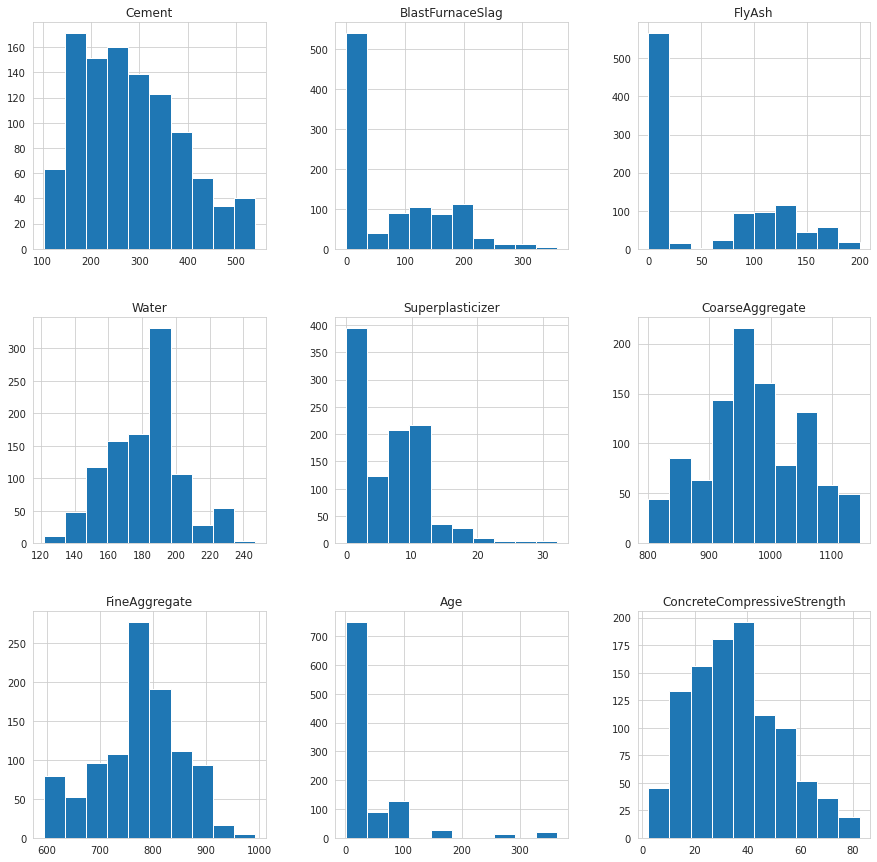

In [8]:
# Plot (Histograma)
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

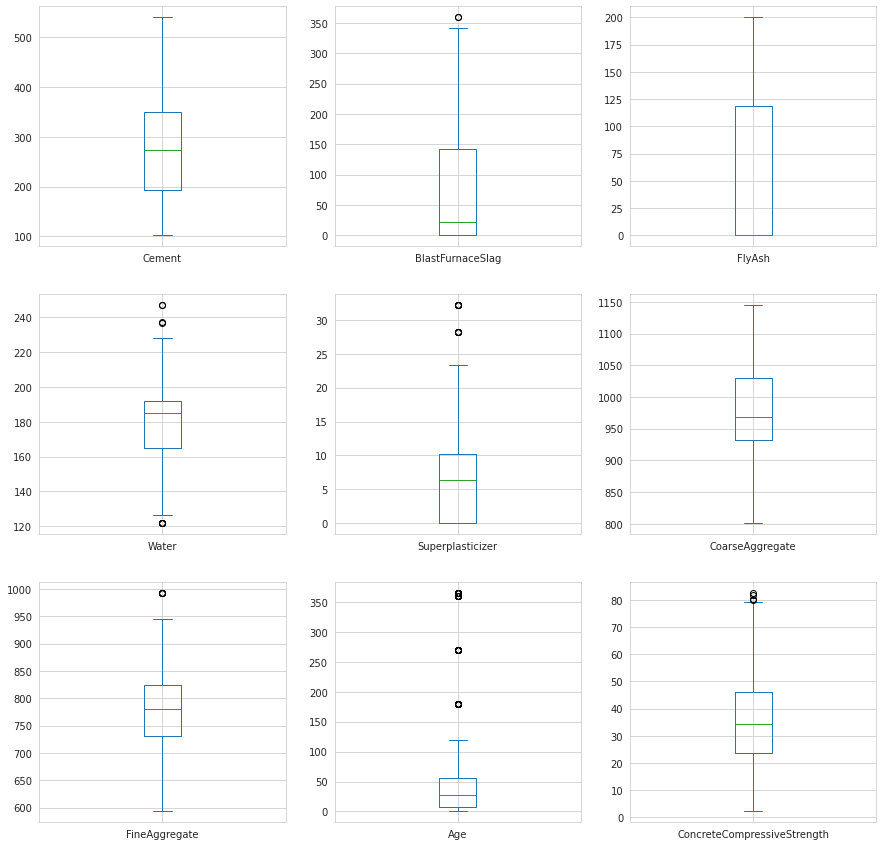

In [9]:
# Plot (BoxPlot)
dados.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 15), sharex=False, sharey=False)
plt.show()

<br>

# Limpeza nos Dados

<br>

## Tratando Valores Ausentes

In [10]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

<br>

## Tratando Valores Duplicados

In [11]:
# Shape
print(dados.shape)

# Verifica quantidade de valores duplicados
print(dados.duplicated().sum())

(1030, 9)
25


In [12]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()

# Shape
print(dados.shape)

(1005, 9)


<br>

## Tratando Valores Outliers

- Vamos Verificar Cada Variável

In [13]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

<br>

### Variável 'Cement'

In [14]:
# Describe
print(dados['Cement'].describe())

print(dados.shape)

count    1005.000000
mean      278.629055
std       104.345003
min       102.000000
25%       190.680000
50%       265.000000
75%       349.000000
max       540.000000
Name: Cement, dtype: float64
(1005, 9)


<Axes: ylabel='Cement'>

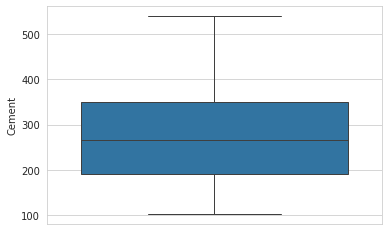

In [15]:
# Boxplot
sns.boxplot(dados.Cement)

#### Conclusão:
> Para a variável Cement, não parece haver necessidade de realizar tratamento de outliers. Os valores estão dentro de um intervalo razoável, e não há valores extremos visíveis no boxplot.

<br>

### Variável 'BlastFurnaceSlag'

In [16]:
# Describe
print(dados['BlastFurnaceSlag'].describe())

print(dados.shape)

count    1005.000000
mean       72.043134
std        86.170555
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       359.400000
Name: BlastFurnaceSlag, dtype: float64
(1005, 9)


<Axes: ylabel='BlastFurnaceSlag'>

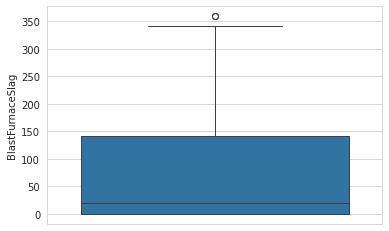

In [17]:
# Boxplot
sns.boxplot(dados.BlastFurnaceSlag)

In [18]:
# Quantidade de imóveis com valor acima de 350
acima_350 = (dados['BlastFurnaceSlag'] > 350).sum()
print(f"Quantidade de imóveis com valor acima de 350: {acima_350}")


print("Total de valores na variável:", len(dados['BlastFurnaceSlag']))

Quantidade de imóveis com valor acima de 350: 2
Total de valores na variável: 1005


#### Removendo Valores Acima de 350

In [19]:
# Removendo valores acima de 350
dados = dados[dados['BlastFurnaceSlag'] <= 350]

# Verificando o resultado
print(dados['BlastFurnaceSlag'].describe())

count    1003.000000
mean       71.470140
std        85.293837
min         0.000000
25%         0.000000
50%        20.000000
75%       141.300000
max       342.100000
Name: BlastFurnaceSlag, dtype: float64


<Axes: ylabel='BlastFurnaceSlag'>

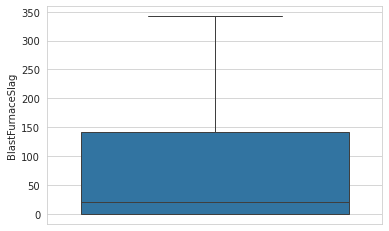

In [20]:
# Boxplot
sns.boxplot(dados.BlastFurnaceSlag)

#### Conclusão:


- Para a variável BlastFurnaceSlag, foi necessário realizar tratamento de outliers, removendo os valores acima de 350. Após a remoção, a distribuição dos dados tornou-se mais homogênea, eliminando os valores extremos que poderiam influenciar negativamente na análise e modelagem.

<br>

### Variável 'FlyAsh'

In [21]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [22]:
# Describe
print(dados['FlyAsh'].describe())

print(dados.shape)

count    1003.000000
mean       55.645813
std        64.223492
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: FlyAsh, dtype: float64
(1003, 9)


<Axes: ylabel='FlyAsh'>

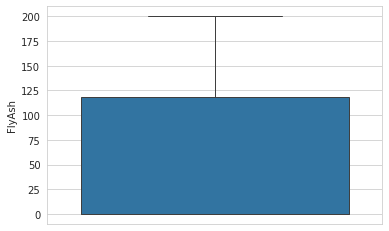

In [23]:
# Boxplot
sns.boxplot(dados.FlyAsh)

#### Conclusão:
> Para a variável FlyAsh, não parece haver necessidade de realizar tratamento de outliers. Os valores estão dentro de um intervalo razoável, e não há valores extremos visíveis no boxplot.

<br>

### Variável 'Water'

In [24]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [25]:
# Describe
print(dados['Water'].describe())

print(dados.shape)

count    1003.000000
mean      182.067149
std        21.361412
min       121.750000
25%       166.610000
50%       185.700000
75%       192.940000
max       247.000000
Name: Water, dtype: float64
(1003, 9)


<Axes: ylabel='Water'>

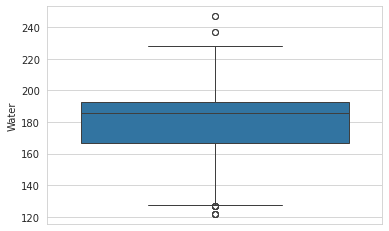

In [26]:
# Boxplot
sns.boxplot(dados.Water)

In [27]:
# Quantidade de valores acima de 230
acima_230 = (dados['Water'] > 230).sum()
print(f"Quantidade de valores com valor acima de 230: {acima_230}")

# Quantidade de valores abaixo de 130
abaixo_130 = (dados['Water'] < 130).sum()
print(f"Quantidade de valores com valor abaixo de 130: {abaixo_130}")


print("Total de valores na variável:", len(dados['Water']))

Quantidade de valores com valor acima de 230: 4
Quantidade de valores com valor abaixo de 130: 12
Total de valores na variável: 1003


#### Removendo Valores Acima de 220 e abaixo de 130

In [28]:
print(dados.shape)

# Removendo valores acima de 220 e abaixo de 130
dados = dados[(dados['Water'] <= 230) & (dados['Water'] >= 130)]

# Verificando o resultado
print(dados['Water'].describe())

print(dados.shape)

(1003, 9)
count    987.000000
mean     182.522492
std       20.216634
min      137.800000
25%      167.250000
50%      185.700000
75%      192.940000
max      228.000000
Name: Water, dtype: float64
(987, 9)


<Axes: ylabel='Water'>

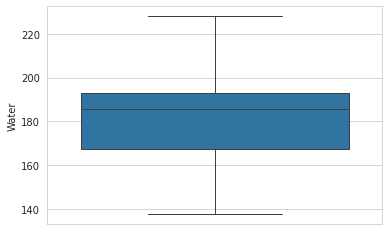

In [29]:
# Boxplot
sns.boxplot(dados.Water)

#### Conclusão:
> Para a variável Water, foi necessário realizar o tratamento de outliers. Valores acima de 230 e abaixo de 130 foram removidos, resultando em uma distribuição mais uniforme dos dados. Com esta limpeza, os dados estão mais consistentes para análises subsequentes. A remoção de outliers ajudará a evitar que valores extremos influenciem negativamente a modelagem e a análise preditiva subsequente.

<br>

### Variável 'Superplasticizer'

In [30]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [31]:
# Describe
print(dados['Superplasticizer'].describe())

print(dados.shape)

count    987.000000
mean       5.953804
std        5.836342
min        0.000000
25%        0.000000
50%        6.130000
75%       10.000000
max       32.200000
Name: Superplasticizer, dtype: float64
(987, 9)


<Axes: ylabel='Superplasticizer'>

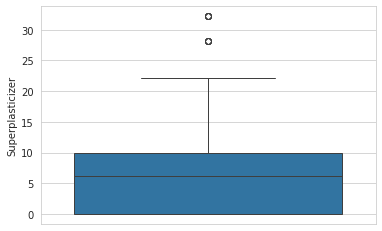

In [32]:
# Boxplot
sns.boxplot(dados.Superplasticizer)

#### Removendo Valores Acima de 25

In [33]:
print(dados.shape)

# Removendo valores abaixo de 25 mil
dados = dados[dados['Superplasticizer'] <= 25]

# Verificando o resultado
print(dados['Superplasticizer'].describe())

print(dados.shape)

(987, 9)
count    977.000000
mean       5.705635
std        5.318451
min        0.000000
25%        0.000000
50%        6.000000
75%        9.900000
max       22.100000
Name: Superplasticizer, dtype: float64
(977, 9)


<Axes: ylabel='Superplasticizer'>

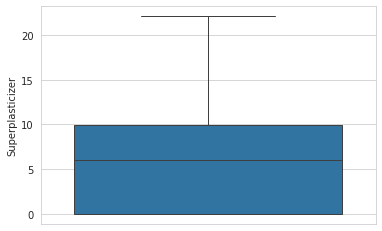

In [34]:
# Boxplot
sns.boxplot(dados.Superplasticizer)

#### Conclusão:
> Para a variável Superplasticizer, foi necessário realizar o tratamento de outliers. Removemos os valores acima de 25, o que resultou na remoção de 10 linhas, reduzindo o conjunto de dados de 987 para 977 linhas. Após o tratamento, a distribuição dos dados está mais equilibrada, o que ajuda a evitar que valores extremos influenciem negativamente a análise e a modelagem subsequente.

<br>

### Variável 'CoarseAggregate'

In [35]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [36]:
# Describe
print(dados['CoarseAggregate'].describe())

print(dados.shape)

count     977.000000
mean      976.301894
std        76.581569
min       801.000000
25%       932.000000
50%       968.000000
75%      1038.000000
max      1145.000000
Name: CoarseAggregate, dtype: float64
(977, 9)


<Axes: ylabel='CoarseAggregate'>

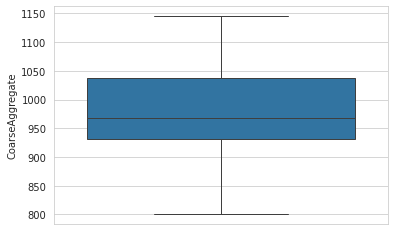

In [37]:
# Boxplot
sns.boxplot(dados.CoarseAggregate)

#### Conclusão:
> Para a variável CoarseAggregate, não parece haver necessidade de realizar tratamento de outliers. Os valores estão dentro de um intervalo razoável, e não há valores extremos visíveis no boxplot.

<br>

### Variável 'FineAggregate'

In [38]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [39]:
# Describe
print(dados['FineAggregate'].describe())

print(dados.shape)

count    977.000000
mean     771.075435
std       78.873743
min      594.000000
25%      724.300000
50%      778.450000
75%      821.000000
max      945.000000
Name: FineAggregate, dtype: float64
(977, 9)


<Axes: ylabel='FineAggregate'>

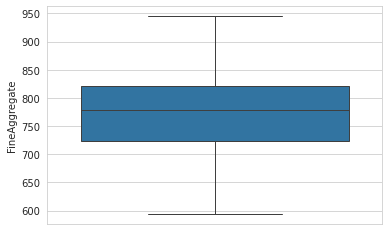

In [40]:
# Boxplot
sns.boxplot(dados.FineAggregate)

#### Conclusão:
> Para a variável FineAggregate, não parece haver necessidade de realizar tratamento de outliers. Os valores estão dentro de um intervalo razoável, e não há valores extremos visíveis no boxplot.

<br>

### Variável 'Age'

In [41]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [42]:
dados.columns# Describe
print(dados['Age'].describe())

print(dados.shape)

count    977.000000
mean      46.189355
std       64.424358
min        1.000000
25%        7.000000
50%       28.000000
75%       56.000000
max      365.000000
Name: Age, dtype: float64
(977, 9)


<Axes: ylabel='Age'>

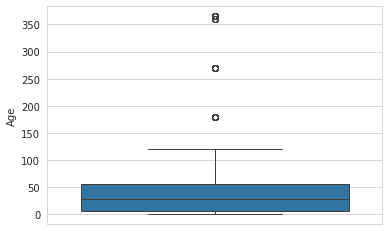

In [43]:
# Boxplot
sns.boxplot(dados.Age)

#### Conclusão:
> Para a variável Age, a recomendação é manter os valores extremos, uma vez que eles podem representar informações cruciais sobre a variação da resistência do concreto ao longo do tempo. No entanto, monitorar o impacto desses valores durante a modelagem é essencial para garantir que eles não afetem negativamente o desempenho dos modelos preditivos.

<br>

### Variável 'ConcreteCompressiveStrength'

In [44]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [45]:
dados.columns# Describe
print(dados['ConcreteCompressiveStrength'].describe())

print(dados.shape)

count    977.000000
mean      35.009560
std       16.229460
min        2.331808
25%       23.245191
50%       33.715376
75%       44.609097
max       82.599225
Name: ConcreteCompressiveStrength, dtype: float64
(977, 9)


<Axes: ylabel='ConcreteCompressiveStrength'>

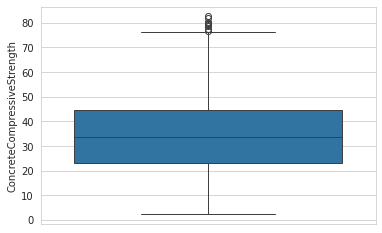

In [46]:
# Boxplot
sns.boxplot(dados.ConcreteCompressiveStrength)

#### Conclusão:
> Para a variável ConcreteCompressiveStrength, a princípio, não há necessidade de remover os valores extremos. No entanto, uma análise adicional deve ser realizada para garantir que esses valores não afetem negativamente a performance do modelo. Transformações ou normalizações podem ser consideradas se necessário.

<br><br>

## Verificando Correlação

In [47]:
# Verificando Correlação (tabela)
dados.corr()

Cement  BlastFurnaceSlag    FlyAsh     Water  \
Cement                       1.000000         -0.310517 -0.368087 -0.006998   
BlastFurnaceSlag            -0.310517          1.000000 -0.314818  0.136261   
FlyAsh                      -0.368087         -0.314818  1.000000 -0.331774   
Water                       -0.006998          0.136261 -0.331774  1.000000   
Superplasticizer            -0.046319          0.029768  0.529205 -0.645482   
CoarseAggregate             -0.047540         -0.281996 -0.054753 -0.259308   
FineAggregate               -0.308716         -0.291466  0.119582 -0.414103   
Age                          0.091532         -0.039521 -0.163601  0.301022   
ConcreteCompressiveStrength  0.475006          0.105132 -0.060730 -0.260426   

                             Superplasticizer  CoarseAggregate  FineAggregate  \
Cement                              -0.046319        -0.047540      -0.308716   
BlastFurnaceSlag                     0.029768        -0.281996      -0.291466   
FlyAsh                               0.529205        -0.054753       0.119582   
Water                               -0.645482        -0.259308      -0.414103   
Superplasticizer                     1.000000        -0.179135       0.136277   
CoarseAggregate                     -0.179135         1.000000      -0.138821   
FineAggregate                        0.136277        -0.138821       1.000000   
Age                                 -0.211689        -0.010315      -0.160787   
ConcreteCompressiveStrength          0.315686        -0.119812      -0.226957   

                                  Age  ConcreteCompressiveStrength  
Cement                       0.091532                     0.475006  
BlastFurnaceSlag            -0.039521                     0.105132  
FlyAsh                      -0.163601                    -0.060730  
Water                        0.301022                    -0.260426  
Superplasticizer            -0.211689                     0.315686  
CoarseAggregate             -0.010315                    -0.119812  
FineAggregate               -0.160787                    -0.226957  
Age                          1.000000                     0.340728  
ConcreteCompressiveStrength  0.340728                     1.000000

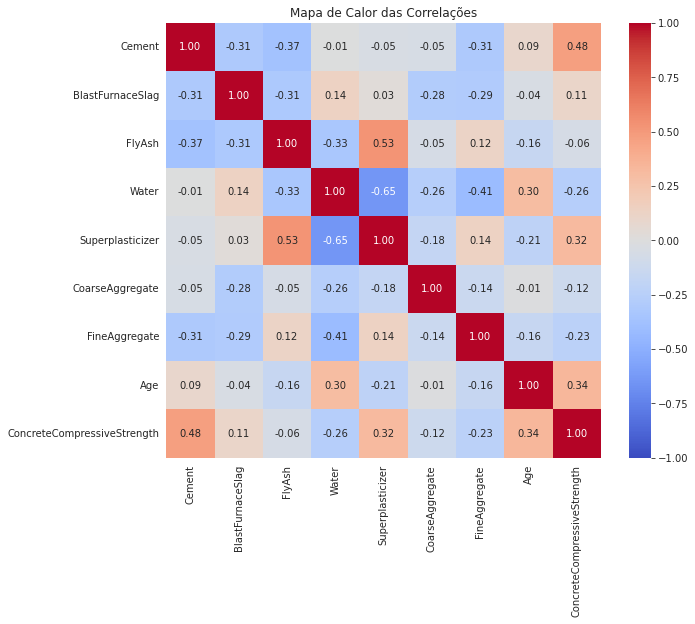

In [48]:
# Visualizando Correlações através de um Mapa de Calor

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

### Análise da Correlação

#### Cement (Cimento)

- **Positivamente Correlacionado com ConcreteCompressiveStrength (0.475)**: O cimento tem uma correlação positiva moderada com a resistência à compressão do concreto, indicando que quantidades maiores de cimento geralmente aumentam a resistência à compressão.
- **Negativamente Correlacionado com FlyAsh (-0.368)**: Existe uma correlação negativa moderada entre cimento e cinza volante, sugerindo que geralmente se usa um ou outro em quantidades maiores.

<br>

#### BlastFurnaceSlag (Escória de Alto-Forno)

- **Positivamente Correlacionado com ConcreteCompressiveStrength (0.105)**: Há uma correlação positiva fraca com a resistência à compressão, indicando um leve aumento na resistência com o uso da escória de alto-forno.
- **Negativamente Correlacionado com FlyAsh (-0.315)**: A escória de alto-forno e a cinza volante têm uma correlação negativa moderada, sugerindo que são usados como substitutos entre si.

<br>

#### FlyAsh (Cinza Volante)

- **Negativamente Correlacionado com ConcreteCompressiveStrength (-0.061)**: A correlação é muito fraca, indicando que a cinza volante tem pouco impacto na resistência à compressão.
- **Fortemente Positivamente Correlacionado com Superplasticizer (0.529)**: Uma correlação positiva moderada a forte sugere que a cinza volante é frequentemente usada junto com superplastificante.

<br>

#### Water (Água)

- **Negativamente Correlacionado com ConcreteCompressiveStrength (-0.260)**: A quantidade de água está negativamente correlacionada com a resistência à compressão, indicando que mais água tende a reduzir a resistência.
- **Negativamente Correlacionado com Superplasticizer (-0.645)**: Uma forte correlação negativa com superplastificante, indicando que menos água é usada quando há mais superplastificante.

<br>

#### Superplasticizer (Superplastificante)

- **Positivamente Correlacionado com ConcreteCompressiveStrength (0.316)**: O superplastificante está moderadamente correlacionado positivamente com a resistência à compressão, sugerindo que aumenta a resistência.

<br>

#### CoarseAggregate (Agregado Graúdo)

- **Negativamente Correlacionado com ConcreteCompressiveStrength (-0.120)**: A correlação negativa é fraca, indicando pouco impacto do agregado graúdo na resistência à compressão.

<br>

#### FineAggregate (Agregado Fino)

- **Negativamente Correlacionado com ConcreteCompressiveStrength (-0.227)**: Uma correlação negativa fraca a moderada sugere que maiores quantidades de agregado fino tendem a reduzir a resistência à compressão.

<br>

#### Age (Idade)

- **Positivamente Correlacionado com ConcreteCompressiveStrength (0.341)**: A idade do concreto tem uma correlação positiva moderada com a resistência à compressão, indicando que a resistência aumenta com o tempo.

<br>

#### Conclusão:

> A análise de correlação revela que as **variáveis mais importantes** para a **resistência à compressão do concreto** são a **quantidade de cimento**, o **superplastificante** e a **idade do concreto**, que apresentam correlações positivas moderadas.

> A **quantidade de água e agregados finos**, por outro lado, têm **correlações negativas**, sugerindo que **maiores quantidades** dessas variáveis podem **reduzir a resistência à compressão**.


<br>

#### Ações:

> **Priorizar Cimento e Superplastificante**: Focar em ajustar as quantidades de cimento e superplastificante para melhorar a resistência do concreto.

> **Controlar a Quantidade de Água**: Minimizar a quantidade de água utilizada, especialmente em combinações que não requerem superplastificante.

> **Considerar a Idade do Concreto**: Incorporar a variável idade nas previsões de resistência à compressão, dado seu impacto positivo.

<br> 

Essas correlações fornecem insights iniciais úteis  

<br>

### Análise 1 - Relação Entre Cimento e Resistência à Compressão do Concreto

In [49]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [50]:
# Correlação (tabela)
dados[['Cement', 'ConcreteCompressiveStrength']].corr()

Cement  ConcreteCompressiveStrength
Cement                       1.000000                     0.475006
ConcreteCompressiveStrength  0.475006                     1.000000

<Figure size 1296x864 with 0 Axes>

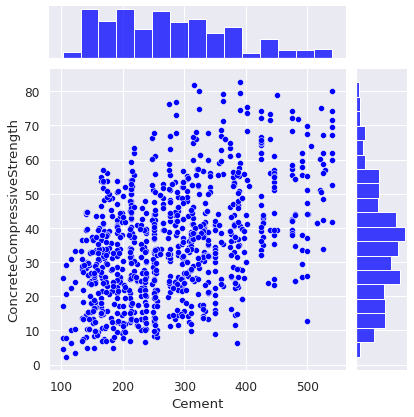

In [51]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'Cement', 
              y = 'ConcreteCompressiveStrength',
              color = 'blue')

#### Conclusão

- Correlação Moderada: Existe uma correlação positiva moderada entre a quantidade de cimento e a resistência à compressão do concreto.
- Aumento da Resistência: A resistência à compressão tende a aumentar com a maior quantidade de cimento.
- Variabilidade: Apesar da tendência geral, há variabilidade considerável nos dados, indicando que outros fatores também influenciam a resistência à compressão.

<br>

### Análise 2 - Relação Entre Superplasticizer (superplastificante) e Resistência à Compressão do Concreto

In [52]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [53]:
# Correlação (tabela)
dados[['Superplasticizer', 'ConcreteCompressiveStrength']].corr()

Superplasticizer  ConcreteCompressiveStrength
Superplasticizer                     1.000000                     0.315686
ConcreteCompressiveStrength          0.315686                     1.000000

<Figure size 1296x864 with 0 Axes>

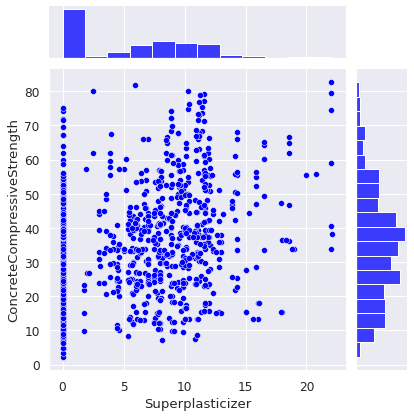

In [54]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'Superplasticizer', 
              y = 'ConcreteCompressiveStrength',
              color = 'blue')

#### Conclusão

- Correlação Fraca a Moderada: Existe uma correlação positiva fraca a moderada entre a quantidade de superplastificante e a resistência à compressão do concreto.
- Aumento da Resistência: A resistência à compressão tende a aumentar com a maior quantidade de superplastificante, embora o efeito seja menos pronunciado comparado ao cimento.
- Variabilidade: Há uma grande variabilidade nos dados, especialmente com muitos valores de zero para superplastificante, indicando que seu uso não é uniforme em todas as amostras.

<br>

### Análise 3 - Relação Entre Idade (Age) e Resistência à Compressão do Concreto

In [55]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [56]:
# Correlação (tabela)
dados[['Age', 'ConcreteCompressiveStrength']].corr()

Age  ConcreteCompressiveStrength
Age                          1.000000                     0.340728
ConcreteCompressiveStrength  0.340728                     1.000000

<Figure size 1296x864 with 0 Axes>

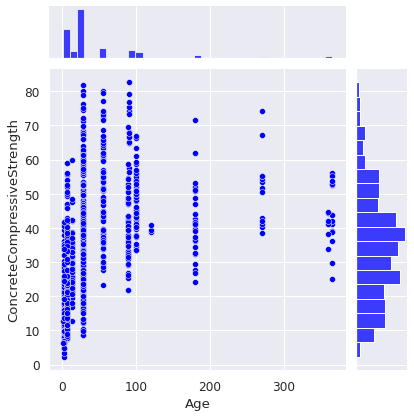

In [57]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'Age', 
              y = 'ConcreteCompressiveStrength',
              color = 'blue')

#### Conclusão

- Correlação Moderada: Existe uma correlação positiva fraca a moderada entre a idade do concreto e a resistência à compressão.
- Aumento da Resistência: A resistência à compressão tende a aumentar com a idade do concreto, embora o efeito não seja extremamente forte.
- Variabilidade: Há uma grande variabilidade nos dados, especialmente nas idades mais baixas, sugerindo que outros fatores também influenciam a resistência à compressão.

<br>

### Análise 4 - Relação Entre FlyAsh (Cinza Volante) e Superplasticizer (Superplastificante)

In [58]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [59]:
# Correlação (tabela)
dados[['FlyAsh', 'Superplasticizer']].corr()

FlyAsh  Superplasticizer
FlyAsh            1.000000          0.529205
Superplasticizer  0.529205          1.000000

<Figure size 1296x864 with 0 Axes>

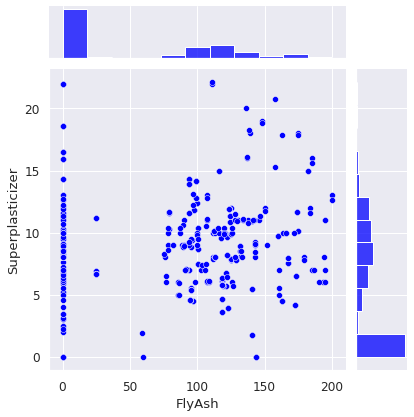

In [60]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'FlyAsh', 
              y = 'Superplasticizer',
              color = 'blue')

#### Conclusão

- Correlação Moderada: Existe uma correlação positiva moderada entre a quantidade de Fly Ash e Superplasticizer.
- Aumento Conjunto: A quantidade de Superplasticizer tende a aumentar com a quantidade de Fly Ash, sugerindo que esses dois componentes são frequentemente usados em conjunto.
- Variabilidade: Apesar da tendência geral, há uma variabilidade significativa, indicando que a relação não é perfeitamente linear e que outros fatores podem influenciar a utilização conjunta desses componentes.

<br>

### Análise 5 - Relação Entre Water (Água) e Superplasticizer (Superplastificante)

In [61]:
dados.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [62]:
# Correlação (tabela)
dados[['Water', 'Superplasticizer']].corr()

Water  Superplasticizer
Water             1.000000         -0.645482
Superplasticizer -0.645482          1.000000

<Figure size 1296x864 with 0 Axes>

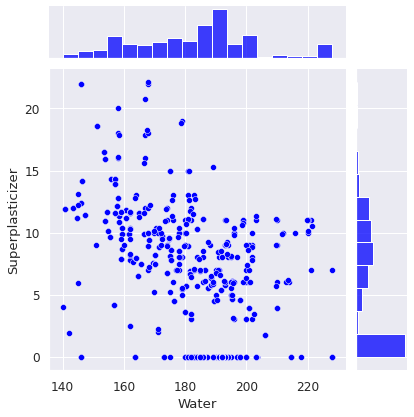

In [63]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'Water', 
              y = 'Superplasticizer',
              color = 'blue')

#### Conclusão

- Correlação Negativa Forte: Existe uma correlação negativa moderada a forte entre a quantidade de água e Superplasticizer.
- Redução Conjunta: A quantidade de Superplasticizer tende a diminuir com o aumento da quantidade de água, sugerindo que esses dois componentes são frequentemente utilizados em proporções inversas.
- Variabilidade: Apesar da tendência geral, há uma variabilidade significativa, indicando que a relação não é perfeitamente linear e que outros fatores podem influenciar a utilização conjunta desses componentes.

<br><br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br><br>

## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

In [64]:
# Cria um objeto separado para a variável alvo
y = dados.ConcreteCompressiveStrength

# Cria um objeto separado para as variáveis de entrada
X = dados.drop('ConcreteCompressiveStrength', axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=1234)

# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(781, 8) (196, 8) (781,) (196,)


<br>

## Padronização

- Não é necessário aplicar padronização/normalização na variável alvo.

In [65]:
# Verificando datasets
display(X_treino.head())
display(X_teste.head())

Cement  BlastFurnaceSlag  FlyAsh   Water  Superplasticizer  \
325  252.31               0.0   98.75  146.25             14.17   
401  475.00               0.0    0.00  162.00              9.50   
546  333.00               0.0    0.00  192.00              0.00   
963  150.00             236.8    0.00  173.80             11.90   
557  255.50             170.3    0.00  185.70              0.00   

     CoarseAggregate  FineAggregate  Age  
325           987.76         889.01   14  
401          1044.00         662.00   28  
546           931.20         842.60   28  
963          1069.30         674.80   28  
557          1026.60         724.30    7

Cement  BlastFurnaceSlag  FlyAsh   Water  Superplasticizer  \
431  251.37               0.0  118.27  192.94              5.75   
699  203.50             305.3    0.00  203.50              0.00   
40   342.00              38.0    0.00  228.00              0.00   
962  144.80               0.0  133.60  180.80             11.10   
811  310.00               0.0    0.00  192.00              0.00   

     CoarseAggregate  FineAggregate  Age  
431           1043.6          754.3   14  
699            963.4          630.0    3  
40             932.0          670.0   90  
962            979.5          811.5   28  
811            970.0          850.0   28

In [66]:
# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# Converte os arrays de volta para DataFrame
X_treino_scaled = pd.DataFrame(X_treino_scaled, columns=X_treino.columns, index=X_treino.index)
X_teste_scaled = pd.DataFrame(X_teste_scaled, columns=X_teste.columns, index=X_teste.index)

X_treino = X_treino_scaled
X_teste = X_teste_scaled

In [67]:
# Verifica os DataFrames escalonados
display(X_treino.head())
display(X_teste.head())

Cement  BlastFurnaceSlag    FlyAsh     Water  Superplasticizer  \
325 -0.265900         -0.828449  0.690503 -1.889772          1.607939   
401  1.898495         -0.828449 -0.850390 -1.089410          0.729616   
546  0.518352         -0.828449 -0.850390  0.435088         -1.057124   
963 -1.260283          1.934070 -0.850390 -0.489774          1.181002   
557 -0.234895          1.158278 -0.850390  0.114943         -1.057124   

     CoarseAggregate  FineAggregate       Age  
325         0.133860       1.546665 -0.516551  
401         0.861698      -1.342268 -0.304564  
546        -0.598119       0.956050 -0.304564  
963         1.189122      -1.179375 -0.304564  
557         0.636514      -0.549438 -0.622544

Cement  BlastFurnaceSlag    FlyAsh     Water  Superplasticizer  \
431 -0.275036         -0.828449  0.995093  0.482855          0.024324   
699 -0.740300          2.733194 -0.850390  1.019479         -1.057124   
40   0.605826         -0.385139 -0.850390  2.264485         -1.057124   
962 -1.310824         -0.828449  1.234302 -0.134058          1.030540   
811  0.294808         -0.828449 -0.850390  0.435088         -1.057124   

     CoarseAggregate  FineAggregate       Age  
431         0.856522      -0.167657 -0.516551  
699        -0.181398      -1.749501 -0.683112  
40         -0.587766      -1.240460  0.634235  
962         0.026962       0.560271 -0.304564  
811        -0.095983       1.050223 -0.304564

<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>
### Nesta etapa do projeto, desenvolveremos e avaliaremos <u>três diferentes</u> modelos de machine learning para identificar qual deles apresenta o <u>melhor desempenho</u> para o nosso conjunto de dados.

<br>

Abaixo estão os modelos que serão implementados e testados:

<br>


- **Modelo 1**: **Regressão Linear (Benchmark)** - Utilizado como linha de base devido à sua simplicidade e eficácia em problemas de regressão. Este modelo ajudará a estabelecer uma base para a performance que esperamos superar com técnicas mais complexas.

<br>

- **Modelo 2**: **Regressão Ridge** - Um modelo de regressão que adiciona uma penalização L2 ao cálculo dos coeficientes, ajudando a reduzir o sobreajuste (overfitting) e melhorando a capacidade de generalização do modelo.

<br>

- **Modelo 3**: **Regressão LASSO** - Um modelo de regressão que aplica uma penalização L1, forçando a soma dos valores absolutos dos coeficientes a serem menores que um valor fixo. Isso pode resultar na eliminação de algumas variáveis irrelevantes, tornando o modelo mais interpretável e eficiente.

<br>

- **Modelo 4**: **Regressão ElasticNet** - Uma combinação de penalizações L1 e L2, este modelo busca combinar os benefícios de ambos os métodos Ridge e LASSO, ajustando a penalização para otimizar a performance e a interpretabilidade do modelo.

<br>

- **Modelo 5**: **Regressão com Árvores de Decisão** - Utiliza uma estrutura de árvore para modelar as relações entre variáveis preditoras e a variável alvo, podendo capturar relações não lineares e interações entre variáveis de forma eficaz.

<br>

- **Modelo 6**: **Regressão com Random Forest** - Uma extensão do modelo de árvores de decisão, que utiliza um conjunto de árvores (floresta) para melhorar a robustez e a capacidade de generalização do modelo, reduzindo o risco de overfitting.

<br>

- **Modelo 7:** **SVR (Support Vector Regressor)** - Utiliza técnicas de aprendizado de máquina baseadas em margens para regressão, adequado para capturar relações complexas e não lineares.

<br>

- **Modelo 8**: **K-Nearest Neighbors Regressor (KNN)** - Usa a média dos k vizinhos mais próximos para prever o valor da variável alvo.

<br>

- **Modelo 9**: **Gradient Boosting Regressor** - Utiliza boosting para melhorar a precisão das previsões ao combinar vários modelos fracos.

<br>

- **Modelo 10**: **XGBoost Regressor** - Uma implementação eficiente de gradient boosting, amplamente utilizada em competições de machine learning.


<br><br>


Cada modelo será treinado utilizando o mesmo conjunto de dados, permitindo uma comparação justa de sua eficácia. A avaliação de cada modelo incluirá métricas como **erro médio absoluto (MAE)**, **erro quadrático médio (MSE)** e o **coeficiente de determinação (R²)**, entre outras, dependendo das especificidades de nosso problema e dados.


<br><br><br>

## Criando Dataframe para salvar métricas de cada Modelo

In [68]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 1 com Regressão Logística (Benchmark)</span>

- Utilizado como linha de base devido à sua simplicidade e eficácia em problemas de regressão. Este modelo ajudará a estabelecer uma base para a performance que esperamos superar com técnicas mais complexas.

<br>

### Criação e Treinamento do Modelo

In [69]:
# Cria o modelo
modelo_RL = LinearRegression()

# Treina o modelo
modelo_RL.fit(X_treino, y_treino)

LinearRegression()

#### Visualizando coeficientes das variáveis preditoras

                  Coeficiente
Cement              11.177037
BlastFurnaceSlag     7.432734
Age                  7.325147
FlyAsh               4.283186
Superplasticizer     1.751635
FineAggregate        0.640750
CoarseAggregate      0.251555
Water               -4.473172


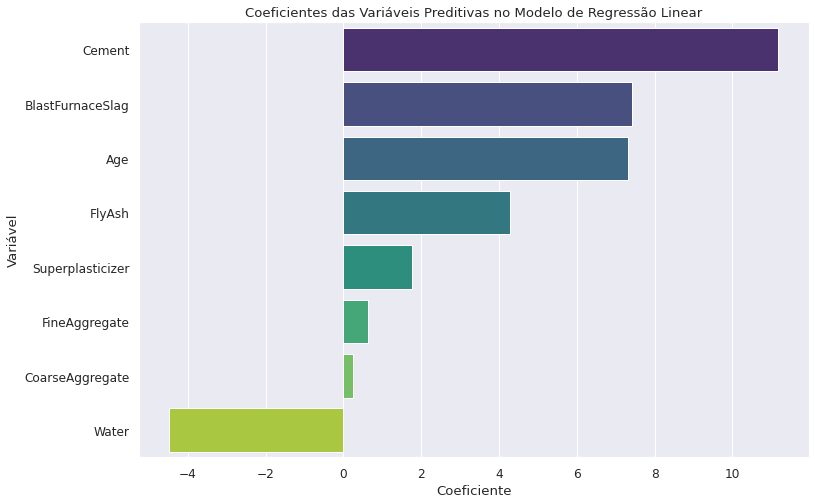

In [70]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RL.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RL.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

### Interpretação dos Coeficientes das Variáveis Preditivas
<table>
  <tr>
    <th>Variável</th>
    <th>Interpretação</th>
  </tr>
  <tr>
    <td>Cement</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de cimento na mistura aumenta a resistência à compressão do concreto em média em <b>11.177037 MPa</b>.</td>
  </tr>
  <tr>
    <td>BlastFurnaceSlag</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de escória de alto-forno na mistura aumenta a resistência à compressão do concreto em média em <b>7.432734 MPa</b>.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Cada aumento de 1 dia na idade do concreto aumenta a resistência à compressão do concreto em média em <b>7.325147 MPa</b>.</td>
  </tr>
  <tr>
    <td>FlyAsh</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de cinza volante na mistura aumenta a resistência à compressão do concreto em média em <b>4.283186 MPa</b>.</td>
  </tr>
  <tr>
    <td>Superplasticizer</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de superplastificante na mistura aumenta a resistência à compressão do concreto em média em <b>1.751635 MPa</b>.</td>
  </tr>
  <tr>
    <td>FineAggregate</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de agregado fino na mistura aumenta a resistência à compressão do concreto em média em <b>0.640750 MPa</b>.</td>
  </tr>
  <tr>
    <td>CoarseAggregate</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de agregado graúdo na mistura aumenta a resistência à compressão do concreto em média em <b>0.251555 MPa</b>.</td>
  </tr>
  <tr>
    <td>Water</td>
    <td>Cada aumento de 1 kg/m³ na quantidade de água na mistura diminui a resistência à compressão do concreto em média em <b>4.473172 MPa</b>.</td>
  </tr>
</table>

> Os coeficientes indicam que a quantidade de cimento e escória de alto-forno são os fatores que mais influenciam positivamente a resistência à compressão do concreto, seguidos pela idade do concreto e a quantidade de cinza volante. A quantidade de água tem um impacto negativo significativo na resistência à compressão. Cada aumento nessas variáveis preditivas resulta em um aumento ou diminuição correspondente na resistência à compressão do concreto.

<br>

## Previsões

[24.46268971 31.04115868 27.21369272 20.2428888  23.34026236 24.24171761
 39.83748545 53.70405464 40.58545231 24.57606895]




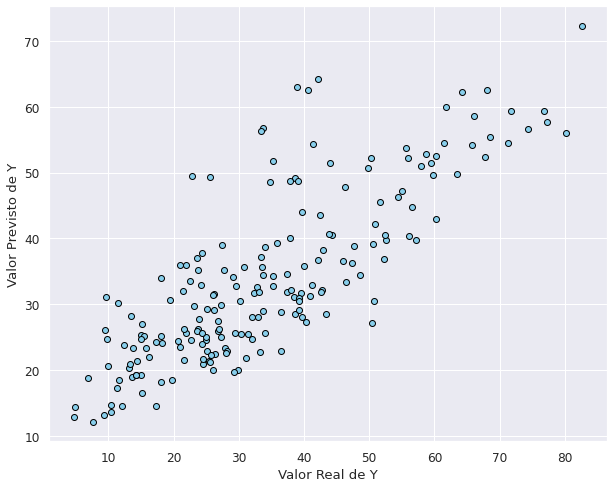

In [71]:
# Previsões com dados de teste
pred_v1 = modelo_RL.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v1[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 8.16122577492321
MSE - Erro Quadrático Médio: 100.9573306038216
RMSE - Raiz Quadrada do Erro Quadrático Médio: 10.04775251505637
O valor é 10.05 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.11). Isso NÃO é um bom sinal.
Coeficiente R2: 0.6492020982262668
Variância Explicada: 0.649289443647626


ANÁLISE DE RESÍDUOS


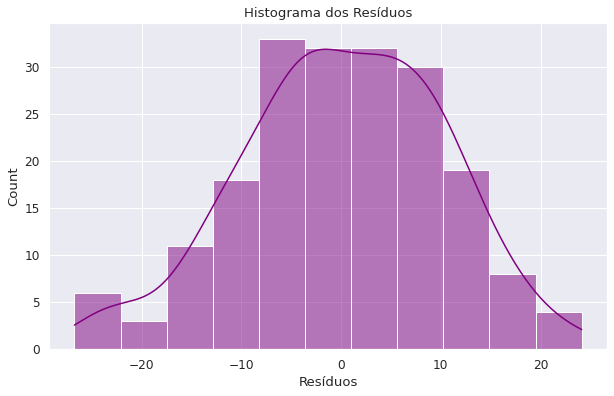

In [72]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v1)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v1)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v1)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v1)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_teste - pred_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [73]:
# Salvando as métricas no dataframe com formatação
modelo_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 1 RL'],
    'Nome do Algoritmo': ['Regressão Linear'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE     MSE       RMSE  Coeficiente R2  \
0    Modelo 1 RL  Regressão Linear  8.16  100.96  10.047753        0.649202   

   Variância Explicada  
0             0.649289

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 2 com Regressão Ridge</span>

- Um modelo de regressão que adiciona uma penalização L2 ao cálculo dos coeficientes, ajudando a reduzir o sobreajuste (overfitting) e melhorando a capacidade de generalização do modelo.

<br>

### Criação e Treinamento do Modelo

In [74]:
# Cria o modelo
modelo_RR = Ridge(alpha = 1.0)

# Treinamento
modelo_RR.fit(X_treino, y_treino)

Ridge()

#### Visualizando coeficientes das variáveis preditoras

                  Coeficiente
Cement              11.000014
Age                  7.306634
BlastFurnaceSlag     7.258143
FlyAsh               4.130537
Superplasticizer     1.752249
FineAggregate        0.489121
CoarseAggregate      0.135990
Water               -4.579567


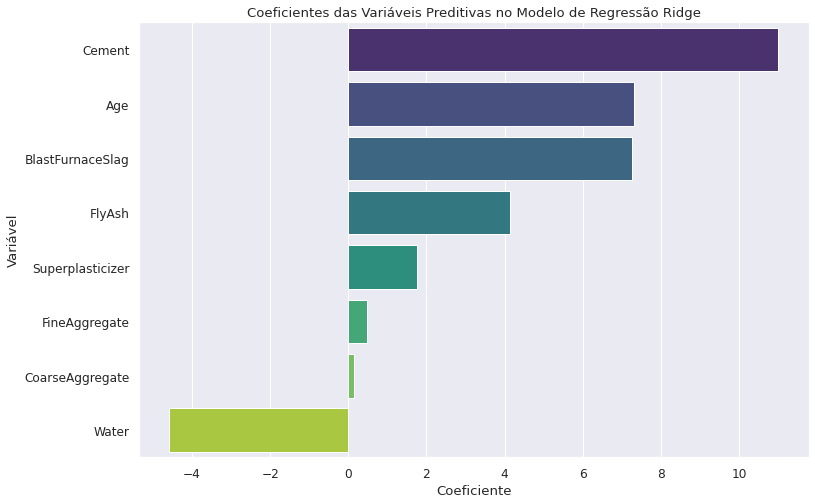

In [75]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RR.coef_, X.columns, columns = ['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RR.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Ridge')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[24.38875959 31.01460058 27.30619668 20.36362373 23.37307181 24.21126121
 39.86581402 53.5853609  40.62812189 24.51160633]




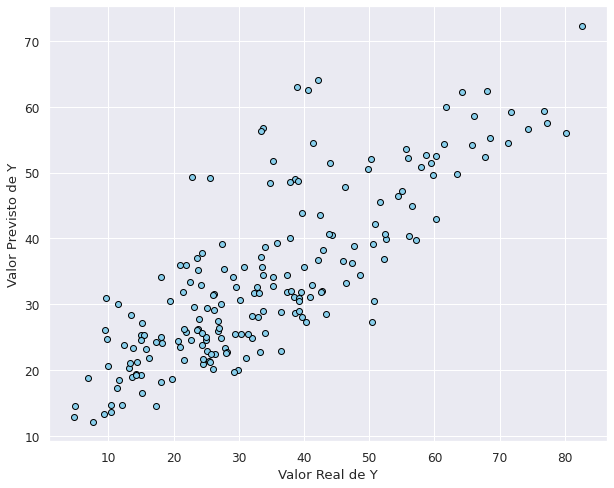

In [76]:
# Previsões com dados de teste
pred_v2 = modelo_RR.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 8.167935416422642
MSE - Erro Quadrático Médio: 101.01650474925066
RMSE - Raiz Quadrada do Erro Quadrático Médio: 10.050696729543214
O valor é 10.05 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.11). Isso NÃO é um bom sinal.
Coeficiente R2: 0.6489964849643906
Variância Explicada: 0.6490895458977456


ANÁLISE DE RESÍDUOS


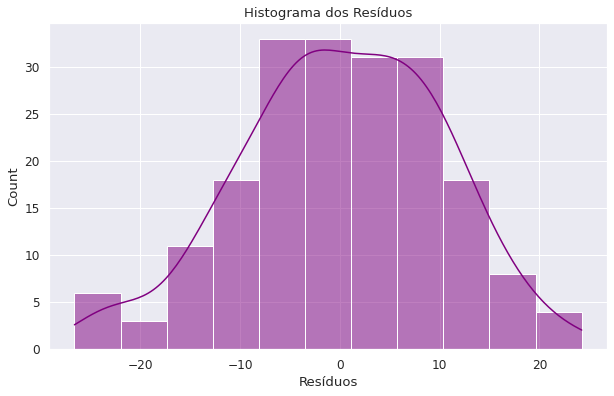

In [77]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v2)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_teste - pred_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [78]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 2 RR V1'],
    'Nome do Algoritmo': ['Regressão Ridge'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE     MSE       RMSE  Coeficiente R2  \
0     Modelo 1 RL  Regressão Linear  8.16  100.96  10.047753        0.649202   
1  Modelo 2 RR V1   Regressão Ridge  8.17  101.02  10.050697        0.648996   

   Variância Explicada  
0             0.649289  
1             0.649090

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 3 com Regressão Lasso</span>

- Um modelo de regressão que aplica uma penalização L1, forçando a soma dos valores absolutos dos coeficientes a serem menores que um valor fixo. Isso pode resultar na eliminação de algumas variáveis irrelevantes, tornando o modelo mais interpretável e eficiente. 

<br>

### Criação e Treinamento do Modelo

In [79]:
# Cria o modelo
modelo_v3_LA = Lasso(alpha = 1.0)

# Treinamento
modelo_v3_LA.fit(X_treino, y_treino)

Lasso()

#### Visualizando coeficientes das variáveis preditoras

                  Coeficiente
Cement               7.170390
Age                  5.587241
Superplasticizer     3.426169
BlastFurnaceSlag     3.177637
FlyAsh               0.000000
CoarseAggregate     -0.000000
FineAggregate       -0.364584
Water               -3.179611


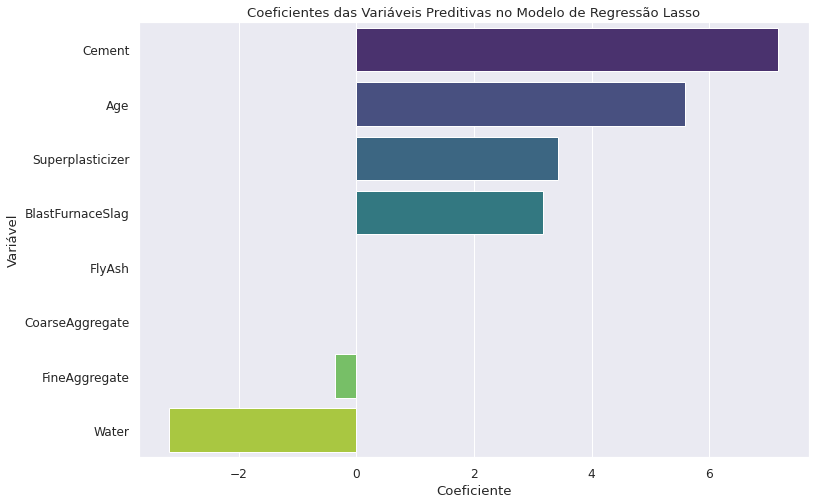

In [80]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v3_LA.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v3_LA.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Lasso')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[26.34376419 28.55987323 31.51929999 25.24480476 27.6168282  26.12271336
 39.03727663 49.55727638 41.12757807 26.50258163]




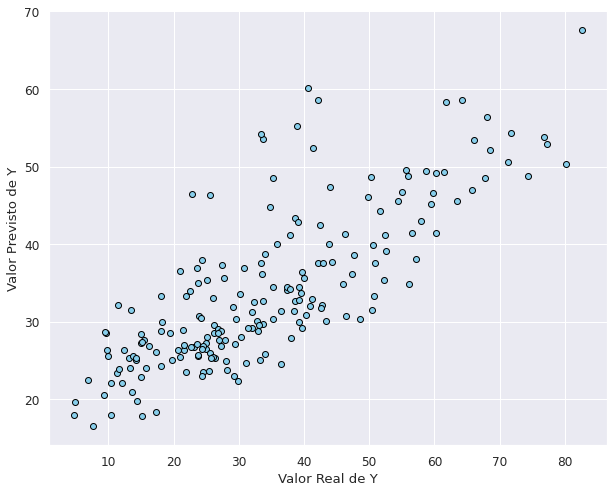

In [81]:
# Previsões com dados de teste
pred_v3 = modelo_v3_LA.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v3[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v3, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 8.934743336970982
MSE - Erro Quadrático Médio: 118.47735255256595
RMSE - Raiz Quadrada do Erro Quadrático Médio: 10.884730247119858
O valor é 10.88 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.11). Isso NÃO é um bom sinal.
Coeficiente R2: 0.5883250237048787
Variância Explicada: 0.5883653589298938


ANÁLISE DE RESÍDUOS


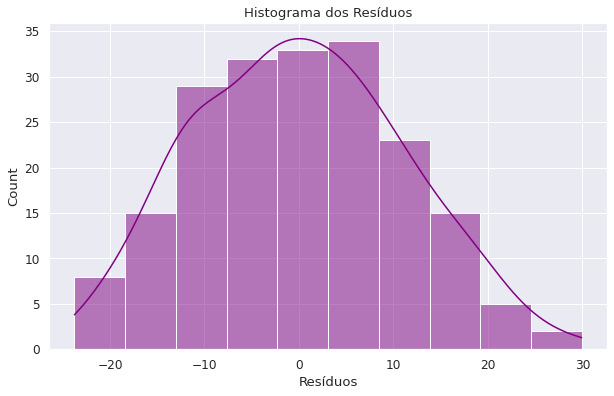

In [82]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v3)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v3)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v3)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v3)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_teste - pred_v3

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [83]:
# Salvando as métricas no dataframe com formatação
modelo_v3 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 3 RL'],
    'Nome do Algoritmo': ['Regressão Lasso'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v3], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE     MSE       RMSE  Coeficiente R2  \
0     Modelo 1 RL  Regressão Linear  8.16  100.96  10.047753        0.649202   
1  Modelo 2 RR V1   Regressão Ridge  8.17  101.02  10.050697        0.648996   
2     Modelo 3 RL   Regressão Lasso  8.93  118.48  10.884730        0.588325   

   Variância Explicada  
0             0.649289  
1             0.649090  
2             0.588365

<br>

# Resumo

- Após a construção de três modelos iniciais de machine learning (Regressão Linear, Regressão Ridge e Regressão Lasso), observamos que o desempenho obtido não foi satisfatório em termos de métricas de avaliação, como MAE, MSE e RMSE. As métricas indicaram que os modelos não estavam capturando suficientemente bem as relações entre as variáveis preditoras e a variável alvo (resistência à compressão do concreto).

- Diante disso, decidimos aplicar novas técnicas de pré-processamento dos dados com o objetivo de melhorar a performance dos modelos. As técnicas incluem:

> a criação de variáveis de interação e a aplicação de transformações nas variáveis existentes. Especificamente, foram criadas variáveis que capturam interações entre componentes da mistura de concreto e a idade do concreto, além de transformações logarítmicas e quadráticas para capturar relações não lineares.

> realização de seleção de variáveis utilizando SelectKBest para identificar as variáveis mais relevantes.

<br> 

# Pré-Processamento dos Dados

<br>

### Criando Novas Variáveis

#### Explicação das Novas Variáveis:

- **Cement_Age**: Multiplicação das variáveis Cement e Age. Esta variável visa capturar a interação entre a quantidade de cimento e a idade do concreto, que pode influenciar na resistência à compressão do concreto.

- **Water_Superplasticizer**: Multiplicação das variáveis Water e Superplasticizer. Esta variável captura a interação entre a quantidade de água e o superplastificante utilizado na mistura de concreto, que pode impactar a resistência à compressão.

- **Log_Age**: Transformação logarítmica da variável Age. Esta transformação visa reduzir a variação e melhorar a linearidade da variável idade do concreto.

- **Square_Age**: Quadrado da variável Age. Esta transformação é usada para capturar possíveis relações quadráticas entre a idade do concreto e a resistência à compressão.

In [84]:
# Criando novas variáveis de interação

print(dados.columns)

# Cement_Age: Interação entre a quantidade de cimento e a idade do concreto
dados['Cement_Age'] = dados['Cement'] * dados['Age']

# Water_Superplasticizer: Interação entre a quantidade de água e superplastificante
dados['Water_Superplasticizer'] = dados['Water'] * dados['Superplasticizer']

# Log_Age: Transformação logarítmica da idade do concreto
dados['Log_Age'] = np.log1p(dados['Age'])

# Square_Age: Quadrado da idade do concreto
dados['Square_Age'] = np.square(dados['Age'])

# Verificando as primeiras linhas do dataframe para confirmar as novas variáveis
print(dados.columns)

display(dados.head(3))

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')
Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength', 'Cement_Age', 'Water_Superplasticizer',
       'Log_Age', 'Square_Age'],
      dtype='object')


Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   

   FineAggregate  Age  ConcreteCompressiveStrength  Cement_Age  \
0          676.0   28                    79.986111     15120.0   
1          676.0   28                    61.887366     15120.0   
2          594.0  270                    40.269535     89775.0   

   Water_Superplasticizer   Log_Age  Square_Age  
0                   405.0  3.367296         784  
1                   405.0  3.367296         784  
2                     0.0  5.602119       72900

<br>

## Análise Exploratória das Novas Variáveis

In [85]:
dados.describe()

Cement  BlastFurnaceSlag      FlyAsh       Water  Superplasticizer  \
count  977.000000        977.000000  977.000000  977.000000        977.000000   
mean   276.814176         71.256755   55.880655  182.959775          5.705635   
std    102.593052         85.997232   64.104642   19.848591          5.318451   
min    102.000000          0.000000    0.000000  140.000000          0.000000   
25%    190.680000          0.000000    0.000000  168.000000          0.000000   
50%    261.900000         19.000000    0.000000  185.700000          6.000000   
75%    339.000000        142.500000  118.270000  192.940000          9.900000   
max    540.000000        342.100000  200.100000  228.000000         22.100000   

       CoarseAggregate  FineAggregate         Age  \
count       977.000000     977.000000  977.000000   
mean        976.301894     771.075435   46.189355   
std          76.581569      78.873743   64.424358   
min         801.000000     594.000000    1.000000   
25%         932.000000     724.300000    7.000000   
50%         968.000000     778.450000   28.000000   
75%        1038.000000     821.000000   56.000000   
max        1145.000000     945.000000  365.000000   

       ConcreteCompressiveStrength     Cement_Age  Water_Superplasticizer  \
count                   977.000000     977.000000              977.000000   
mean                     35.009560   13390.232231              975.831830   
std                      16.229460   21970.688541              882.740462   
min                       2.331808     306.000000                0.000000   
25%                      23.245191    2856.000000                0.000000   
50%                      33.715376    7000.000000             1169.011200   
75%                      44.609097   13300.000000             1676.868200   
max                      82.599225  173375.000000             3708.380000   

          Log_Age     Square_Age  
count  977.000000     977.000000  
mean     3.247936    6279.706244  
std      1.111444   20704.791290  
min      0.693147       1.000000  
25%      2.079442      49.000000  
50%      3.367296     784.000000  
75%      4.043051    3136.000000  
max      5.902633  133225.000000

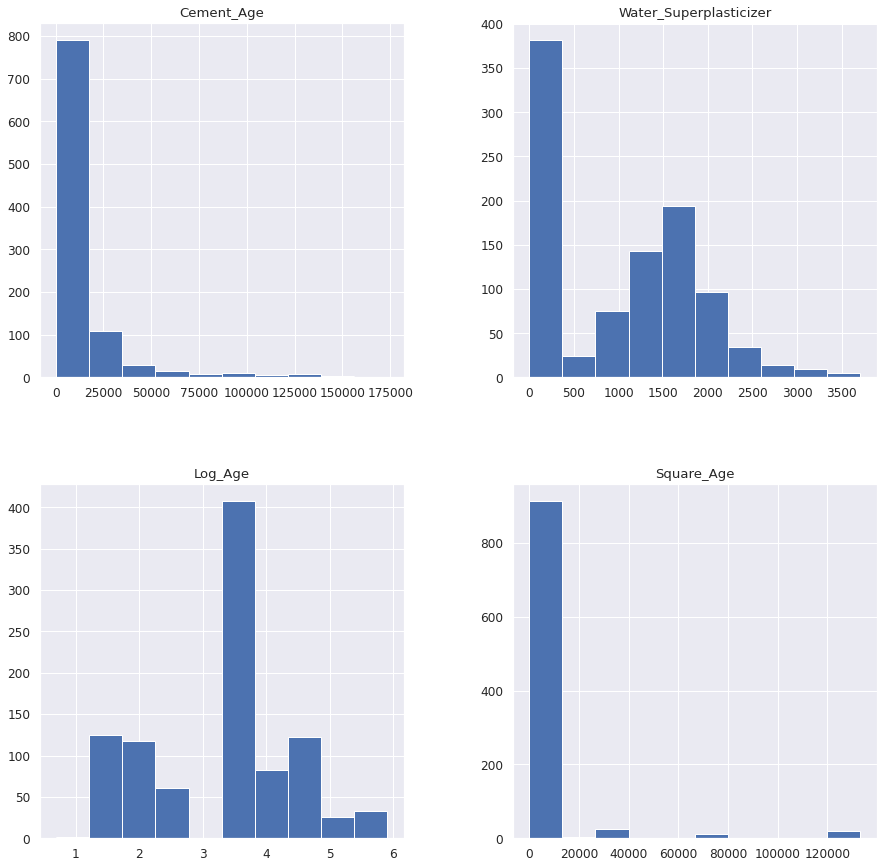

In [86]:
# Plot (Histograma) das novas variáveis
dados[['Cement_Age', 'Water_Superplasticizer', 'Log_Age', 'Square_Age']].hist(figsize=(15, 15), bins=10) 
plt.show()

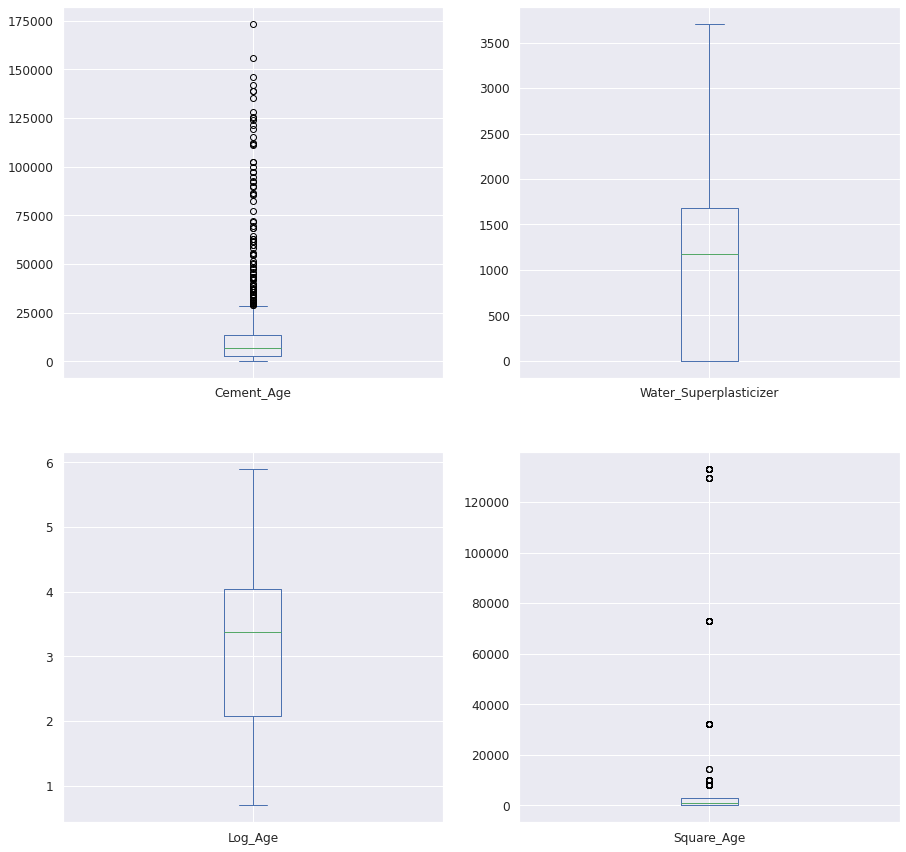

In [87]:
# Plot (BoxPlot) das novas variáveis
dados[['Cement_Age', 'Water_Superplasticizer', 'Log_Age', 'Square_Age']].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 15), sharex=False, sharey=False)
plt.show()

> Dessa forma, a aplicação da técnica de Isolation Forest seria mais indicada para as variáveis **Cement_Age** e **Square_Age**, pois estas apresentam uma quantidade significativa de outliers.

<br>

# Limpeza nos Dados

<br>

## Verificando Valores Duplicados

In [88]:
# Shape
print(dados.shape)

# Verifica quantidade de valores duplicados
print(dados.duplicated().sum())

(977, 13)
0


<br>

## Tratando Valores Outliers

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
5   266.0             114.0     0.0  228.0               0.0            932.0   
7   380.0              95.0     0.0  228.0               0.0            932.0   
8   266.0             114.0     0.0  228.0               0.0            932.0   

   FineAggregate  Age  ConcreteCompressiveStrength  Cement_Age  \
0          676.0   28                    79.986111     15120.0   
1          676.0   28                    61.887366     15120.0   
5          670.0   90                    47.029847     23940.0   
7          594.0   28                    36.447770     10640.0   
8          670.0   28                    45.854291      7448.0   

   Water_Superplasticizer   Log_Age  Square_Age  
0                   405.0  3.367296         784  
1                   405.0  3.367296         784  
5                     0.0  4.510860        8100  
7                     0.0  3.367296         784  
8                     0.0  3.367296         784

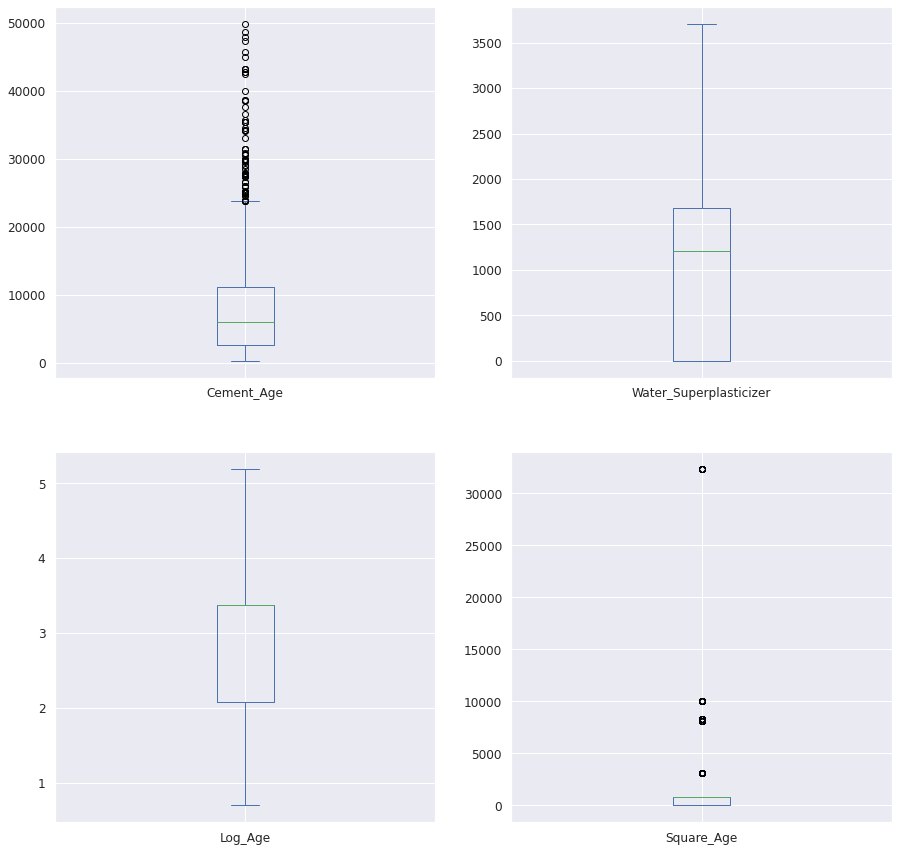

In [89]:
from sklearn.ensemble import IsolationForest

# Cria uma cópia do conjunto de dados para não modificar o original
dados_tratados = dados.copy()

# Define a contaminação
contamination_rate = 0.05

# Aplica Isolation Forest à variável Cement_Age
iso_cement_age = IsolationForest(contamination=contamination_rate, random_state=42)
dados_tratados['Outlier_Cement_Age'] = iso_cement_age.fit_predict(dados_tratados[['Cement_Age']])
mask_cement_age = dados_tratados['Outlier_Cement_Age'] != -1

# Aplica Isolation Forest à variável Square_Age
iso_square_age = IsolationForest(contamination=contamination_rate, random_state=42)
dados_tratados['Outlier_Square_Age'] = iso_square_age.fit_predict(dados_tratados[['Square_Age']])
mask_square_age = dados_tratados['Outlier_Square_Age'] != -1

# Combina as máscaras para manter apenas os dados que não são outliers em nenhuma das variáveis
mask_combined = mask_cement_age & mask_square_age

# Filtra os dados para remover os outliers
dados_tratados = dados_tratados[mask_combined]

# Remove as colunas de outliers usadas apenas para filtragem
dados_tratados = dados_tratados.drop(columns=['Outlier_Cement_Age', 'Outlier_Square_Age'])

# Exibe o conjunto de dados resultante
display(dados_tratados.head())

# Plot (BoxPlot) das novas variáveis
dados_tratados[['Cement_Age', 'Water_Superplasticizer', 'Log_Age', 'Square_Age']].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 15), sharex=False, sharey=False)
plt.show()

dados = dados_tratados

#### Tratando Manualmente Variável Square_Age

count      923.000000
mean      2078.464789
std       4043.357738
min          1.000000
25%         49.000000
50%        784.000000
75%        784.000000
max      32400.000000
Name: Square_Age, dtype: float64


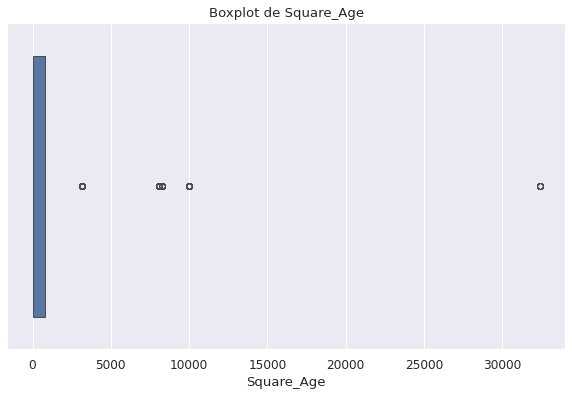

Quantidade de valores com valor acima de 10000: 8
Forma inicial dos dados: (923, 13)
Forma dos dados após a remoção: (915, 13)


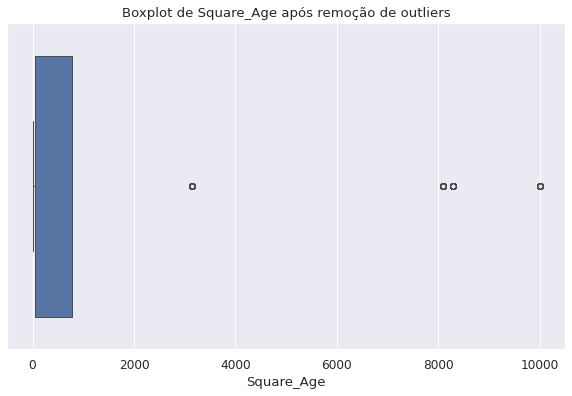

In [90]:
# Descrever a variável Square_Age
print(dados['Square_Age'].describe())

# Plotar o boxplot da variável Square_Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['Square_Age'])
plt.title('Boxplot de Square_Age')
plt.show()

# Contar a quantidade de valores acima de 10.000
acima_10000 = (dados['Square_Age'] > 10000).sum()
print(f"Quantidade de valores com valor acima de 10000: {acima_10000}")

# Mostrar a forma inicial dos dados
print(f"Forma inicial dos dados: {dados.shape}")

# Remover valores acima de 10.000 na variável Square_Age
dados = dados[dados['Square_Age'] <= 10000]

# Mostrar a forma dos dados após a remoção
print(f"Forma dos dados após a remoção: {dados.shape}")

# Plotar o boxplot novamente para verificar a remoção dos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['Square_Age'])
plt.title('Boxplot de Square_Age após remoção de outliers')
plt.show()

In [91]:
dados.describe()

Cement  BlastFurnaceSlag      FlyAsh       Water  Superplasticizer  \
count  915.000000        915.000000  915.000000  915.000000        915.000000   
mean   273.079290         72.254372   59.667104  181.135191          6.092246   
std    101.935942         86.546636   64.513469   18.597076          5.277002   
min    102.000000          0.000000    0.000000  140.000000          0.000000   
25%    190.340000          0.000000    0.000000  166.610000          0.000000   
50%    252.310000         19.000000    0.000000  185.000000          6.720000   
75%    337.900000        143.000000  119.400000  192.000000         10.050000   
max    540.000000        342.100000  200.100000  228.000000         22.100000   

       CoarseAggregate  FineAggregate         Age  \
count       915.000000     915.000000  915.000000   
mean        976.394699     775.114645   32.029508   
std          77.584139      75.303398   28.077226   
min         801.000000     594.000000    1.000000   
25%         932.000000     736.300000    7.000000   
50%         971.800000     779.320000   28.000000   
75%        1040.000000     821.000000   28.000000   
max        1145.000000     945.000000  100.000000   

       ConcreteCompressiveStrength    Cement_Age  Water_Superplasticizer  \
count                   915.000000    915.000000              915.000000   
mean                     34.404235   8612.394962             1041.953768   
std                      16.379180   8513.711495              873.565936   
min                       2.331808    306.000000                0.000000   
25%                      22.391767   2674.000000                0.000000   
50%                      33.087953   5937.960000             1238.800000   
75%                      44.291594  10902.080000             1680.360000   
max                      82.599225  48600.000000             3708.380000   

          Log_Age    Square_Age  
count  915.000000    915.000000  
mean     3.096052   1813.358470  
std      0.973322   2893.830401  
min      0.693147      1.000000  
25%      2.079442     49.000000  
50%      3.367296    784.000000  
75%      3.367296    784.000000  
max      4.615121  10000.000000

Cement  BlastFurnaceSlag    FlyAsh     Water  \
Cement                       1.000000         -0.292165 -0.359159 -0.061287   
BlastFurnaceSlag            -0.292165          1.000000 -0.342595  0.145723   
FlyAsh                      -0.359159         -0.342595  1.000000 -0.284885   
Water                       -0.061287          0.145723 -0.284885  1.000000   
Superplasticizer            -0.007824          0.018511  0.498099 -0.628039   
CoarseAggregate             -0.070059         -0.280894 -0.058454 -0.251366   
FineAggregate               -0.272484         -0.305818  0.083236 -0.350793   
Age                         -0.046940         -0.030050  0.068631 -0.028161   
ConcreteCompressiveStrength  0.465811          0.115010 -0.029632 -0.355690   
Cement_Age                   0.321171         -0.109988 -0.092321 -0.029379   
Water_Superplasticizer      -0.037376          0.031663  0.530402 -0.535739   
Log_Age                     -0.075473          0.004309  0.113270 -0.007677   
Square_Age                  -0.034376         -0.047172  0.032632 -0.028885   

                             Superplasticizer  CoarseAggregate  FineAggregate  \
Cement                              -0.007824        -0.070059      -0.272484   
BlastFurnaceSlag                     0.018511        -0.280894      -0.305818   
FlyAsh                               0.498099        -0.058454       0.083236   
Water                               -0.628039        -0.251366      -0.350793   
Superplasticizer                     1.000000        -0.191680       0.091624   
CoarseAggregate                     -0.191680         1.000000      -0.163610   
FineAggregate                        0.091624        -0.163610       1.000000   
Age                                  0.060115         0.018614       0.038392   
ConcreteCompressiveStrength          0.379356        -0.136440      -0.187222   
Cement_Age                           0.054226        -0.026627      -0.073505   
Water_Superplasticizer               0.988367        -0.246828       0.056077   
Log_Age                              0.125444        -0.049816      -0.014165   
Square_Age                           0.005307         0.063918       0.061695   

                                  Age  ConcreteCompressiveStrength  \
Cement                      -0.046940                     0.465811   
BlastFurnaceSlag            -0.030050                     0.115010   
FlyAsh                       0.068631                    -0.029632   
Water                       -0.028161                    -0.355690   
Superplasticizer             0.060115                     0.379356   
CoarseAggregate              0.018614                    -0.136440   
FineAggregate                0.038392                    -0.187222   
Age                          1.000000                     0.521667   
ConcreteCompressiveStrength  0.521667                     1.000000   
Cement_Age                   0.876163                     0.639061   
Water_Superplasticizer       0.052680                     0.349656   
Log_Age                      0.883573                     0.589943   
Square_Age                   0.960639                     0.419885   

                             Cement_Age  Water_Superplasticizer   Log_Age  \
Cement                         0.321171               -0.037376 -0.075473   
BlastFurnaceSlag              -0.109988                0.031663  0.004309   
FlyAsh                        -0.092321                0.530402  0.113270   
Water                         -0.029379               -0.535739 -0.007677   
Superplasticizer               0.054226                0.988367  0.125444   
CoarseAggregate               -0.026627               -0.246828 -0.049816   
FineAggregate                 -0.073505                0.056077 -0.014165   
Age                            0.876163                0.052680  0.883573   
ConcreteCompressiveStrength    0.639061                0.349656  0.589943   
Cement_Age                     1.00000

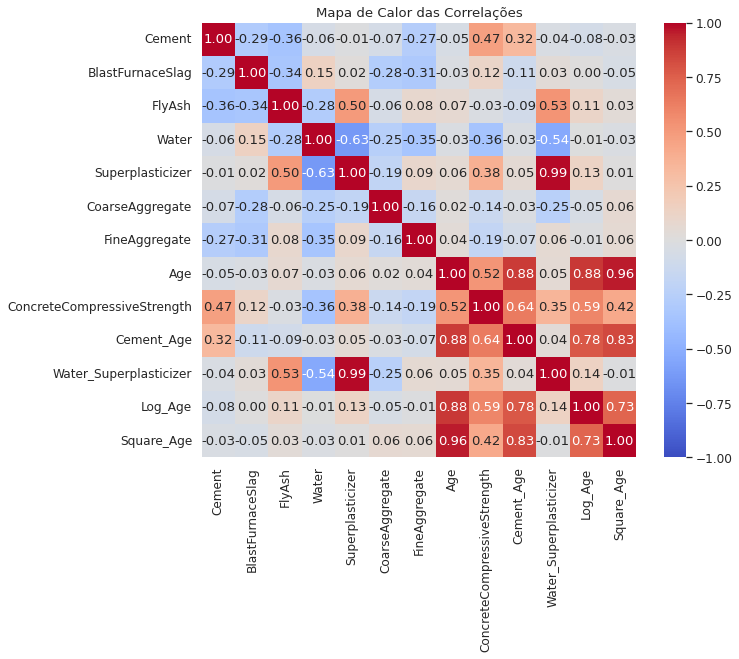

In [92]:
# Visualizando Correlações através de um Mapa de Calor

# Verificando Correlação (tabela)
display(dados.corr())

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

<br><br>

## Seleção de Variáveis Usando Seleção de KBest

- Abordagem padrão e amplamente utilizada para a seleção de variáveis é a SelectKBest do sklearn.feature_selection, que permite selecionar as melhores variáveis com base em testes estatísticos.

                   Feature       Score
8               Cement_Age  630.268317
10                 Log_Age  487.377067
7                      Age  341.356380
0                   Cement  252.998245
11              Square_Age  195.417439
4         Superplasticizer  153.477463
3                    Water  132.238572
9   Water_Superplasticizer  127.170884
6            FineAggregate   33.165068
5          CoarseAggregate   17.318615
1         BlastFurnaceSlag   12.238468
2                   FlyAsh    0.802366
Melhores variáveis selecionadas: ['Cement_Age', 'Log_Age', 'Age', 'Cement', 'Square_Age']


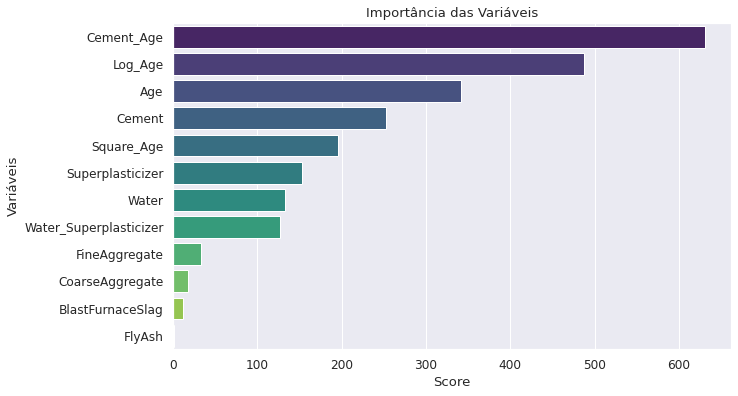

In [93]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separando as variáveis de entrada (X) e a variável alvo (y)
X = dados.drop(columns=['ConcreteCompressiveStrength'])
y = dados['ConcreteCompressiveStrength']

# Aplicando o SelectKBest para selecionar as melhores variáveis
k_best = SelectKBest(score_func=f_regression, k='all')
X_new = k_best.fit_transform(X, y)

# Visualizando as pontuações das variáveis
scores = k_best.scores_

# Criando um DataFrame com as pontuações
features = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
})

# Ordenando as variáveis pelas pontuações
features = features.sort_values(by='Score', ascending=False)

# Exibindo as pontuações
print(features)

# Selecionando as 5 melhores variáveis (por exemplo)
k = 5
selected_features = features['Feature'][:k].tolist()
print("Melhores variáveis selecionadas:", selected_features)

# Criando um novo DataFrame apenas com as melhores variáveis
dados_selecionados = dados[selected_features + ['ConcreteCompressiveStrength']]

# Visualizando graficamente as pontuações das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=features, palette='viridis')
plt.title('Importância das Variáveis')
plt.xlabel('Score')
plt.ylabel('Variáveis')
plt.show()

In [94]:
# Selecionando as variáveis mais importantes
selected_features = ['Cement_Age', 'Log_Age', 'Age', 'Cement', 'Superplasticizer', 'Water']

# Criando um novo DataFrame apenas com as variáveis selecionadas
dados_selecionados = dados[selected_features + ['ConcreteCompressiveStrength']]

# Exibindo as primeiras linhas do DataFrame atualizado
print(dados_selecionados.head())

   Cement_Age   Log_Age  Age  Cement  Superplasticizer  Water  \
0     15120.0  3.367296   28   540.0               2.5  162.0   
1     15120.0  3.367296   28   540.0               2.5  162.0   
5     23940.0  4.510860   90   266.0               0.0  228.0   
7     10640.0  3.367296   28   380.0               0.0  228.0   
8      7448.0  3.367296   28   266.0               0.0  228.0   

   ConcreteCompressiveStrength  
0                    79.986111  
1                    61.887366  
5                    47.029847  
7                    36.447770  
8                    45.854291  


In [95]:
dados.describe()

Cement  BlastFurnaceSlag      FlyAsh       Water  Superplasticizer  \
count  915.000000        915.000000  915.000000  915.000000        915.000000   
mean   273.079290         72.254372   59.667104  181.135191          6.092246   
std    101.935942         86.546636   64.513469   18.597076          5.277002   
min    102.000000          0.000000    0.000000  140.000000          0.000000   
25%    190.340000          0.000000    0.000000  166.610000          0.000000   
50%    252.310000         19.000000    0.000000  185.000000          6.720000   
75%    337.900000        143.000000  119.400000  192.000000         10.050000   
max    540.000000        342.100000  200.100000  228.000000         22.100000   

       CoarseAggregate  FineAggregate         Age  \
count       915.000000     915.000000  915.000000   
mean        976.394699     775.114645   32.029508   
std          77.584139      75.303398   28.077226   
min         801.000000     594.000000    1.000000   
25%         932.000000     736.300000    7.000000   
50%         971.800000     779.320000   28.000000   
75%        1040.000000     821.000000   28.000000   
max        1145.000000     945.000000  100.000000   

       ConcreteCompressiveStrength    Cement_Age  Water_Superplasticizer  \
count                   915.000000    915.000000              915.000000   
mean                     34.404235   8612.394962             1041.953768   
std                      16.379180   8513.711495              873.565936   
min                       2.331808    306.000000                0.000000   
25%                      22.391767   2674.000000                0.000000   
50%                      33.087953   5937.960000             1238.800000   
75%                      44.291594  10902.080000             1680.360000   
max                      82.599225  48600.000000             3708.380000   

          Log_Age    Square_Age  
count  915.000000    915.000000  
mean     3.096052   1813.358470  
std      0.973322   2893.830401  
min      0.693147      1.000000  
25%      2.079442     49.000000  
50%      3.367296    784.000000  
75%      3.367296    784.000000  
max      4.615121  10000.000000

In [96]:
dados_selecionados.describe()

Cement_Age     Log_Age         Age      Cement  Superplasticizer  \
count    915.000000  915.000000  915.000000  915.000000        915.000000   
mean    8612.394962    3.096052   32.029508  273.079290          6.092246   
std     8513.711495    0.973322   28.077226  101.935942          5.277002   
min      306.000000    0.693147    1.000000  102.000000          0.000000   
25%     2674.000000    2.079442    7.000000  190.340000          0.000000   
50%     5937.960000    3.367296   28.000000  252.310000          6.720000   
75%    10902.080000    3.367296   28.000000  337.900000         10.050000   
max    48600.000000    4.615121  100.000000  540.000000         22.100000   

            Water  ConcreteCompressiveStrength  
count  915.000000                   915.000000  
mean   181.135191                    34.404235  
std     18.597076                    16.379180  
min    140.000000                     2.331808  
25%    166.610000                    22.391767  
50%    185.000000                    33.087953  
75%    192.000000                    44.291594  
max    228.000000                    82.599225

### Conclusão

- Aplicamos novas técnicas de pré-processamento dos dados, incluindo a criação de variáveis de interação, transformações logarítmicas e quadráticas, e remoção de outliers usando Isolation Forest.
- Posteriormente, realizamos a seleção de variáveis utilizando SelectKBest para identificar as variáveis mais relevantes. Com base nisso, selecionamos as variáveis Cement_Age, Log_Age, Age, Cement, Superplasticizer e Water para dar continuidade à construção e avaliação dos modelos.

> Dessa forma, decidimos manter dois conjuntos de dados: um conjunto completo e um conjunto com as variáveis selecionadas, para comparar o desempenho dos modelos em ambas as versões e determinar qual abordagem oferece melhores resultados.

<br><br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br><br>

## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.
- Será criado para dados e dados_selecionados.

In [97]:
## dados

# Cria um objeto separado para a variável alvo
y = dados.ConcreteCompressiveStrength

# Cria um objeto separado para as variáveis de entrada
X = dados.drop('ConcreteCompressiveStrength', axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=1234)

# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)


## dados_selecionados

# Cria um objeto separado para a variável alvo
y_selecionado = dados_selecionados['ConcreteCompressiveStrength']

# Cria um objeto separado para as variáveis de entrada
X_selecionado = dados_selecionados.drop('ConcreteCompressiveStrength', axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_selecionado_treino, X_selecionado_teste, y_selecionado_treino, y_selecionado_teste = train_test_split(
    X_selecionado, 
    y_selecionado, 
    test_size=0.2, 
    random_state=1234
)

# Print do shape
print(X_selecionado_treino.shape, X_selecionado_teste.shape, y_selecionado_treino.shape, y_selecionado_teste.shape)

(732, 12) (183, 12) (732,) (183,)
(732, 6) (183, 6) (732,) (183,)


<br>

## Padronização

- Não é necessário aplicar padronização/normalização na variável alvo.

In [98]:
# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# Converte os arrays de volta para DataFrame
X_treino_scaled = pd.DataFrame(X_treino_scaled, columns=X_treino.columns, index=X_treino.index)
X_teste_scaled = pd.DataFrame(X_teste_scaled, columns=X_teste.columns, index=X_teste.index)

X_treino = X_treino_scaled
X_teste = X_teste_scaled


## dados_selecionados

# Ajusta e transforma os dados de treino
X_treino_selecionado_scaled = scaler.fit_transform(X_selecionado_treino)
X_teste_selecionado_scaled = scaler.transform(X_selecionado_teste)

# Converte os arrays de volta para DataFrame
X_treino_selecionado_scaled = pd.DataFrame(X_treino_selecionado_scaled, columns=X_selecionado_treino.columns, index=X_selecionado_treino.index)
X_teste_selecionado_scaled = pd.DataFrame(X_teste_selecionado_scaled, columns=X_selecionado_teste.columns, index=X_selecionado_teste.index)

X_selecionado_treino = X_treino_selecionado_scaled
X_selecionado_teste = X_teste_selecionado_scaled

In [99]:
display(X_treino.head(3))
display(X_selecionado_treino.head(3))

Cement  BlastFurnaceSlag    FlyAsh     Water  Superplasticizer  \
199 -0.828322         -0.824141  1.054207 -1.054354          0.339952   
105  1.234431          0.275160 -0.898839 -1.849533          1.022602   
754  2.584717         -0.824141 -0.898839 -0.468489         -1.121258   

     CoarseAggregate  FineAggregate       Age  Cement_Age  \
199         1.442566       0.395443 -1.034516   -0.941924   
105        -0.385719       1.032115 -0.890672   -0.680367   
754         1.889423      -2.133373  2.094086    4.664721   

     Water_Superplasticizer   Log_Age  Square_Age  
199                0.269820 -1.759018   -0.619930  
105                0.746478 -1.043770   -0.605947  
754               -1.158150  1.465173    2.208335

Cement_Age   Log_Age       Age    Cement  Superplasticizer     Water
199   -0.941924 -1.759018 -1.034516 -0.828322          0.339952 -1.054354
105   -0.680367 -1.043770 -0.890672  1.234431          1.022602 -1.849533
754    4.664721  1.465173  2.094086  2.584717         -1.121258 -0.468489

<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>

<br><br><br>

## Criando Dataframe para salvar métricas de cada Modelo

In [100]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 1 com Regressão Logística (Benchmark)</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.


<br>

### Criação e Treinamento do Modelo

In [101]:
# Cria o modelo
modelo_RL = LinearRegression()

# Treina o modelo
modelo_RL.fit(X_treino, y_treino)

LinearRegression()

#### Visualizando coeficientes das variáveis preditoras

                        Coeficiente
Cement                    13.531369
Log_Age                    9.062510
BlastFurnaceSlag           8.447013
FlyAsh                     4.719997
Age                        4.291910
Superplasticizer           2.828948
FineAggregate              1.497999
CoarseAggregate            0.946761
Cement_Age                -1.513952
Square_Age                -2.309432
Water_Superplasticizer    -2.538486
Water                     -3.551753


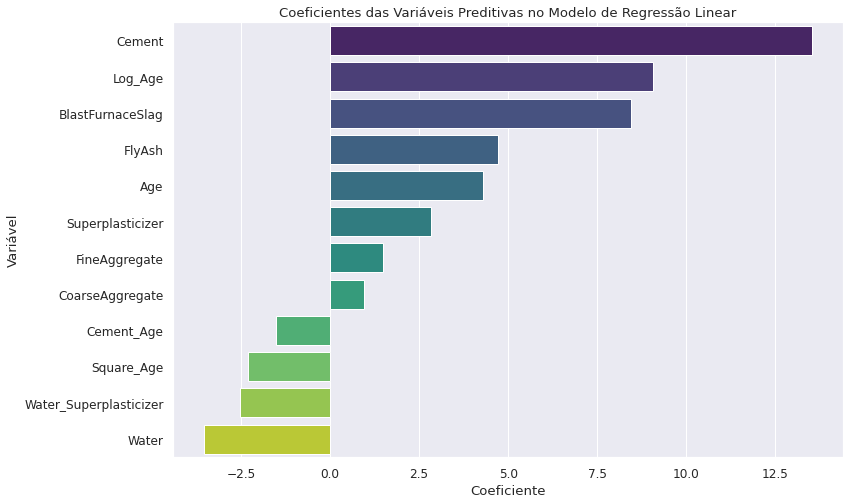

In [102]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RL.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RL.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[38.76051185 39.33243001 42.14981197  9.95501845 41.75610136 28.90258165
 47.08716304 44.21474679 56.23206985 30.49279584]




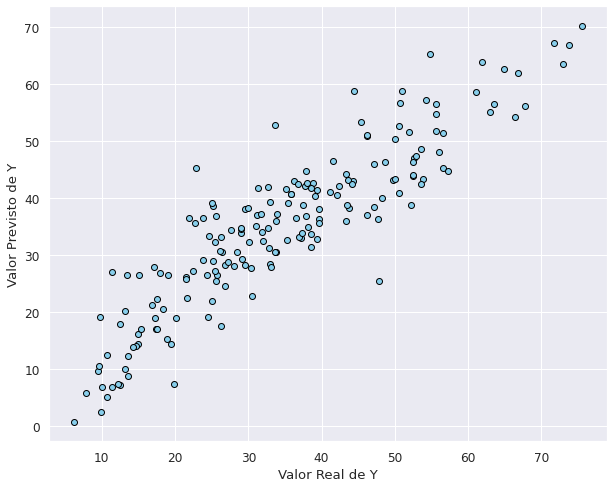

In [103]:
# Previsões com dados de teste
pred_v1 = modelo_RL.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v1[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 5.360646862229844
MSE - Erro Quadrático Médio: 46.393684713503674
RMSE - Raiz Quadrada do Erro Quadrático Médio: 6.811290972605977
O valor é 6.81 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8102729887716443
Variância Explicada: 0.8106354033580068


ANÁLISE DE RESÍDUOS


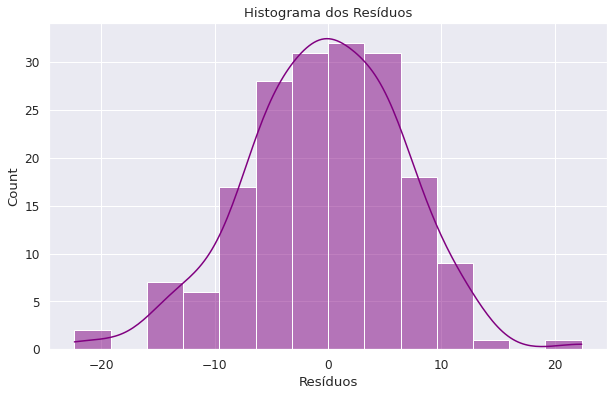

In [104]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v1)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v1)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v1)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v1)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_teste - pred_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [105]:
# Salvando as métricas no dataframe com formatação
modelo_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RL V1'],
    'Nome do Algoritmo': ['Regressão Linear'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0   Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   

   Variância Explicada  
0             0.810635

<br>

> # Versão 2

- Usando conjunto de dados com **variáveis selecionadas**.


<br>

### Criação e Treinamento do Modelo

In [106]:
# Cria o modelo
modelo_RL_v2 = LinearRegression()

# Treina o modelo
modelo_RL_v2.fit(X_selecionado_treino, y_selecionado_treino)

LinearRegression()

#### Visualizando coeficientes das variáveis preditoras

                  Coeficiente
Log_Age             10.187477
Cement               8.430668
Superplasticizer     3.011169
Age                 -0.138269
Cement_Age          -0.307267
Water               -3.379164


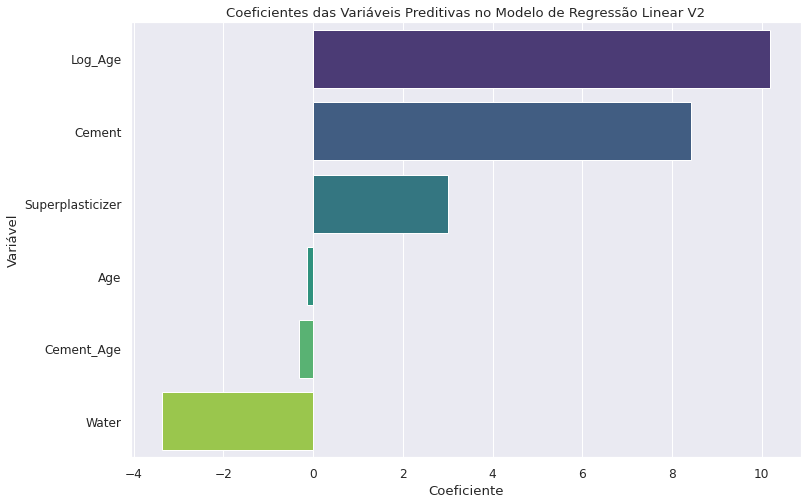

In [107]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RL_v2.coef_, X_selecionado_treino.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Linear V2')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[39.15956929 45.42970601 46.02384377 12.12200132 47.00992963 34.78026822
 43.97669648 33.74043435 47.86209244 34.96015314]




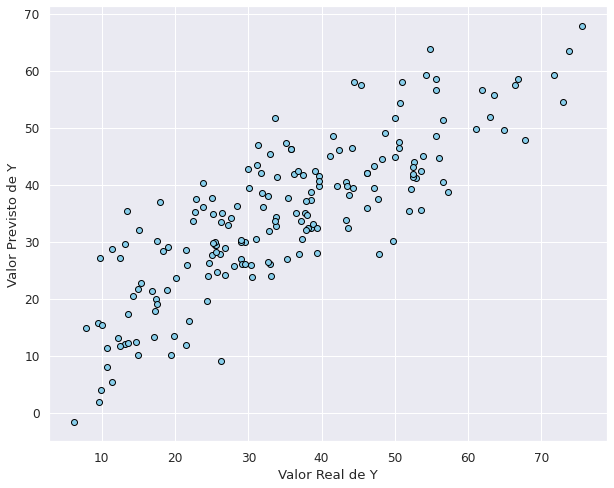

In [108]:
# Previsões com dados de teste
pred_v2 = modelo_RL_v2.predict(X_selecionado_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_selecionado_teste, y=pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 7.132212901153381
MSE - Erro Quadrático Médio: 77.16136892487185
RMSE - Raiz Quadrada do Erro Quadrático Médio: 8.784154422872577
O valor é 8.78 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso NÃO é um bom sinal.
Coeficiente R2: 0.6844485192584121
Variância Explicada: 0.6847965259178812


ANÁLISE DE RESÍDUOS


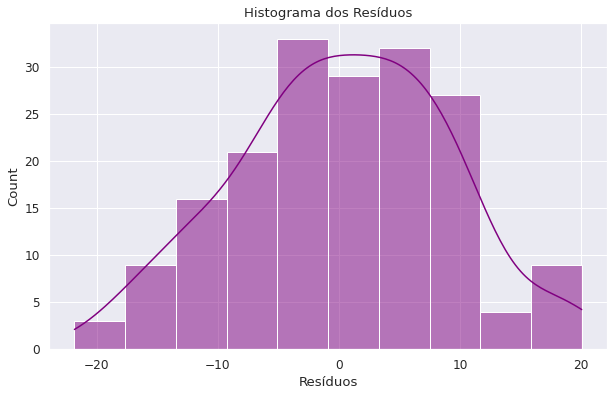

In [109]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_selecionado_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_selecionado_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_selecionado_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_selecionado_teste, pred_v2)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_selecionado_teste - pred_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [110]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RL V2'],
    'Nome do Algoritmo': ['Regressão Linear'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0   Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1   Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   

   Variância Explicada  
0             0.810635  
1             0.684797

<br>

> # Versão 3

- Usando conjunto de dados com **variáveis selecionadas**.
- Removendo a variável **Age** e **Cement_Age**.


<br>

### Editando Dados de Treino e Teste

In [111]:
# Dividindo os dados em Dados de Treino e Dados de Teste
# Usando conjunto de dados com variáveis selecionadas, removendo a variável 'Age' e 'Cement_Age'

# Cria um objeto separado para a variável alvo
y_selecionado_v3 = dados_selecionados['ConcreteCompressiveStrength']

# Cria um objeto separado para as variáveis de entrada, removendo 'Age'
X_selecionado_v3 = dados_selecionados.drop(['ConcreteCompressiveStrength', 'Age', 'Cement_Age'], axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_selecionado_treino_v3, X_selecionado_teste_v3, y_selecionado_treino_v3, y_selecionado_teste_v3 = train_test_split(
    X_selecionado_v3, 
    y_selecionado_v3, 
    test_size=0.2, 
    random_state=1234
)

# Padronização dos dados
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_treino_selecionado_scaled_v3 = scaler.fit_transform(X_selecionado_treino_v3)
X_teste_selecionado_scaled_v3 = scaler.transform(X_selecionado_teste_v3)

# Converte os arrays de volta para DataFrame
X_treino_selecionado_scaled_v3 = pd.DataFrame(X_treino_selecionado_scaled_v3, columns=X_selecionado_treino_v3.columns, index=X_selecionado_treino_v3.index)
X_teste_selecionado_scaled_v3 = pd.DataFrame(X_teste_selecionado_scaled_v3, columns=X_selecionado_teste_v3.columns, index=X_selecionado_teste_v3.index)

<br>

### Criação, Treinamento, Previsão, Avaliação e Salvando em DF o Modelo


Visualizando Coeficientes das Variáveis Preditivas



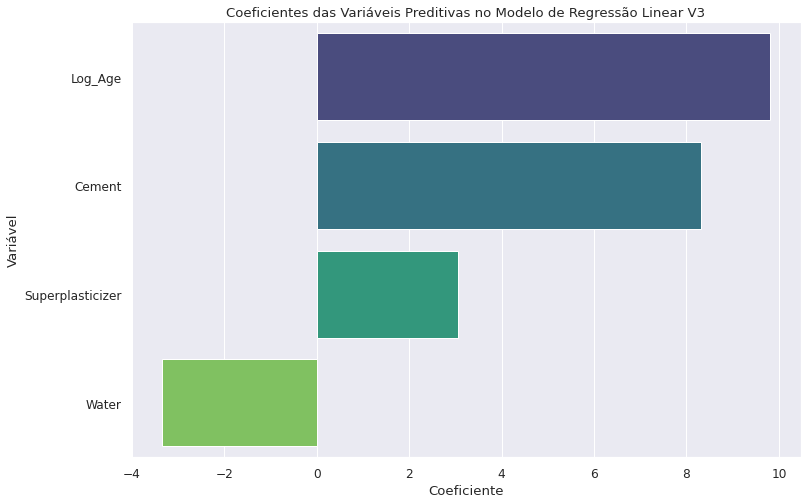

[39.00284086 45.78861404 46.39508505 12.42723726 47.47003392 34.58290336
 43.70978592 33.78881525 47.69093585 34.80295825]



PREVISÕES



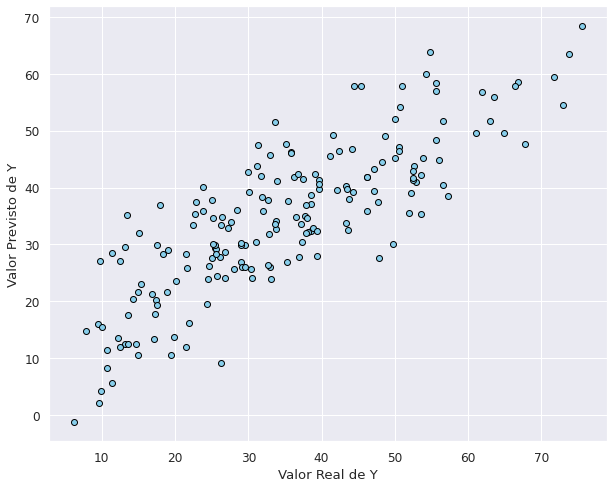




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 7.14078893097052
MSE - Erro Quadrático Médio: 77.25188362293282
RMSE - Raiz Quadrada do Erro Quadrático Médio: 8.789305070535033
O valor é 8.79 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso NÃO é um bom sinal.
Coeficiente R2: 0.6840783593273483
Variância Explicada: 0.6844111716708922



ANÁLISE DE RESÍDUOS


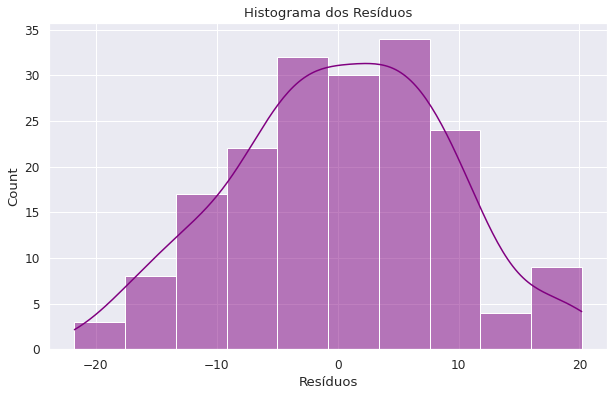

In [112]:
## Criando e Treinando o Modelo

# Cria o modelo
modelo_RL_v3 = LinearRegression()

# Treina o modelo
modelo_RL_v3.fit(X_treino_selecionado_scaled_v3, y_selecionado_treino_v3)


## Visualizando coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef_v3 = pd.DataFrame(modelo_RL_v3.coef_, X_treino_selecionado_scaled_v3.columns, columns=['Coeficiente'])
df_coef_v3 = df_coef_v3.sort_values(by='Coeficiente', ascending=False)

# Visualização Gráfica dos coeficientes das variáveis preditoras
df_coef_v3.reset_index(inplace=True)
df_coef_v3.rename(columns={'index': 'Variável'}, inplace=True)
df_coef_v3 = df_coef_v3.sort_values(by='Coeficiente', ascending=False)

print('\nVisualizando Coeficientes das Variáveis Preditivas\n')

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef_v3, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Linear V3')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

## Previsões

# Previsões com dados de teste
pred_v3 = modelo_RL_v3.predict(X_teste_selecionado_scaled_v3)

# Imprime as 10 primeiras previsões
print(pred_v3[:10])

print('\n==========================================================================\n')

print('\nPREVISÕES\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_selecionado_teste_v3, y=pred_v3, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')

## Avaliação do Modelo

# Métricas de Avaliação

print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_v3 = mean_absolute_error(y_selecionado_teste_v3, pred_v3)
print('MAE - Erro Médio Absoluto:', mae_v3)

# MSE - Erro Quadrático Médio
mse_v3 = mean_squared_error(y_selecionado_teste_v3, pred_v3)
print('MSE - Erro Quadrático Médio:', mse_v3)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_v3 = np.sqrt(mse_v3)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_v3)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_v3 = dados['ConcreteCompressiveStrength'].mean()
std_value_v3 = dados['ConcreteCompressiveStrength'].std()
half_std_value_v3 = std_value_v3 / 2
rmse_as_percentage_of_mean_v3 = (rmse_v3 / mean_value_v3) * 100
rmse_as_percentage_of_std_v3 = (rmse_v3 / std_value_v3) * 100

if rmse_v3 < half_std_value_v3:
    print(f'O valor é {rmse_v3:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_v3:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_v3:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_v3:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_v3 = r2_score(y_selecionado_teste_v3, pred_v3)
print('Coeficiente R2:', r2_v3)

# Variância Explicada
evs_v3 = explained_variance_score(y_selecionado_teste_v3, pred_v3)
print('Variância Explicada:', evs_v3)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS')

# Plot dos resíduos
residuos_v3 = y_selecionado_teste_v3 - pred_v3

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_v3, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [113]:
# Salvando as métricas no dataframe com formatação
modelo_v3 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RL V3'],
    'Nome do Algoritmo': ['Regressão Linear'],
    'MAE': [f"{mae_v3:.2f}"],
    'MSE': [f"{mse_v3:.2f}"],
    'RMSE': [rmse_v3],
    'Coeficiente R2': [r2_v3],
    'Variância Explicada': [evs_v3]
})

df_modelos = pd.concat([df_modelos, modelo_v3], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0   Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1   Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2   Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 2 com Regressão Ridge</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação e Treinamento do Modelo

In [114]:
# Cria o modelo
modelo_RR = Ridge(alpha = 1.0)

# Treinamento
modelo_RR.fit(X_treino, y_treino)

Ridge()

#### Visualizando coeficientes das variáveis preditoras

                        Coeficiente
Cement                    13.186387
Log_Age                    9.096034
BlastFurnaceSlag           8.166116
FlyAsh                     4.452778
Age                        3.831925
Superplasticizer           2.082634
FineAggregate              1.250041
CoarseAggregate            0.751938
Cement_Age                -1.337906
Water_Superplasticizer    -1.819486
Square_Age                -2.018255
Water                     -3.824020


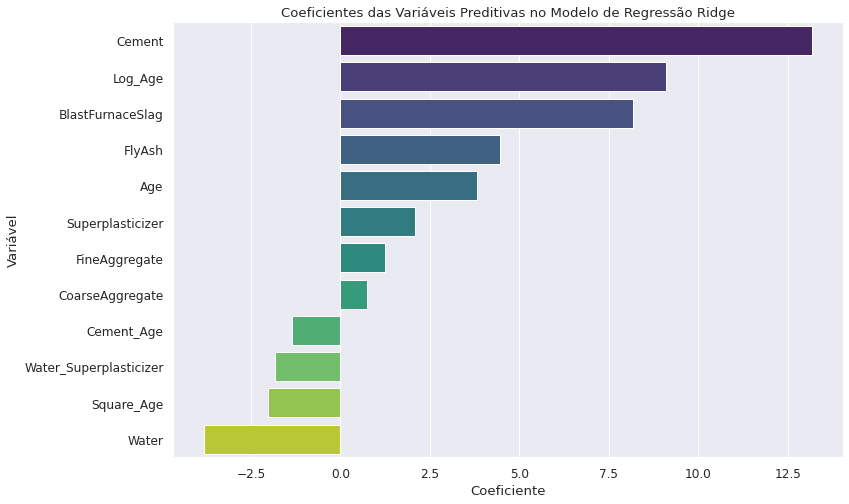

In [115]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RR.coef_, X.columns, columns = ['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)
# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RR.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Ridge')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[38.81293658 39.55295782 42.15852546 10.08104322 41.87088123 28.9445723
 47.05807694 44.09078737 56.10005848 30.47900685]




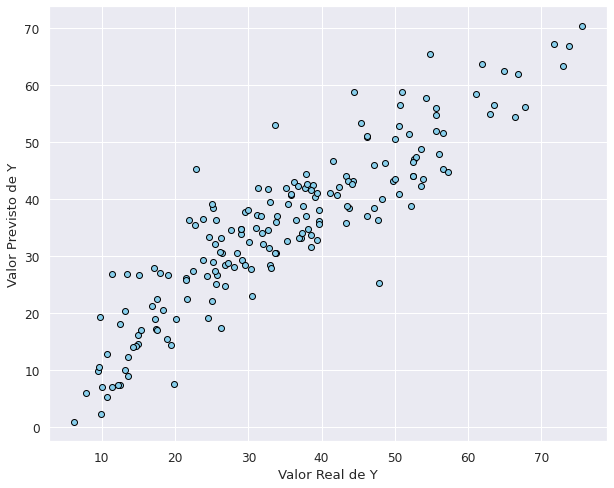

In [116]:
# Previsões com dados de teste
pred_v2 = modelo_RR.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 5.349493108502492
MSE - Erro Quadrático Médio: 46.294422689072036
RMSE - Raiz Quadrada do Erro Quadrático Médio: 6.804000491554365
O valor é 6.80 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8106789209009888
Variância Explicada: 0.8110267524146733


ANÁLISE DE RESÍDUOS


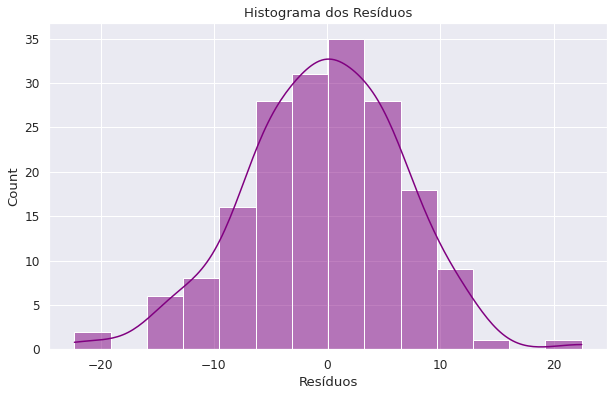

In [117]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v2)
print('Variância Explicada:', evs)

print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')

# Plot dos resíduos
residuos = y_teste - pred_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [118]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 2 RR V1'],
    'Nome do Algoritmo': ['Regressão Ridge'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027

<br>

> # Versão 2

- Usando conjunto de dados com **variáveis selecionadas**.

<br>

### Criação e Treinamento do Modelo

In [119]:
# Cria o modelo
modelo_RR_v2 = Ridge(alpha = 1.0)

# Treina o modelo
modelo_RR_v2.fit(X_selecionado_treino, y_selecionado_treino)

Ridge()

#### Visualizando coeficientes das variáveis preditoras

                  Coeficiente
Log_Age             10.116266
Cement               8.397468
Superplasticizer     3.016628
Age                 -0.124591
Cement_Age          -0.252827
Water               -3.372626


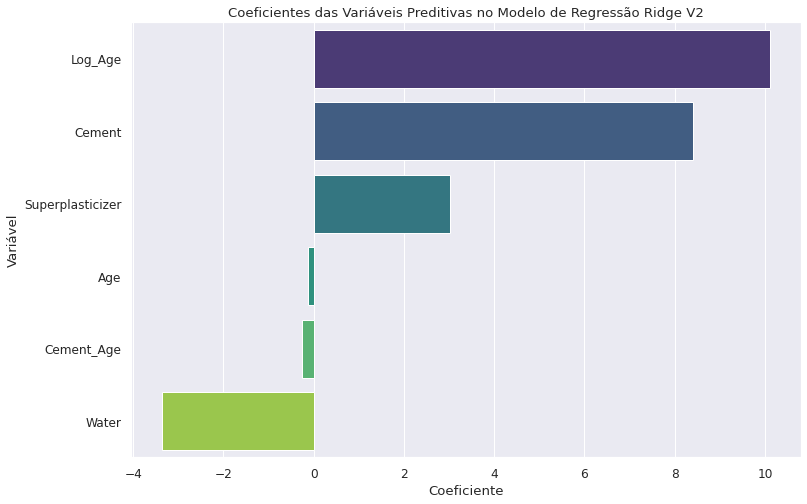

In [120]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_RR_v2.coef_, X_selecionado_treino.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Ridge V2')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[39.13493592 45.46233411 46.05921408 12.20301211 47.05673078 34.7446054
 43.91295141 33.73557263 47.82478012 34.93947398]




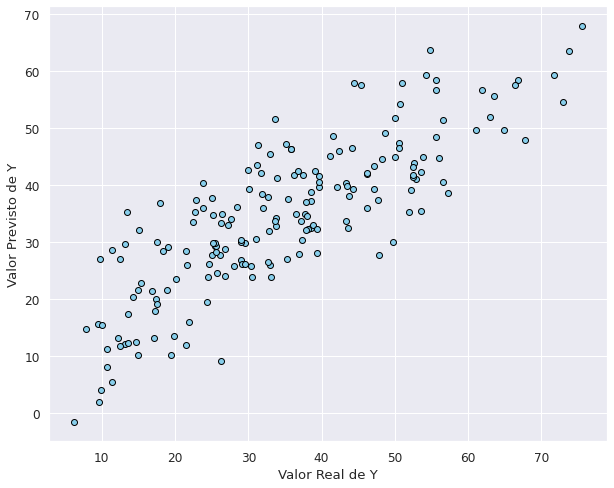

In [121]:
# Previsões com dados de teste
pred_v2 = modelo_RR_v2.predict(X_selecionado_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_selecionado_teste, y=pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 7.132015214469552
MSE - Erro Quadrático Médio: 77.1641664078366
RMSE - Raiz Quadrada do Erro Quadrático Médio: 8.784313656048298
O valor é 8.78 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso NÃO é um bom sinal.
Coeficiente R2: 0.684437078949561
Variância Explicada: 0.6847816906022925


ANÁLISE DE RESÍDUOS


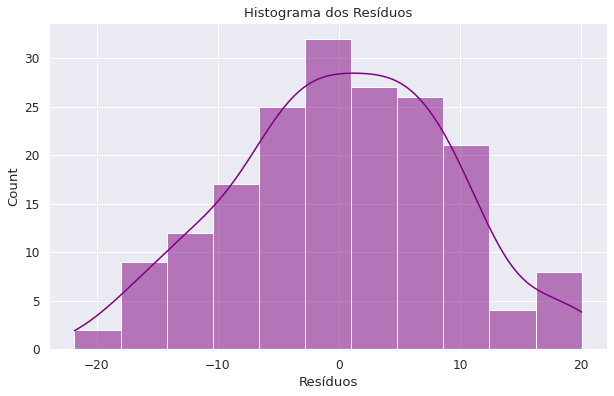

In [122]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_selecionado_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_selecionado_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_selecionado_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_selecionado_teste, pred_v2)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_selecionado_teste - pred_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [123]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RR V2'],
    'Nome do Algoritmo': ['Regressão Ridge'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4    Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027  
4             0.684782

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 3 com Regressão Lasso</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação e Treinamento do Modelo

In [124]:
# Cria o modelo
modelo_LA = Lasso(alpha = 1.0)

# Treinamento
modelo_LA.fit(X_treino, y_treino)

Lasso()

#### Visualizando coeficientes das variáveis preditoras

                        Coeficiente
Log_Age                    8.972620
Cement                     8.292876
BlastFurnaceSlag           3.653790
Superplasticizer           1.893336
Cement_Age                 0.003018
FlyAsh                     0.000000
CoarseAggregate           -0.000000
Age                        0.000000
Water_Superplasticizer     0.000000
Square_Age                 0.000000
FineAggregate             -0.113572
Water                     -3.663168


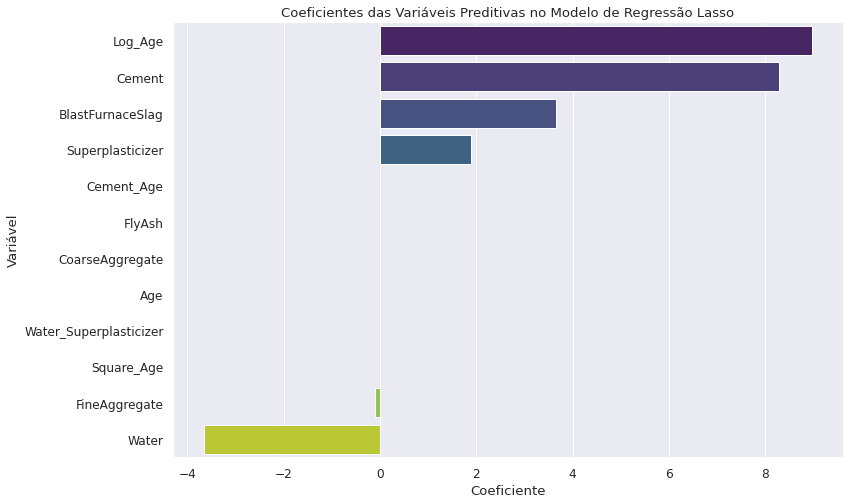

In [125]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_LA.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_LA.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Lasso')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[37.67425057 42.5964816  41.94017635 14.89457866 44.16141379 32.5584356
 43.20684025 40.69151432 52.39062204 31.4528308 ]




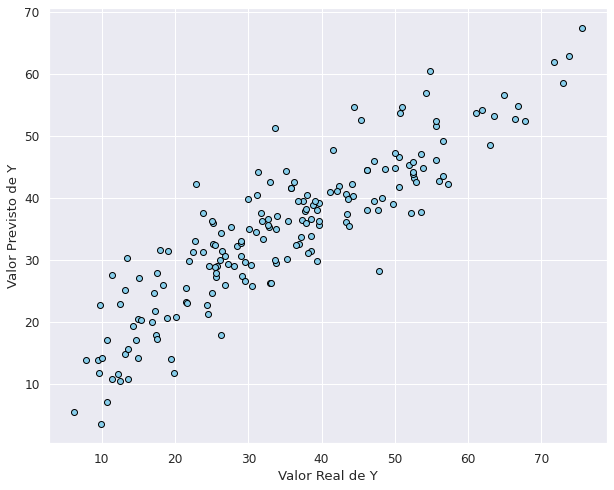

In [126]:
# Previsões com dados de teste
pred_v3 = modelo_LA.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v3[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v3, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 5.921635826558272
MSE - Erro Quadrático Médio: 54.2520742176509
RMSE - Raiz Quadrada do Erro Quadrático Médio: 7.365600737051317
O valor é 7.37 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.7781360985268355
Variância Explicada: 0.7782177229048013


ANÁLISE DE RESÍDUOS


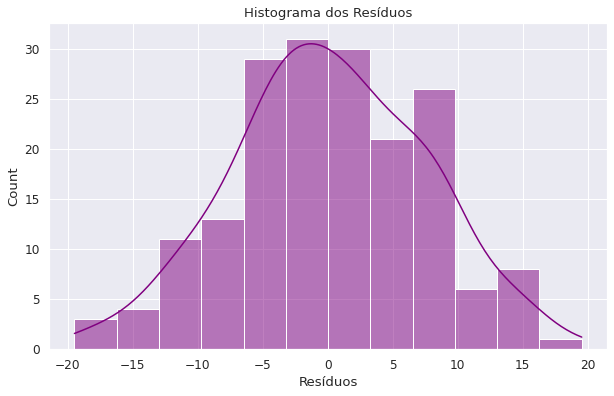

In [127]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v3)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v3)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v3)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v3)
print('Variância Explicada:', evs)

print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')

# Plot dos resíduos
residuos = y_teste - pred_v3

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [128]:
# Salvando as métricas no dataframe com formatação
modelo_v3 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RL V1'],
    'Nome do Algoritmo': ['Regressão Lasso'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v3], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4    Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   
5    Modelo RL V1   Regressão Lasso  5.92  54.25  7.365601        0.778136   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027  
4             0.684782  
5             0.778218

<br>

> # Versão 2

- Usando conjunto de dados com **variáveis selecionadas**.

<br>

### Criação e Treinamento do Modelo

In [129]:
# Cria o modelo
modelo_LA_v2 = Lasso(alpha = 1.0)

# Treina o modelo
modelo_LA_v2.fit(X_selecionado_treino, y_selecionado_treino)

Lasso()

#### Visualizando coeficientes das variáveis preditoras

                  Coeficiente
Log_Age              8.628879
Cement               7.184257
Superplasticizer     2.573041
Cement_Age           0.258688
Age                  0.000000
Water               -2.765009


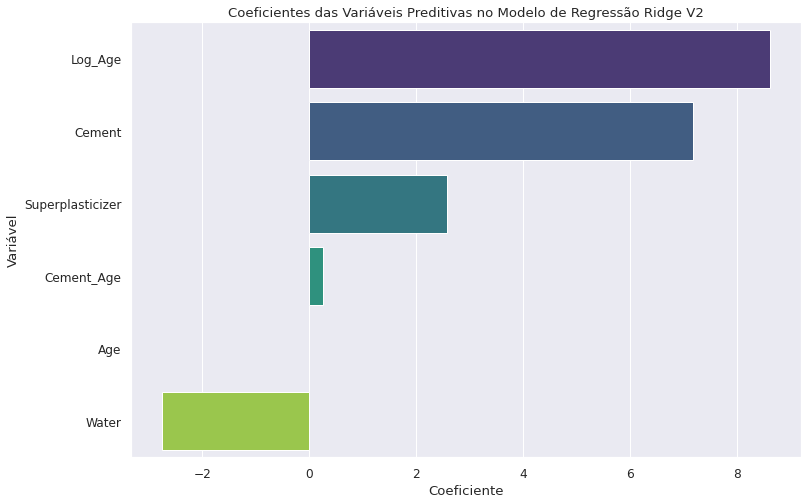

In [130]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_LA_v2.coef_, X_selecionado_treino.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Ridge V2')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

[38.09677463 45.17225761 45.52831727 14.88859499 46.81582486 34.6778726
 42.14112712 34.38465043 45.56872835 34.51479949]




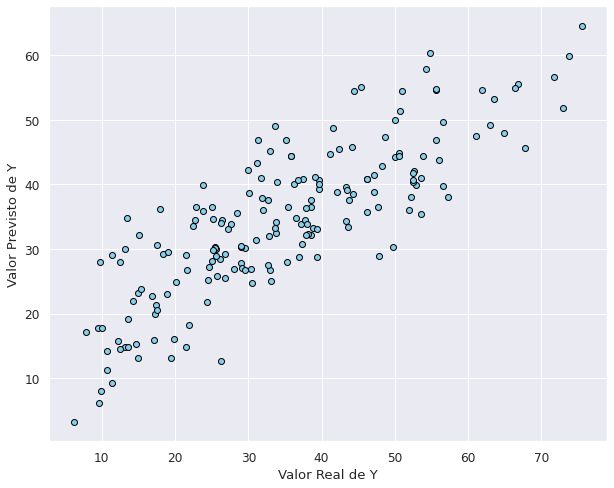

In [131]:
# Previsões com dados de teste
pred_v2 = modelo_LA_v2.predict(X_selecionado_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

print('\n==========================================================================\n')

# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_selecionado_teste, y=pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

MAE - Erro Médio Absoluto: 7.139133621809619
MSE - Erro Quadrático Médio: 78.74727003551897
RMSE - Raiz Quadrada do Erro Quadrático Médio: 8.873965857243252
O valor é 8.87 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso NÃO é um bom sinal.
Coeficiente R2: 0.6779629753813761
Variância Explicada: 0.6784224918303083


ANÁLISE DE RESÍDUOS


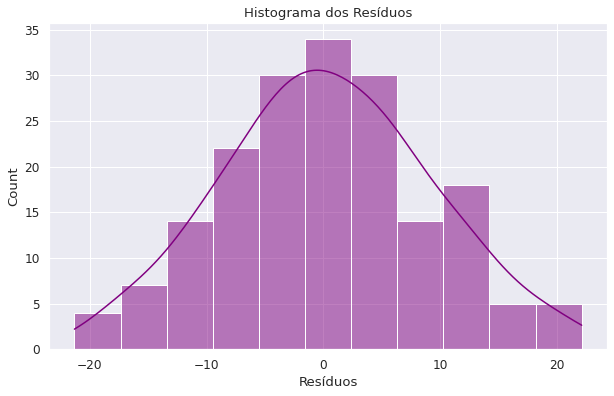

In [132]:
# Métricas de Avaliação

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_selecionado_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_selecionado_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['ConcreteCompressiveStrength'].mean()
std_value = dados['ConcreteCompressiveStrength'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_selecionado_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_selecionado_teste, pred_v2)
print('Variância Explicada:', evs)


print('\n==========================================================================\n')
print('ANÁLISE DE RESÍDUOS')


# Plot dos resíduos
residuos = y_selecionado_teste - pred_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [133]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RL V2'],
    'Nome do Algoritmo': ['Regressão Lasso'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4    Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   
5    Modelo RL V1   Regressão Lasso  5.92  54.25  7.365601        0.778136   
6    Modelo RL V2   Regressão Lasso  7.14  78.75  8.873966        0.677963   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027  
4             0.684782  
5             0.778218  
6             0.678422

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 4 com ElasticNet</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

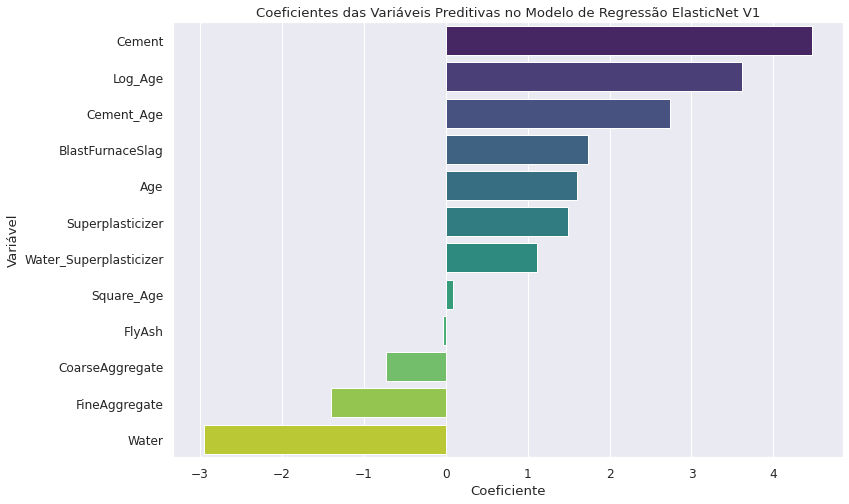




Previsões

[36.54097016 43.82422267 44.40250936 20.92557787 45.97689166 29.87416362
 37.70272885 38.75506105 45.35643446 31.18265431]


Plot das previsões vs valores reais


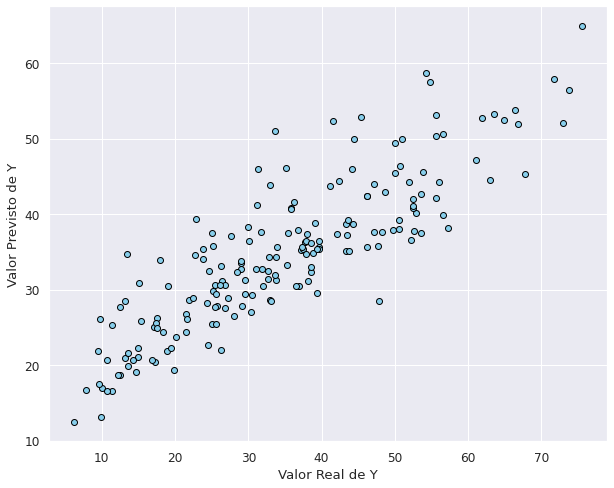




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 7.036999061344297
MSE - Erro Quadrático Médio: 74.85725976315409
RMSE - Raiz Quadrada do Erro Quadrático Médio: 8.652009001564554
O valor é 8.65 e está MAIOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso NÃO é um bom sinal.
Coeficiente R2: 0.6938711755422606
Variância Explicada: 0.6938747155818517



ANÁLISE DE RESÍDUOS



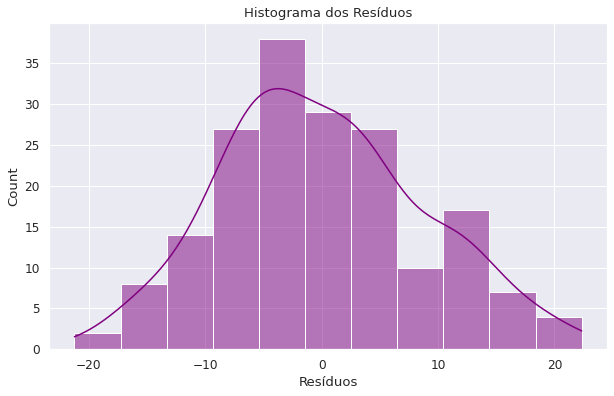

In [134]:
## Criando e Treinando o Modelo

# Criação do modelo ElasticNet
modelo_EN_v1 = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Treinamento do modelo
modelo_EN_v1.fit(X_treino, y_treino)


## Visualizando coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef_en_v1 = pd.DataFrame(modelo_EN_v1.coef_, X.columns, columns=['Coeficiente'])
df_coef_en_v1 = df_coef_en_v1.sort_values(by='Coeficiente', ascending=False)

# Visualização Gráfica dos coeficientes das variáveis preditoras
df_coef_en_v1.reset_index(inplace=True)
df_coef_en_v1.rename(columns={'index': 'Variável'}, inplace=True)
df_coef_en_v1 = df_coef_en_v1.sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef_en_v1, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão ElasticNet V1')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_en_v1 = modelo_EN_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_en_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_en_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_en_v1 = mean_absolute_error(y_teste, pred_en_v1)
print('MAE - Erro Médio Absoluto:', mae_en_v1)

# MSE - Erro Quadrático Médio
mse_en_v1 = mean_squared_error(y_teste, pred_en_v1)
print('MSE - Erro Quadrático Médio:', mse_en_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_en_v1 = np.sqrt(mse_en_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_en_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_en_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_en_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_en_v1 = std_value_en_v1 / 2
rmse_as_percentage_of_mean_en_v1 = (rmse_en_v1 / mean_value_en_v1) * 100
rmse_as_percentage_of_std_en_v1 = (rmse_en_v1 / std_value_en_v1) * 100

if rmse_en_v1 < half_std_value_en_v1:
    print(f'O valor é {rmse_en_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_en_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_en_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_en_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_en_v1 = r2_score(y_teste, pred_en_v1)
print('Coeficiente R2:', r2_en_v1)

# Variância Explicada
evs_en_v1 = explained_variance_score(y_teste, pred_en_v1)
print('Variância Explicada:', evs_en_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_en_v1 = y_teste - pred_en_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_en_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [135]:
# Salvando as métricas no dataframe com formatação
modelo_en_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo EN'],
    'Nome do Algoritmo': ['ElasticNet'],
    'MAE': [f"{mae_en_v1:.2f}"],
    'MSE': [f"{mse_en_v1:.2f}"],
    'RMSE': [rmse_en_v1],
    'Coeficiente R2': [r2_en_v1],
    'Variância Explicada': [evs_en_v1]
})

df_modelos = pd.concat([df_modelos, modelo_en_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4    Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   
5    Modelo RL V1   Regressão Lasso  5.92  54.25  7.365601        0.778136   
6    Modelo RL V2   Regressão Lasso  7.14  78.75  8.873966        0.677963   
7       Modelo EN        ElasticNet  7.04  74.86  8.652009        0.693871   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027  
4             0.684782  
5             0.778218  
6             0.678422  
7             0.693875

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 5 com Árvores de Decisão</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

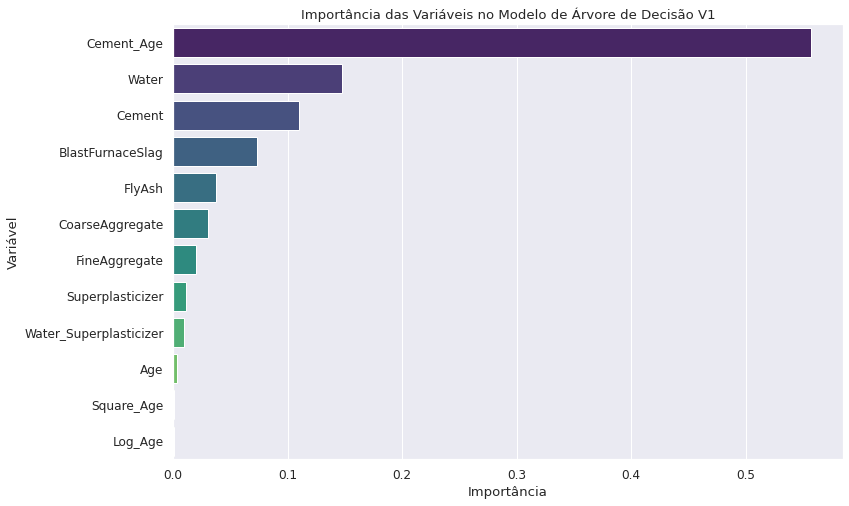




Previsões

[67.86512268 35.76312012 44.298833   23.07676172 39.48629052 25.21689522
 38.76923548 38.70028788 74.4978818  25.72434956]


Plot das previsões vs valores reais


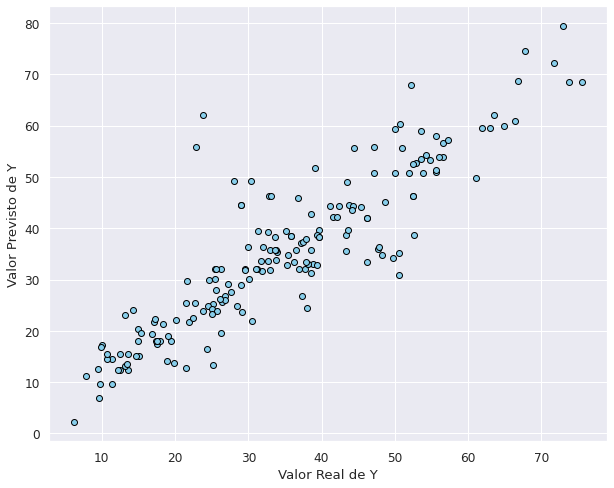




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 4.72106876787296
MSE - Erro Quadrático Médio: 52.69282803846385
RMSE - Raiz Quadrada do Erro Quadrático Médio: 7.258982575985691
O valor é 7.26 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.7845126370400674
Variância Explicada: 0.7860656959894006



ANÁLISE DE RESÍDUOS



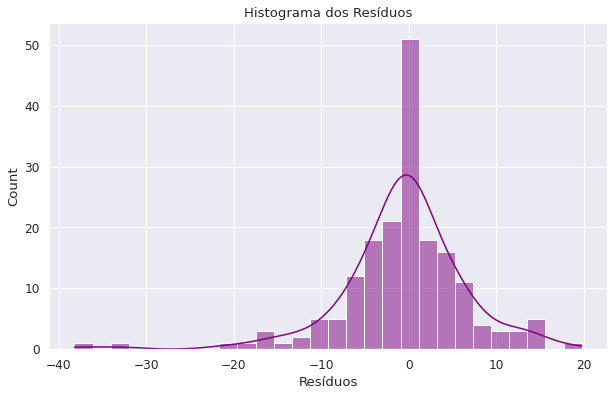

In [136]:
## Criando e Treinando o Modelo

# Criação do modelo de Árvore de Decisão
modelo_DT_v1 = DecisionTreeRegressor(random_state=42)

# Treinamento do modelo
modelo_DT_v1.fit(X_treino, y_treino)


## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_dt_v1 = pd.DataFrame(modelo_DT_v1.feature_importances_, X.columns, columns=['Importância'])
df_importance_dt_v1 = df_importance_dt_v1.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_dt_v1.reset_index(inplace=True)
df_importance_dt_v1.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_dt_v1 = df_importance_dt_v1.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_dt_v1, palette='viridis')
plt.title('Importância das Variáveis no Modelo de Árvore de Decisão V1')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_dt_v1 = modelo_DT_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_dt_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_dt_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_dt_v1 = mean_absolute_error(y_teste, pred_dt_v1)
print('MAE - Erro Médio Absoluto:', mae_dt_v1)

# MSE - Erro Quadrático Médio
mse_dt_v1 = mean_squared_error(y_teste, pred_dt_v1)
print('MSE - Erro Quadrático Médio:', mse_dt_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_dt_v1 = np.sqrt(mse_dt_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_dt_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_dt_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_dt_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_dt_v1 = std_value_dt_v1 / 2
rmse_as_percentage_of_mean_dt_v1 = (rmse_dt_v1 / mean_value_dt_v1) * 100
rmse_as_percentage_of_std_dt_v1 = (rmse_dt_v1 / std_value_dt_v1) * 100

if rmse_dt_v1 < half_std_value_dt_v1:
    print(f'O valor é {rmse_dt_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_dt_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_dt_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_dt_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_dt_v1 = r2_score(y_teste, pred_dt_v1)
print('Coeficiente R2:', r2_dt_v1)

# Variância Explicada
evs_dt_v1 = explained_variance_score(y_teste, pred_dt_v1)
print('Variância Explicada:', evs_dt_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_dt_v1 = y_teste - pred_dt_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_dt_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [137]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_dt_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo DT'],
    'Nome do Algoritmo': ['Decision Tree'],
    'MAE': [f"{mae_dt_v1:.2f}"],
    'MSE': [f"{mse_dt_v1:.2f}"],
    'RMSE': [rmse_dt_v1],
    'Coeficiente R2': [r2_dt_v1],
    'Variância Explicada': [evs_dt_v1]
})

df_modelos = pd.concat([df_modelos, modelo_dt_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4    Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   
5    Modelo RL V1   Regressão Lasso  5.92  54.25  7.365601        0.778136   
6    Modelo RL V2   Regressão Lasso  7.14  78.75  8.873966        0.677963   
7       Modelo EN        ElasticNet  7.04  74.86  8.652009        0.693871   
8       Modelo DT     Decision Tree  4.72  52.69  7.258983        0.784513   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027  
4             0.684782  
5             0.778218  
6             0.678422  
7             0.693875  
8             0.786066

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 6 com Random Forest</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

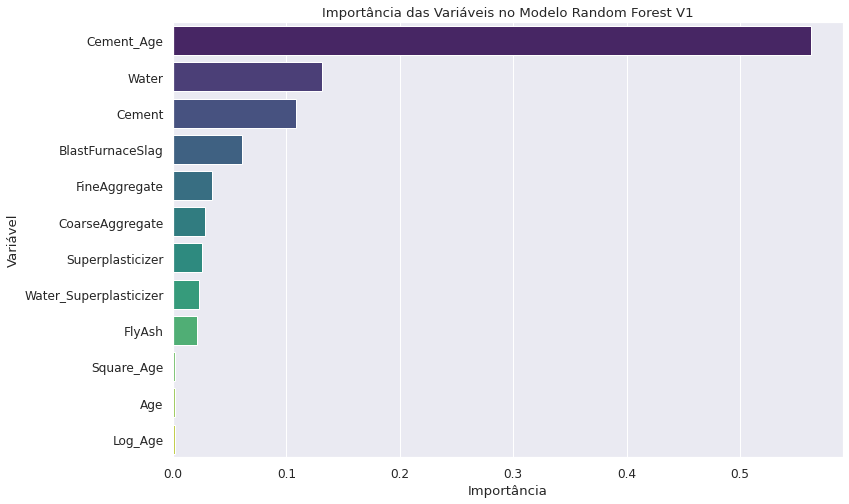




Previsões

[44.76514039 36.57058418 39.75739248 15.34450901 39.62975669 24.13502464
 41.00683134 39.51087231 63.55701463 27.65467552]


Plot das previsões vs valores reais


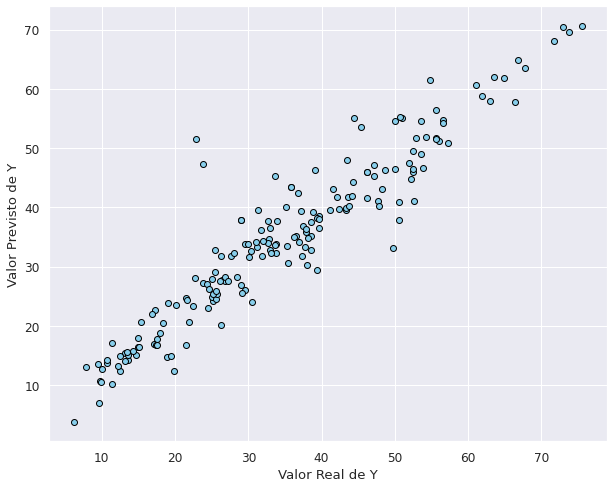




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 3.67212054509971
MSE - Erro Quadrático Médio: 26.81576414017529
RMSE - Raiz Quadrada do Erro Quadrático Médio: 5.178393973055284
O valor é 5.18 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8903369108201247
Variância Explicada: 0.8903369146204754



ANÁLISE DE RESÍDUOS



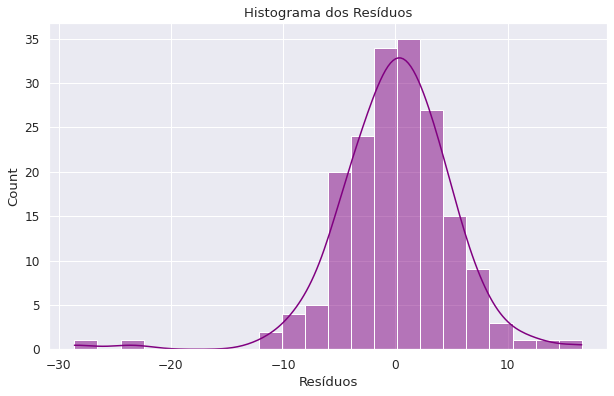

In [138]:
## Criando e Treinando o Modelo

# Criação do modelo Random Forest
modelo_RF_v1 = RandomForestRegressor(random_state=42)

# Treinamento do modelo
modelo_RF_v1.fit(X_treino, y_treino)


## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_rf_v1 = pd.DataFrame(modelo_RF_v1.feature_importances_, X.columns, columns=['Importância'])
df_importance_rf_v1 = df_importance_rf_v1.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_rf_v1.reset_index(inplace=True)
df_importance_rf_v1.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_rf_v1 = df_importance_rf_v1.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_rf_v1, palette='viridis')
plt.title('Importância das Variáveis no Modelo Random Forest V1')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_rf_v1 = modelo_RF_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_rf_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_rf_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_rf_v1 = mean_absolute_error(y_teste, pred_rf_v1)
print('MAE - Erro Médio Absoluto:', mae_rf_v1)

# MSE - Erro Quadrático Médio
mse_rf_v1 = mean_squared_error(y_teste, pred_rf_v1)
print('MSE - Erro Quadrático Médio:', mse_rf_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_rf_v1 = np.sqrt(mse_rf_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_rf_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_rf_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_rf_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_rf_v1 = std_value_rf_v1 / 2
rmse_as_percentage_of_mean_rf_v1 = (rmse_rf_v1 / mean_value_rf_v1) * 100
rmse_as_percentage_of_std_rf_v1 = (rmse_rf_v1 / std_value_rf_v1) * 100

if rmse_rf_v1 < half_std_value_rf_v1:
    print(f'O valor é {rmse_rf_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_rf_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_rf_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_rf_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_rf_v1 = r2_score(y_teste, pred_rf_v1)
print('Coeficiente R2:', r2_rf_v1)

# Variância Explicada
evs_rf_v1 = explained_variance_score(y_teste, pred_rf_v1)
print('Variância Explicada:', evs_rf_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_rf_v1 = y_teste - pred_rf_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_rf_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [139]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_rf_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RF V1'],
    'Nome do Algoritmo': ['Random Forest'],
    'MAE': [f"{mae_rf_v1:.2f}"],
    'MSE': [f"{mse_rf_v1:.2f}"],
    'RMSE': [rmse_rf_v1],
    'Coeficiente R2': [r2_rf_v1],
    'Variância Explicada': [evs_rf_v1]
})

df_modelos = pd.concat([df_modelos, modelo_rf_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0    Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1    Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2    Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3  Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4    Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   
5    Modelo RL V1   Regressão Lasso  5.92  54.25  7.365601        0.778136   
6    Modelo RL V2   Regressão Lasso  7.14  78.75  8.873966        0.677963   
7       Modelo EN        ElasticNet  7.04  74.86  8.652009        0.693871   
8       Modelo DT     Decision Tree  4.72  52.69  7.258983        0.784513   
9    Modelo RF V1     Random Forest  3.67  26.82  5.178394        0.890337   

   Variância Explicada  
0             0.810635  
1             0.684797  
2             0.684411  
3             0.811027  
4             0.684782  
5             0.778218  
6             0.678422  
7             0.693875  
8             0.786066  
9             0.890337

<br>

> # Versão 2

- Usando conjunto de dados com **variáveis selecionadas**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

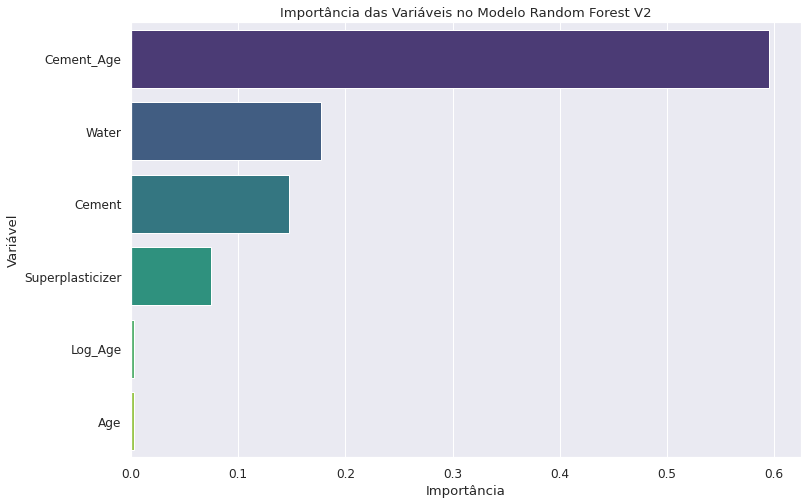




Previsões

[40.65148526 38.61495258 42.28748278 16.35110359 44.3184394  25.07283611
 43.24087542 36.76971371 60.12973286 31.35605848]


Plot das previsões vs valores reais


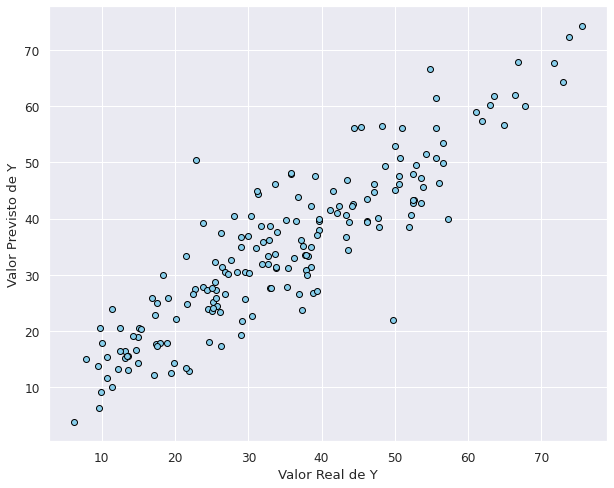




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 5.380726864081896
MSE - Erro Quadrático Médio: 48.951519333211984
RMSE - Raiz Quadrada do Erro Quadrático Médio: 6.996536238254754
O valor é 7.00 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.7998127220217515
Variância Explicada: 0.799875415483013



ANÁLISE DE RESÍDUOS



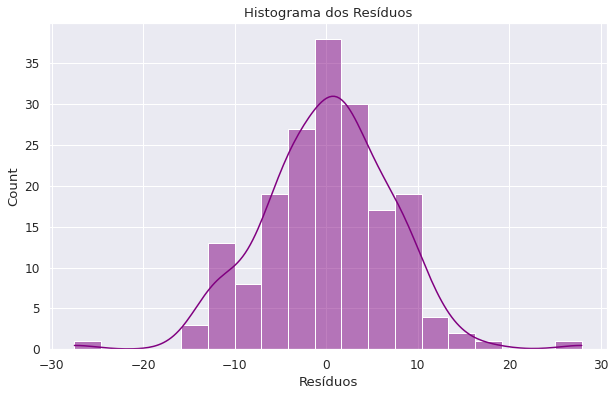

In [140]:
## Criando e Treinando o Modelo

# Criação do modelo Random Forest

modelo_RF_v2 = RandomForestRegressor(random_state=42)

# Treinamento do modelo
modelo_RF_v2.fit(X_selecionado_treino, y_selecionado_treino)


## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_rf_v2 = pd.DataFrame(modelo_RF_v2.feature_importances_, X_selecionado.columns, columns=['Importância'])
df_importance_rf_v2 = df_importance_rf_v2.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_rf_v2.reset_index(inplace=True)
df_importance_rf_v2.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_rf_v2 = df_importance_rf_v2.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_rf_v2, palette='viridis')
plt.title('Importância das Variáveis no Modelo Random Forest V2')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_rf_v2 = modelo_RF_v2.predict(X_selecionado_teste)

# Imprime as 10 primeiras previsões
print(pred_rf_v2[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_selecionado_teste, y=pred_rf_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_rf_v2 = mean_absolute_error(y_selecionado_teste, pred_rf_v2)
print('MAE - Erro Médio Absoluto:', mae_rf_v2)

# MSE - Erro Quadrático Médio
mse_rf_v2 = mean_squared_error(y_selecionado_teste, pred_rf_v2)
print('MSE - Erro Quadrático Médio:', mse_rf_v2)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_rf_v2 = np.sqrt(mse_rf_v2)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_rf_v2)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_rf_v2 = dados_selecionados['ConcreteCompressiveStrength'].mean()
std_value_rf_v2 = dados_selecionados['ConcreteCompressiveStrength'].std()
half_std_value_rf_v2 = std_value_rf_v2 / 2
rmse_as_percentage_of_mean_rf_v2 = (rmse_rf_v2 / mean_value_rf_v2) * 100
rmse_as_percentage_of_std_rf_v2 = (rmse_rf_v2 / std_value_rf_v2) * 100

if rmse_rf_v2 < half_std_value_rf_v2:
    print(f'O valor é {rmse_rf_v2:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_rf_v2:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_rf_v2:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_rf_v2:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_rf_v2 = r2_score(y_selecionado_teste, pred_rf_v2)
print('Coeficiente R2:', r2_rf_v2)

# Variância Explicada
evs_rf_v2 = explained_variance_score(y_selecionado_teste, pred_rf_v2)
print('Variância Explicada:', evs_rf_v2)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_rf_v2 = y_selecionado_teste - pred_rf_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_rf_v2, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [141]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_rf_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RF V2'],
    'Nome do Algoritmo': ['Random Forest'],
    'MAE': [f"{mae_rf_v2:.2f}"],
    'MSE': [f"{mse_rf_v2:.2f}"],
    'RMSE': [rmse_rf_v2],
    'Coeficiente R2': [r2_rf_v2],
    'Variância Explicada': [evs_rf_v2]
})

df_modelos = pd.concat([df_modelos, modelo_rf_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo Nome do Algoritmo   MAE    MSE      RMSE  Coeficiente R2  \
0     Modelo RL V1  Regressão Linear  5.36  46.39  6.811291        0.810273   
1     Modelo RL V2  Regressão Linear  7.13  77.16  8.784154        0.684449   
2     Modelo RL V3  Regressão Linear  7.14  77.25  8.789305        0.684078   
3   Modelo 2 RR V1   Regressão Ridge  5.35  46.29  6.804000        0.810679   
4     Modelo RR V2   Regressão Ridge  7.13  77.16  8.784314        0.684437   
5     Modelo RL V1   Regressão Lasso  5.92  54.25  7.365601        0.778136   
6     Modelo RL V2   Regressão Lasso  7.14  78.75  8.873966        0.677963   
7        Modelo EN        ElasticNet  7.04  74.86  8.652009        0.693871   
8        Modelo DT     Decision Tree  4.72  52.69  7.258983        0.784513   
9     Modelo RF V1     Random Forest  3.67  26.82  5.178394        0.890337   
10    Modelo RF V2     Random Forest  5.38  48.95  6.996536        0.799813   

    Variância Explicada  
0              0.810635  
1              0.684797  
2              0.684411  
3              0.811027  
4              0.684782  
5              0.778218  
6              0.678422  
7              0.693875  
8              0.786066  
9              0.890337  
10             0.799875

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 7 com SVR (Support Vector Regressor)</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo


Como o SVR não possui coeficientes de variáveis, vamos apenas visualizar as predições




Previsões

[37.93428048 40.04133543 42.7203356  13.59869422 41.88177623 26.88735667
 38.86927908 40.40954679 48.60553461 30.99324631]


Plot das previsões vs valores reais


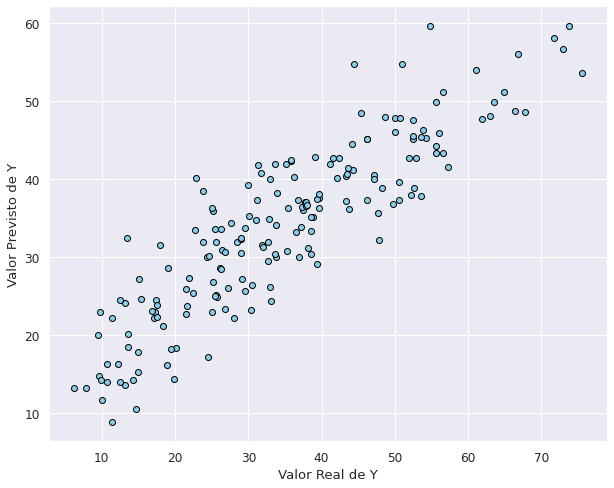




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 6.222492883366263
MSE - Erro Quadrático Médio: 60.49117132913311
RMSE - Raiz Quadrada do Erro Quadrático Médio: 7.777607043887799
O valor é 7.78 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.7526213058339317
Variância Explicada: 0.7554941295410904



ANÁLISE DE RESÍDUOS



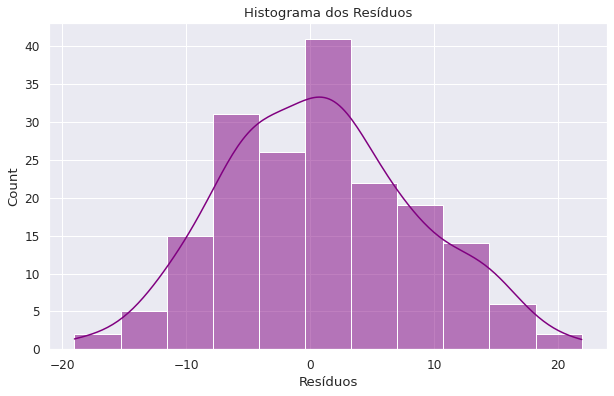

In [142]:
## Criando e Treinando o Modelo

# Criação do modelo SVR
modelo_SVR_v1 = SVR()

# Treinamento do modelo
modelo_SVR_v1.fit(X_treino, y_treino)


## Visualizando as predições das variáveis preditoras

print('\nComo o SVR não possui coeficientes de variáveis, vamos apenas visualizar as predições\n')
print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_svr_v1 = modelo_SVR_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_svr_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_svr_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_svr_v1 = mean_absolute_error(y_teste, pred_svr_v1)
print('MAE - Erro Médio Absoluto:', mae_svr_v1)

# MSE - Erro Quadrático Médio
mse_svr_v1 = mean_squared_error(y_teste, pred_svr_v1)
print('MSE - Erro Quadrático Médio:', mse_svr_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_svr_v1 = np.sqrt(mse_svr_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_svr_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_svr_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_svr_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_svr_v1 = std_value_svr_v1 / 2
rmse_as_percentage_of_mean_svr_v1 = (rmse_svr_v1 / mean_value_svr_v1) * 100
rmse_as_percentage_of_std_svr_v1 = (rmse_svr_v1 / std_value_svr_v1) * 100

if rmse_svr_v1 < half_std_value_svr_v1:
    print(f'O valor é {rmse_svr_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_svr_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_svr_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_svr_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_svr_v1 = r2_score(y_teste, pred_svr_v1)
print('Coeficiente R2:', r2_svr_v1)

# Variância Explicada
evs_svr_v1 = explained_variance_score(y_teste, pred_svr_v1)
print('Variância Explicada:', evs_svr_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_svr_v1 = y_teste - pred_svr_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_svr_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [143]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_svr_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo SVR'],
    'Nome do Algoritmo': ['Support Vector Regressor'],
    'MAE': [f"{mae_svr_v1:.2f}"],
    'MSE': [f"{mse_svr_v1:.2f}"],
    'RMSE': [rmse_svr_v1],
    'Coeficiente R2': [r2_svr_v1],
    'Variância Explicada': [evs_svr_v1]
})

df_modelos = pd.concat([df_modelos, modelo_svr_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo         Nome do Algoritmo   MAE    MSE      RMSE  \
0     Modelo RL V1          Regressão Linear  5.36  46.39  6.811291   
1     Modelo RL V2          Regressão Linear  7.13  77.16  8.784154   
2     Modelo RL V3          Regressão Linear  7.14  77.25  8.789305   
3   Modelo 2 RR V1           Regressão Ridge  5.35  46.29  6.804000   
4     Modelo RR V2           Regressão Ridge  7.13  77.16  8.784314   
5     Modelo RL V1           Regressão Lasso  5.92  54.25  7.365601   
6     Modelo RL V2           Regressão Lasso  7.14  78.75  8.873966   
7        Modelo EN                ElasticNet  7.04  74.86  8.652009   
8        Modelo DT             Decision Tree  4.72  52.69  7.258983   
9     Modelo RF V1             Random Forest  3.67  26.82  5.178394   
10    Modelo RF V2             Random Forest  5.38  48.95  6.996536   
11      Modelo SVR  Support Vector Regressor  6.22  60.49  7.777607   

    Coeficiente R2  Variância Explicada  
0         0.810273             0.810635  
1         0.684449             0.684797  
2         0.684078             0.684411  
3         0.810679             0.811027  
4         0.684437             0.684782  
5         0.778136             0.778218  
6         0.677963             0.678422  
7         0.693871             0.693875  
8         0.784513             0.786066  
9         0.890337             0.890337  
10        0.799813             0.799875  
11        0.752621             0.755494

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 8 com K-Nearest Neighbors Regressor (KNN)</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo


KNN não fornece diretamente a importância das variáveis




Previsões

[39.05467854 37.45399106 43.17774502 17.79399661 42.4546226  24.26596992
 45.20480446 40.68515139 53.1958313  27.26050209]


Plot das previsões vs valores reais


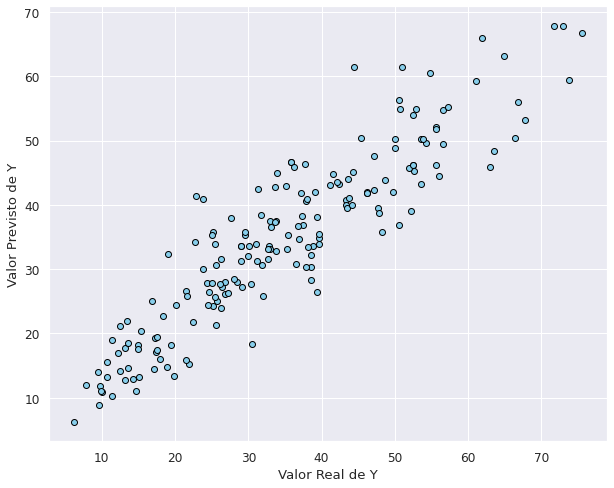




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 4.943716446242138
MSE - Erro Quadrático Médio: 41.471995467028016
RMSE - Raiz Quadrada do Erro Quadrático Médio: 6.439875423253778
O valor é 6.44 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8304002409331174
Variância Explicada: 0.8304278937137657



ANÁLISE DE RESÍDUOS



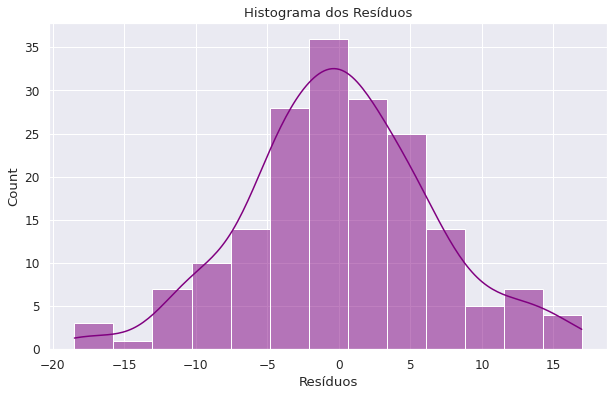

In [144]:
## Criando e Treinando o Modelo

# Criação do modelo KNN
modelo_KNN_v1 = KNeighborsRegressor(n_neighbors=5)

# Treinamento do modelo
modelo_KNN_v1.fit(X_treino, y_treino)


## Visualizando a importância das variáveis preditoras

print('\nKNN não fornece diretamente a importância das variáveis\n')

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_knn_v1 = modelo_KNN_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_knn_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_knn_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_knn_v1 = mean_absolute_error(y_teste, pred_knn_v1)
print('MAE - Erro Médio Absoluto:', mae_knn_v1)

# MSE - Erro Quadrático Médio
mse_knn_v1 = mean_squared_error(y_teste, pred_knn_v1)
print('MSE - Erro Quadrático Médio:', mse_knn_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_knn_v1 = np.sqrt(mse_knn_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_knn_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_knn_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_knn_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_knn_v1 = std_value_knn_v1 / 2
rmse_as_percentage_of_mean_knn_v1 = (rmse_knn_v1 / mean_value_knn_v1) * 100
rmse_as_percentage_of_std_knn_v1 = (rmse_knn_v1 / std_value_knn_v1) * 100

if rmse_knn_v1 < half_std_value_knn_v1:
    print(f'O valor é {rmse_knn_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_knn_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_knn_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_knn_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_knn_v1 = r2_score(y_teste, pred_knn_v1)
print('Coeficiente R2:', r2_knn_v1)

# Variância Explicada
evs_knn_v1 = explained_variance_score(y_teste, pred_knn_v1)
print('Variância Explicada:', evs_knn_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_knn_v1 = y_teste - pred_knn_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_knn_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [145]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_knn_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo KNN'],
    'Nome do Algoritmo': ['K-Nearest Neighbors Regressor'],
    'MAE': [f"{mae_knn_v1:.2f}"],
    'MSE': [f"{mse_knn_v1:.2f}"],
    'RMSE': [rmse_knn_v1],
    'Coeficiente R2': [r2_knn_v1],
    'Variância Explicada': [evs_knn_v1]
})

df_modelos = pd.concat([df_modelos, modelo_knn_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE      RMSE  \
0     Modelo RL V1               Regressão Linear  5.36  46.39  6.811291   
1     Modelo RL V2               Regressão Linear  7.13  77.16  8.784154   
2     Modelo RL V3               Regressão Linear  7.14  77.25  8.789305   
3   Modelo 2 RR V1                Regressão Ridge  5.35  46.29  6.804000   
4     Modelo RR V2                Regressão Ridge  7.13  77.16  8.784314   
5     Modelo RL V1                Regressão Lasso  5.92  54.25  7.365601   
6     Modelo RL V2                Regressão Lasso  7.14  78.75  8.873966   
7        Modelo EN                     ElasticNet  7.04  74.86  8.652009   
8        Modelo DT                  Decision Tree  4.72  52.69  7.258983   
9     Modelo RF V1                  Random Forest  3.67  26.82  5.178394   
10    Modelo RF V2                  Random Forest  5.38  48.95  6.996536   
11      Modelo SVR       Support Vector Regressor  6.22  60.49  7.777607   
12      Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47  6.439875   

    Coeficiente R2  Variância Explicada  
0         0.810273             0.810635  
1         0.684449             0.684797  
2         0.684078             0.684411  
3         0.810679             0.811027  
4         0.684437             0.684782  
5         0.778136             0.778218  
6         0.677963             0.678422  
7         0.693871             0.693875  
8         0.784513             0.786066  
9         0.890337             0.890337  
10        0.799813             0.799875  
11        0.752621             0.755494  
12        0.830400             0.830428

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 9 com Gradient Boosting Regressor</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

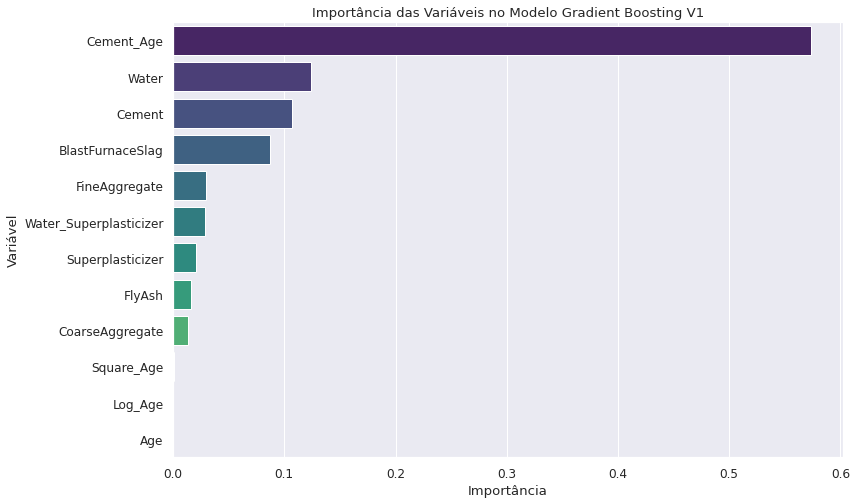




Previsões

[43.28330428 37.39385288 38.21316293 15.47599828 40.80141804 25.43165538
 43.53015272 41.91302177 62.13873696 27.99531447]


Plot das previsões vs valores reais


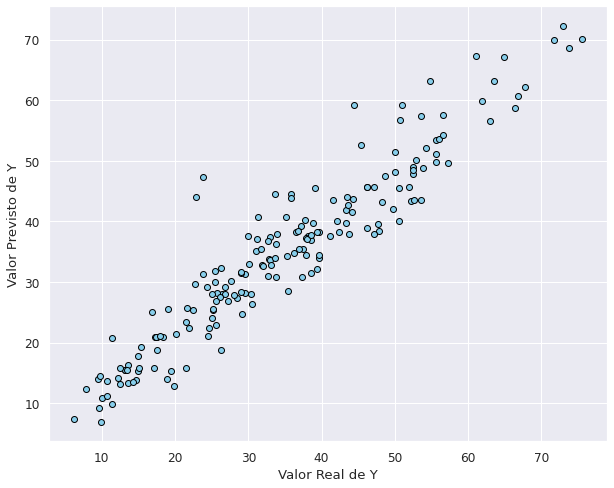




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 3.8126624975270698
MSE - Erro Quadrático Médio: 25.91235492019083
RMSE - Raiz Quadrada do Erro Quadrático Médio: 5.090417951425092
O valor é 5.09 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8940314035572774
Variância Explicada: 0.8941023319993202



ANÁLISE DE RESÍDUOS



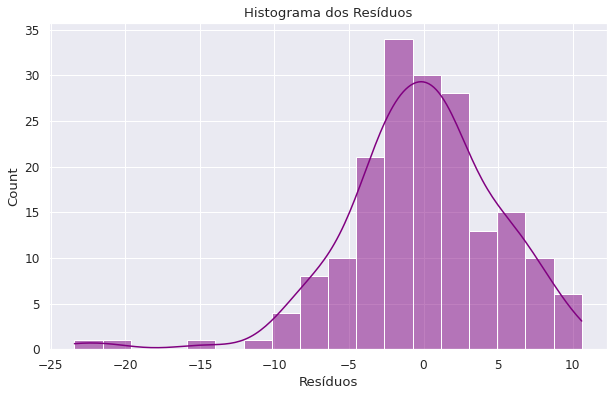

In [146]:
## Criando e Treinando o Modelo

# Criação do modelo Gradient Boosting
modelo_GB_v1 = GradientBoostingRegressor(random_state=42)

# Treinamento do modelo
modelo_GB_v1.fit(X_treino, y_treino)


## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_gb_v1 = pd.DataFrame(modelo_GB_v1.feature_importances_, X.columns, columns=['Importância'])
df_importance_gb_v1 = df_importance_gb_v1.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_gb_v1.reset_index(inplace=True)
df_importance_gb_v1.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_gb_v1 = df_importance_gb_v1.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_gb_v1, palette='viridis')
plt.title('Importância das Variáveis no Modelo Gradient Boosting V1')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_gb_v1 = modelo_GB_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_gb_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_gb_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_gb_v1 = mean_absolute_error(y_teste, pred_gb_v1)
print('MAE - Erro Médio Absoluto:', mae_gb_v1)

# MSE - Erro Quadrático Médio
mse_gb_v1 = mean_squared_error(y_teste, pred_gb_v1)
print('MSE - Erro Quadrático Médio:', mse_gb_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_gb_v1 = np.sqrt(mse_gb_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_gb_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_gb_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_gb_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_gb_v1 = std_value_gb_v1 / 2
rmse_as_percentage_of_mean_gb_v1 = (rmse_gb_v1 / mean_value_gb_v1) * 100
rmse_as_percentage_of_std_gb_v1 = (rmse_gb_v1 / std_value_gb_v1) * 100

if rmse_gb_v1 < half_std_value_gb_v1:
    print(f'O valor é {rmse_gb_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_gb_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_gb_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_gb_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_gb_v1 = r2_score(y_teste, pred_gb_v1)
print('Coeficiente R2:', r2_gb_v1)

# Variância Explicada
evs_gb_v1 = explained_variance_score(y_teste, pred_gb_v1)
print('Variância Explicada:', evs_gb_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_gb_v1 = y_teste - pred_gb_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_gb_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [147]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_gb_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo GB V1'],
    'Nome do Algoritmo': ['Gradient Boosting Regressor'],
    'MAE': [f"{mae_gb_v1:.2f}"],
    'MSE': [f"{mse_gb_v1:.2f}"],
    'RMSE': [rmse_gb_v1],
    'Coeficiente R2': [r2_gb_v1],
    'Variância Explicada': [evs_gb_v1]
})

df_modelos = pd.concat([df_modelos, modelo_gb_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE      RMSE  \
0     Modelo RL V1               Regressão Linear  5.36  46.39  6.811291   
1     Modelo RL V2               Regressão Linear  7.13  77.16  8.784154   
2     Modelo RL V3               Regressão Linear  7.14  77.25  8.789305   
3   Modelo 2 RR V1                Regressão Ridge  5.35  46.29  6.804000   
4     Modelo RR V2                Regressão Ridge  7.13  77.16  8.784314   
5     Modelo RL V1                Regressão Lasso  5.92  54.25  7.365601   
6     Modelo RL V2                Regressão Lasso  7.14  78.75  8.873966   
7        Modelo EN                     ElasticNet  7.04  74.86  8.652009   
8        Modelo DT                  Decision Tree  4.72  52.69  7.258983   
9     Modelo RF V1                  Random Forest  3.67  26.82  5.178394   
10    Modelo RF V2                  Random Forest  5.38  48.95  6.996536   
11      Modelo SVR       Support Vector Regressor  6.22  60.49  7.777607   
12      Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47  6.439875   
13    Modelo GB V1    Gradient Boosting Regressor  3.81  25.91  5.090418   

    Coeficiente R2  Variância Explicada  
0         0.810273             0.810635  
1         0.684449             0.684797  
2         0.684078             0.684411  
3         0.810679             0.811027  
4         0.684437             0.684782  
5         0.778136             0.778218  
6         0.677963             0.678422  
7         0.693871             0.693875  
8         0.784513             0.786066  
9         0.890337             0.890337  
10        0.799813             0.799875  
11        0.752621             0.755494  
12        0.830400             0.830428  
13        0.894031             0.894102

<br>

> # Versão 2

- Usando conjunto de dados com **as 4 variáveis com maior valor de importância**.

<br>

### Editando Dados de Treino e Teste

In [148]:
## Selecionando as variáveis mais importantes
variaveis_importantes = df_importance_gb_v1['Variável'][:4].tolist()

# Criando um novo conjunto de dados com as variáveis selecionadas
X_importantes = X[variaveis_importantes]

# Dividindo o novo conjunto de dados em treino e teste
X_importantes_treino, X_importantes_teste, y_importantes_treino, y_importantes_teste = train_test_split(
    X_importantes, 
    y, 
    test_size=0.2, 
    random_state=1234
)

print(X_importantes_treino.shape, X_importantes_teste.shape, y_importantes_treino.shape, y_importantes_teste.shape)

(732, 4) (183, 4) (732,) (183,)


### Criação, Treinamento, Previsão e Avaliação do Modelo

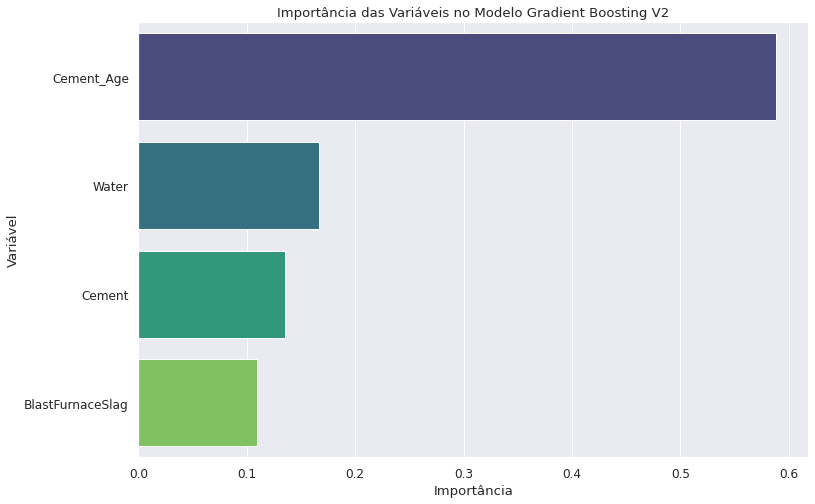




Previsões

[43.13217606 38.68159843 40.68432218 14.0533062  40.04036364 31.04682455
 43.46480655 44.65080048 61.5770836  28.44268897]


Plot das previsões vs valores reais


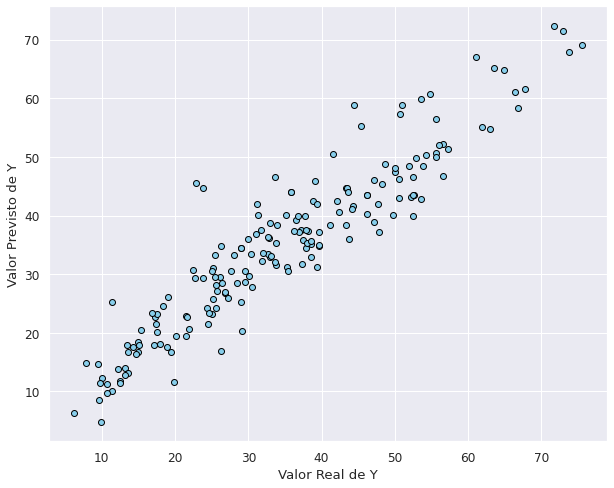




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 4.271959819095345
MSE - Erro Quadrático Médio: 31.36397318885613
RMSE - Raiz Quadrada do Erro Quadrático Médio: 5.600354737769397
O valor é 5.60 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8717370062301619
Variância Explicada: 0.872036228864455



ANÁLISE DE RESÍDUOS



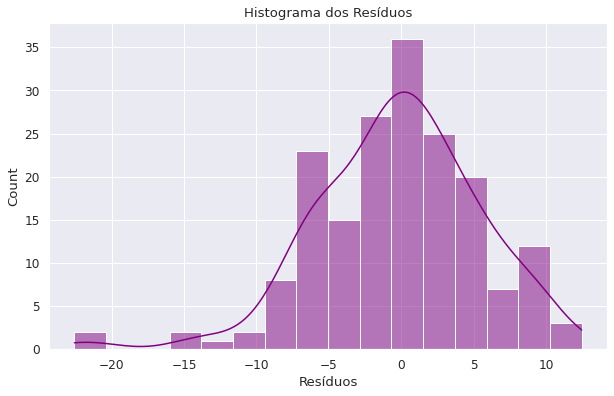

In [149]:
## Criando e Treinando o Modelo

# Criação do modelo Gradient Boosting
modelo_GB_v2 = GradientBoostingRegressor(random_state=42)

# Treinamento do modelo
modelo_GB_v2.fit(X_importantes_treino, y_importantes_treino)

## Visualizando a importância das variáveis preditoras
# Importância das variáveis preditoras
df_importance_gb_v2 = pd.DataFrame(modelo_GB_v2.feature_importances_, X_importantes.columns, columns=['Importância'])
df_importance_gb_v2 = df_importance_gb_v2.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_gb_v2.reset_index(inplace=True)
df_importance_gb_v2.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_gb_v2 = df_importance_gb_v2.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_gb_v2, palette='viridis')
plt.title('Importância das Variáveis no Modelo Gradient Boosting V2')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')

## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_gb_v2 = modelo_GB_v2.predict(X_importantes_teste)

# Imprime as 10 primeiras previsões
print(pred_gb_v2[:10])

# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_importantes_teste, y=pred_gb_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')

## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_gb_v2 = mean_absolute_error(y_importantes_teste, pred_gb_v2)
print('MAE - Erro Médio Absoluto:', mae_gb_v2)

# MSE - Erro Quadrático Médio
mse_gb_v2 = mean_squared_error(y_importantes_teste, pred_gb_v2)
print('MSE - Erro Quadrático Médio:', mse_gb_v2)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_gb_v2 = np.sqrt(mse_gb_v2)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_gb_v2)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_gb_v2 = dados['ConcreteCompressiveStrength'].mean()
std_value_gb_v2 = dados['ConcreteCompressiveStrength'].std()
half_std_value_gb_v2 = std_value_gb_v2 / 2
rmse_as_percentage_of_mean_gb_v2 = (rmse_gb_v2 / mean_value_gb_v2) * 100
rmse_as_percentage_of_std_gb_v2 = (rmse_gb_v2 / std_value_gb_v2) * 100

if rmse_gb_v2 < half_std_value_gb_v2:
    print(f'O valor é {rmse_gb_v2:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_gb_v2:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_gb_v2:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_gb_v2:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_gb_v2 = r2_score(y_importantes_teste, pred_gb_v2)
print('Coeficiente R2:', r2_gb_v2)

# Variância Explicada
evs_gb_v2 = explained_variance_score(y_importantes_teste, pred_gb_v2)
print('Variância Explicada:', evs_gb_v2)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_gb_v2 = y_importantes_teste - pred_gb_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_gb_v2, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [150]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_gb_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo GB V2'],
    'Nome do Algoritmo': ['Gradient Boosting Regressor'],
    'MAE': [f"{mae_gb_v2:.2f}"],
    'MSE': [f"{mse_gb_v2:.2f}"],
    'RMSE': [rmse_gb_v2],
    'Coeficiente R2': [r2_gb_v2],
    'Variância Explicada': [evs_gb_v2]
})

df_modelos = pd.concat([df_modelos, modelo_gb_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE      RMSE  \
0     Modelo RL V1               Regressão Linear  5.36  46.39  6.811291   
1     Modelo RL V2               Regressão Linear  7.13  77.16  8.784154   
2     Modelo RL V3               Regressão Linear  7.14  77.25  8.789305   
3   Modelo 2 RR V1                Regressão Ridge  5.35  46.29  6.804000   
4     Modelo RR V2                Regressão Ridge  7.13  77.16  8.784314   
5     Modelo RL V1                Regressão Lasso  5.92  54.25  7.365601   
6     Modelo RL V2                Regressão Lasso  7.14  78.75  8.873966   
7        Modelo EN                     ElasticNet  7.04  74.86  8.652009   
8        Modelo DT                  Decision Tree  4.72  52.69  7.258983   
9     Modelo RF V1                  Random Forest  3.67  26.82  5.178394   
10    Modelo RF V2                  Random Forest  5.38  48.95  6.996536   
11      Modelo SVR       Support Vector Regressor  6.22  60.49  7.777607   
12      Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47  6.439875   
13    Modelo GB V1    Gradient Boosting Regressor  3.81  25.91  5.090418   
14    Modelo GB V2    Gradient Boosting Regressor  4.27  31.36  5.600355   

    Coeficiente R2  Variância Explicada  
0         0.810273             0.810635  
1         0.684449             0.684797  
2         0.684078             0.684411  
3         0.810679             0.811027  
4         0.684437             0.684782  
5         0.778136             0.778218  
6         0.677963             0.678422  
7         0.693871             0.693875  
8         0.784513             0.786066  
9         0.890337             0.890337  
10        0.799813             0.799875  
11        0.752621             0.755494  
12        0.830400             0.830428  
13        0.894031             0.894102  
14        0.871737             0.872036

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 10 com XGBoost Regressor</span>

<br>

> # Versão 1

- Usando conjunto de dados com **todas as variáveis**.

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

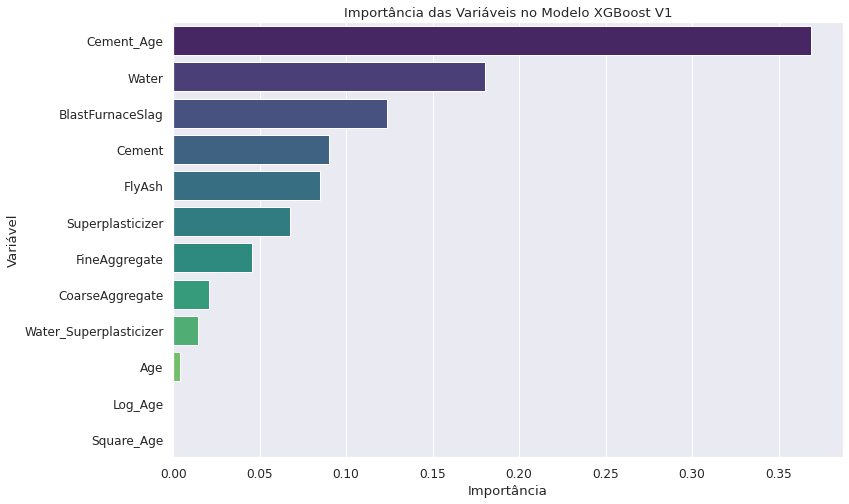




Previsões

[48.129364 36.943325 43.04358  14.759219 38.907806 24.464996 43.090576
 41.982258 62.918564 29.731625]


Plot das previsões vs valores reais


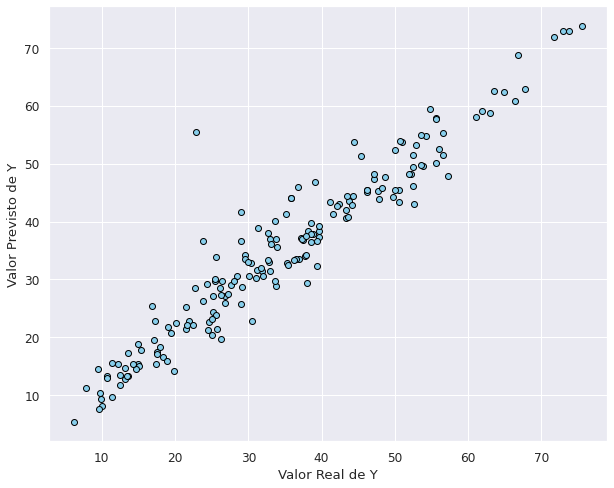




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 3.041657695861797
MSE - Erro Quadrático Médio: 20.567022094242024
RMSE - Raiz Quadrada do Erro Quadrático Médio: 4.535087881644856
O valor é 4.54 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.9158911464802812
Variância Explicada: 0.9162299587182587



ANÁLISE DE RESÍDUOS



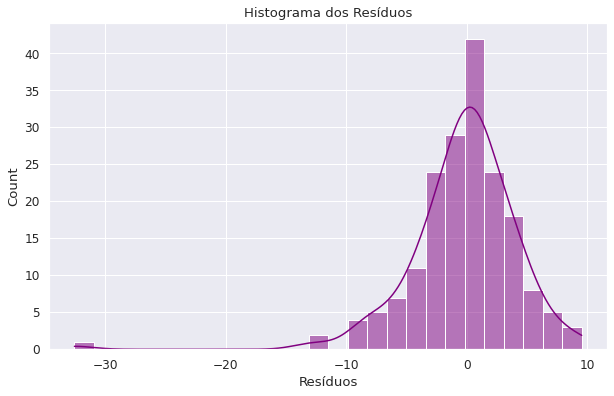

In [151]:
## Criando e Treinando o Modelo

# Criação do modelo XGBoost
modelo_XGB_v1 = XGBRegressor(random_state=42)

# Treinamento do modelo
modelo_XGB_v1.fit(X_treino, y_treino)


## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_xgb_v1 = pd.DataFrame(modelo_XGB_v1.feature_importances_, X.columns, columns=['Importância'])
df_importance_xgb_v1 = df_importance_xgb_v1.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_xgb_v1.reset_index(inplace=True)
df_importance_xgb_v1.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_xgb_v1 = df_importance_xgb_v1.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_xgb_v1, palette='viridis')
plt.title('Importância das Variáveis no Modelo XGBoost V1')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')


## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_xgb_v1 = modelo_XGB_v1.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_xgb_v1[:10])


# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_xgb_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')


## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_xgb_v1 = mean_absolute_error(y_teste, pred_xgb_v1)
print('MAE - Erro Médio Absoluto:', mae_xgb_v1)

# MSE - Erro Quadrático Médio
mse_xgb_v1 = mean_squared_error(y_teste, pred_xgb_v1)
print('MSE - Erro Quadrático Médio:', mse_xgb_v1)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_xgb_v1 = np.sqrt(mse_xgb_v1)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_xgb_v1)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_xgb_v1 = dados['ConcreteCompressiveStrength'].mean()
std_value_xgb_v1 = dados['ConcreteCompressiveStrength'].std()
half_std_value_xgb_v1 = std_value_xgb_v1 / 2
rmse_as_percentage_of_mean_xgb_v1 = (rmse_xgb_v1 / mean_value_xgb_v1) * 100
rmse_as_percentage_of_std_xgb_v1 = (rmse_xgb_v1 / std_value_xgb_v1) * 100

if rmse_xgb_v1 < half_std_value_xgb_v1:
    print(f'O valor é {rmse_xgb_v1:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_xgb_v1:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_xgb_v1:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_xgb_v1:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_xgb_v1 = r2_score(y_teste, pred_xgb_v1)
print('Coeficiente R2:', r2_xgb_v1)

# Variância Explicada
evs_xgb_v1 = explained_variance_score(y_teste, pred_xgb_v1)
print('Variância Explicada:', evs_xgb_v1)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_xgb_v1 = y_teste - pred_xgb_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_xgb_v1, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [152]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_xgb_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo XGB V1'],
    'Nome do Algoritmo': ['XGBoost Regressor'],
    'MAE': [f"{mae_xgb_v1:.2f}"],
    'MSE': [f"{mse_xgb_v1:.2f}"],
    'RMSE': [rmse_xgb_v1],
    'Coeficiente R2': [r2_xgb_v1],
    'Variância Explicada': [evs_xgb_v1]
})

df_modelos = pd.concat([df_modelos, modelo_xgb_v1], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE      RMSE  \
0     Modelo RL V1               Regressão Linear  5.36  46.39  6.811291   
1     Modelo RL V2               Regressão Linear  7.13  77.16  8.784154   
2     Modelo RL V3               Regressão Linear  7.14  77.25  8.789305   
3   Modelo 2 RR V1                Regressão Ridge  5.35  46.29  6.804000   
4     Modelo RR V2                Regressão Ridge  7.13  77.16  8.784314   
5     Modelo RL V1                Regressão Lasso  5.92  54.25  7.365601   
6     Modelo RL V2                Regressão Lasso  7.14  78.75  8.873966   
7        Modelo EN                     ElasticNet  7.04  74.86  8.652009   
8        Modelo DT                  Decision Tree  4.72  52.69  7.258983   
9     Modelo RF V1                  Random Forest  3.67  26.82  5.178394   
10    Modelo RF V2                  Random Forest  5.38  48.95  6.996536   
11      Modelo SVR       Support Vector Regressor  6.22  60.49  7.777607   
12      Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47  6.439875   
13    Modelo GB V1    Gradient Boosting Regressor  3.81  25.91  5.090418   
14    Modelo GB V2    Gradient Boosting Regressor  4.27  31.36  5.600355   
15   Modelo XGB V1              XGBoost Regressor  3.04  20.57  4.535088   

    Coeficiente R2  Variância Explicada  
0         0.810273             0.810635  
1         0.684449             0.684797  
2         0.684078             0.684411  
3         0.810679             0.811027  
4         0.684437             0.684782  
5         0.778136             0.778218  
6         0.677963             0.678422  
7         0.693871             0.693875  
8         0.784513             0.786066  
9         0.890337             0.890337  
10        0.799813             0.799875  
11        0.752621             0.755494  
12        0.830400             0.830428  
13        0.894031             0.894102  
14        0.871737             0.872036  
15        0.915891             0.916230

<br>

> # Versão 2

- Usando conjunto de dados com **as 7 variáveis com maior valor de importância**.

<br>

### Editando Dados de Treino e Teste

In [153]:
## Selecionando as variáveis mais importantes
variaveis_importantes_xgb = df_importance_xgb_v1['Variável'][:7].tolist()

# Criando um novo conjunto de dados com as variáveis selecionadas
X_importantes_xgb = X[variaveis_importantes_xgb]

# Dividindo o novo conjunto de dados em treino e teste
X_importantes_xgb_treino, X_importantes_xgb_teste, y_importantes_xgb_treino, y_importantes_xgb_teste = train_test_split(
    X_importantes_xgb, 
    y, 
    test_size=0.2, 
    random_state=1234
)

print(X_importantes_xgb_treino.shape, X_importantes_xgb_teste.shape, y_importantes_xgb_treino.shape, y_importantes_xgb_teste.shape)

(732, 7) (183, 7) (732,) (183,)


### Criação, Treinamento, Previsão e Avaliação do Modelo

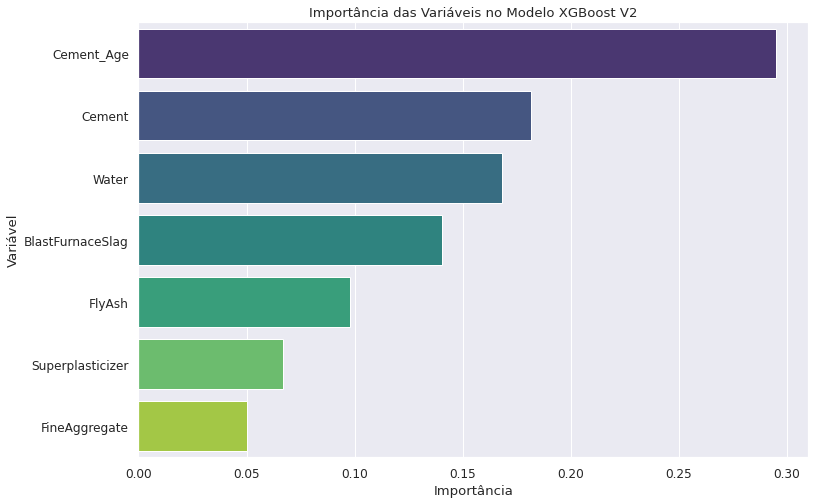




Previsões

[47.58708  35.537933 44.243927 13.878575 37.271244 25.055183 39.644432
 40.21145  70.35398  28.734211]


Plot das previsões vs valores reais


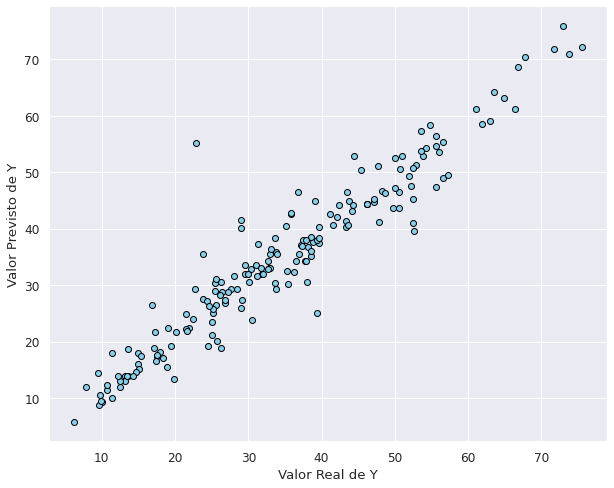




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 3.027696356058529
MSE - Erro Quadrático Médio: 21.688137872988513
RMSE - Raiz Quadrada do Erro Quadrático Médio: 4.6570524876780715
O valor é 4.66 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.9113063425946651
Variância Explicada: 0.9114291992967456



ANÁLISE DE RESÍDUOS



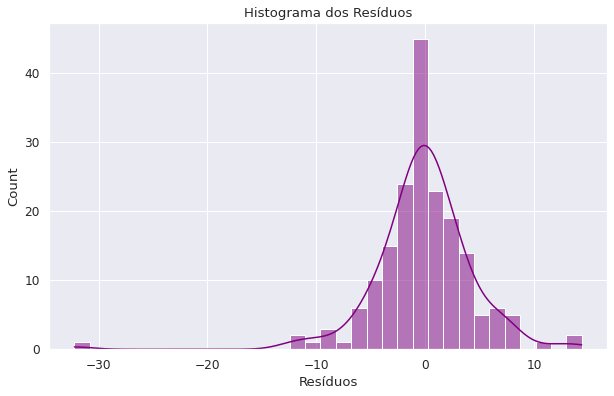

In [154]:
## Criando e Treinando o Modelo

# Criação do modelo XGBoost
modelo_XGB_v2 = XGBRegressor(random_state=42)

# Treinamento do modelo
modelo_XGB_v2.fit(X_importantes_xgb_treino, y_importantes_xgb_treino)

## Visualizando a importância das variáveis preditoras
# Importância das variáveis preditoras
df_importance_xgb_v2 = pd.DataFrame(modelo_XGB_v2.feature_importances_, X_importantes_xgb.columns, columns=['Importância'])
df_importance_xgb_v2 = df_importance_xgb_v2.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_xgb_v2.reset_index(inplace=True)
df_importance_xgb_v2.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_xgb_v2 = df_importance_xgb_v2.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_xgb_v2, palette='viridis')
plt.title('Importância das Variáveis no Modelo XGBoost V2')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')

## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_xgb_v2 = modelo_XGB_v2.predict(X_importantes_xgb_teste)

# Imprime as 10 primeiras previsões
print(pred_xgb_v2[:10])

# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_importantes_xgb_teste, y=pred_xgb_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')

## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_xgb_v2 = mean_absolute_error(y_importantes_xgb_teste, pred_xgb_v2)
print('MAE - Erro Médio Absoluto:', mae_xgb_v2)

# MSE - Erro Quadrático Médio
mse_xgb_v2 = mean_squared_error(y_importantes_xgb_teste, pred_xgb_v2)
print('MSE - Erro Quadrático Médio:', mse_xgb_v2)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_xgb_v2 = np.sqrt(mse_xgb_v2)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_xgb_v2)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_xgb_v2 = dados['ConcreteCompressiveStrength'].mean()
std_value_xgb_v2 = dados['ConcreteCompressiveStrength'].std()
half_std_value_xgb_v2 = std_value_xgb_v2 / 2
rmse_as_percentage_of_mean_xgb_v2 = (rmse_xgb_v2 / mean_value_xgb_v2) * 100
rmse_as_percentage_of_std_xgb_v2 = (rmse_xgb_v2 / std_value_xgb_v2) * 100

if rmse_xgb_v2 < half_std_value_xgb_v2:
    print(f'O valor é {rmse_xgb_v2:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_xgb_v2:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_xgb_v2:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_xgb_v2:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_xgb_v2 = r2_score(y_importantes_xgb_teste, pred_xgb_v2)
print('Coeficiente R2:', r2_xgb_v2)

# Variância Explicada
evs_xgb_v2 = explained_variance_score(y_importantes_xgb_teste, pred_xgb_v2)
print('Variância Explicada:', evs_xgb_v2)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')

# Plot dos resíduos
residuos_xgb_v2 = y_importantes_xgb_teste - pred_xgb_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_xgb_v2, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [155]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_xgb_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo XGB V2'],
    'Nome do Algoritmo': ['XGBoost Regressor'],
    'MAE': [f"{mae_xgb_v2:.2f}"],
    'MSE': [f"{mse_xgb_v2:.2f}"],
    'RMSE': [rmse_xgb_v2],
    'Coeficiente R2': [r2_xgb_v2],
    'Variância Explicada': [evs_xgb_v2]
})

df_modelos = pd.concat([df_modelos, modelo_xgb_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE      RMSE  \
0     Modelo RL V1               Regressão Linear  5.36  46.39  6.811291   
1     Modelo RL V2               Regressão Linear  7.13  77.16  8.784154   
2     Modelo RL V3               Regressão Linear  7.14  77.25  8.789305   
3   Modelo 2 RR V1                Regressão Ridge  5.35  46.29  6.804000   
4     Modelo RR V2                Regressão Ridge  7.13  77.16  8.784314   
5     Modelo RL V1                Regressão Lasso  5.92  54.25  7.365601   
6     Modelo RL V2                Regressão Lasso  7.14  78.75  8.873966   
7        Modelo EN                     ElasticNet  7.04  74.86  8.652009   
8        Modelo DT                  Decision Tree  4.72  52.69  7.258983   
9     Modelo RF V1                  Random Forest  3.67  26.82  5.178394   
10    Modelo RF V2                  Random Forest  5.38  48.95  6.996536   
11      Modelo SVR       Support Vector Regressor  6.22  60.49  7.777607   
12      Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47  6.439875   
13    Modelo GB V1    Gradient Boosting Regressor  3.81  25.91  5.090418   
14    Modelo GB V2    Gradient Boosting Regressor  4.27  31.36  5.600355   
15   Modelo XGB V1              XGBoost Regressor  3.04  20.57  4.535088   
16   Modelo XGB V2              XGBoost Regressor  3.03  21.69  4.657052   

    Coeficiente R2  Variância Explicada  
0         0.810273             0.810635  
1         0.684449             0.684797  
2         0.684078             0.684411  
3         0.810679             0.811027  
4         0.684437             0.684782  
5         0.778136             0.778218  
6         0.677963             0.678422  
7         0.693871             0.693875  
8         0.784513             0.786066  
9         0.890337             0.890337  
10        0.799813             0.799875  
11        0.752621             0.755494  
12        0.830400             0.830428  
13        0.894031             0.894102  
14        0.871737             0.872036  
15        0.915891             0.916230  
16        0.911306             0.911429

<br><br><br>

# Seleção do Melhor Modelo

- Usando o RMSE como métrica de avaliação.

In [156]:
# Visualizando os 5 melhores modelos (critério: menor valor de RMSE)
melhores_modelos = df_modelos.nsmallest(5, 'RMSE')

# Exibe os 5 melhores modelos
display(melhores_modelos)

Nome do Modelo            Nome do Algoritmo   MAE    MSE      RMSE  \
15  Modelo XGB V1            XGBoost Regressor  3.04  20.57  4.535088   
16  Modelo XGB V2            XGBoost Regressor  3.03  21.69  4.657052   
13   Modelo GB V1  Gradient Boosting Regressor  3.81  25.91  5.090418   
9    Modelo RF V1                Random Forest  3.67  26.82  5.178394   
14   Modelo GB V2  Gradient Boosting Regressor  4.27  31.36  5.600355   

    Coeficiente R2  Variância Explicada  
15        0.915891             0.916230  
16        0.911306             0.911429  
13        0.894031             0.894102  
9         0.890337             0.890337  
14        0.871737             0.872036

<br><br>

# Próximo Passo

<br>

### Busca e Configuração de Hiperparâmetros

- Agora que identificamos os **três melhores modelos** com base no desempenho atual, o próximo passo do projeto será focar na busca e configuração de hiperparâmetros para melhorar ainda mais o desempenho desses modelos. Os modelos selecionados são:

> **Modelo RF V1 (Random Forest Regressor)**
<br>
> **Modelo GB V1 (Gradient Boosting Regressor)**
<br>
> **Modelo XGB V1 (XGBoost Regressor)**

#### Objetivo:
- O objetivo desta etapa é **ajustar os hiperparâmetros** de cada modelo para obter o melhor desempenho possível nas métricas de erro (MAE, MSE, RMSE) e nos coeficientes de determinação (R2 e Variância Explicada). A busca de hiperparâmetros permite encontrar a combinação ideal de parâmetros que minimiza os erros e maximiza a capacidade preditiva do modelo.

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo MELHOR AJUSTE 1 com Random Forest</span>

<br>

> # Versão 1

- Busca e Ajuste de Hiperparâmetros.

<br>

### Código com Busca de Hiperparâmetros

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definindo a grade de parâmetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instanciando o modelo Random Forest
modelo_RF = RandomForestRegressor(random_state=42)

# Implementando o GridSearchCV
grid_search_rf = GridSearchCV(estimator=modelo_RF, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Executando a busca
grid_search_rf.fit(X_treino, y_treino)

# Obtendo os melhores parâmetros
melhores_parametros_rf = grid_search_rf.best_params_
print("Melhores parâmetros para Random Forest:", melhores_parametros_rf)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=Non

Melhores parâmetros para Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

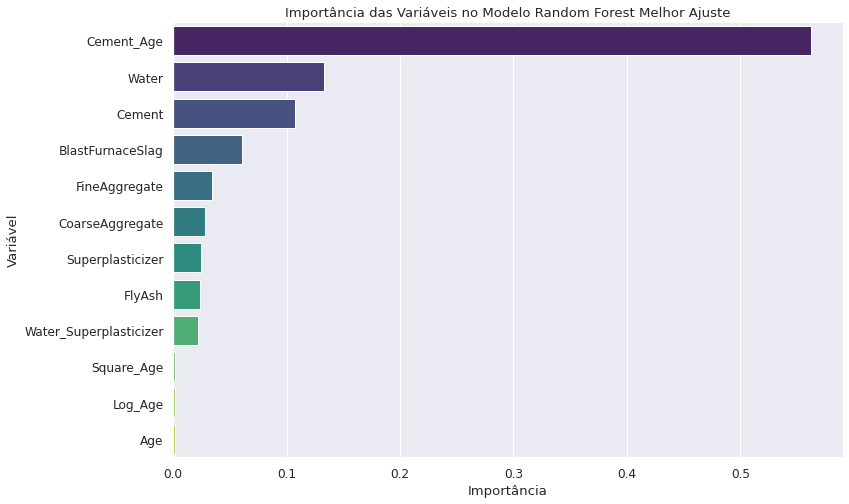




Previsões

[44.43570548 36.47615716 39.99420648 15.62330783 39.54859682 24.04857814
 40.90090288 39.56214043 64.16552349 27.62594046]


Plot das previsões vs valores reais


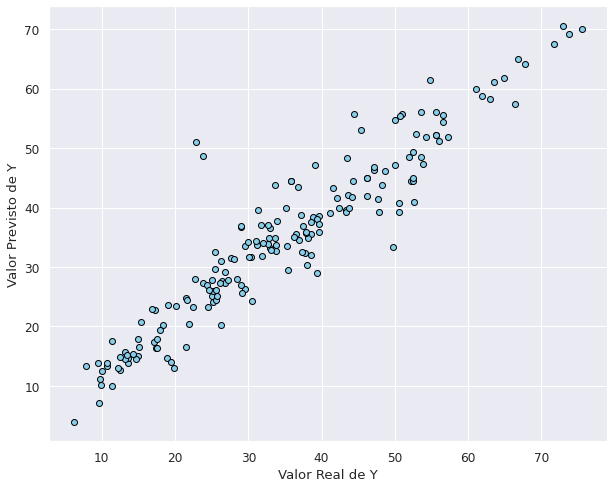




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 3.700733483086346
MSE - Erro Quadrático Médio: 27.132218702600582
RMSE - Raiz Quadrada do Erro Quadrático Médio: 5.208859635524899
O valor é 5.21 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.8890427696306654
Variância Explicada: 0.8890431433524075



ANÁLISE DE RESÍDUOS



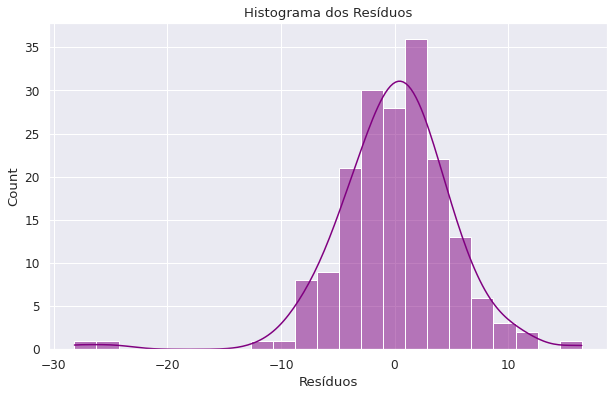

In [158]:
# Criação do modelo Random Forest com os melhores parâmetros
modelo_RF_v2 = RandomForestRegressor(
    n_estimators=melhores_parametros_rf['n_estimators'],
    max_depth=melhores_parametros_rf['max_depth'],
    min_samples_split=melhores_parametros_rf['min_samples_split'],
    min_samples_leaf=melhores_parametros_rf['min_samples_leaf'],
    max_features=melhores_parametros_rf['max_features'],
    random_state=42
)

# Treinamento do modelo
modelo_RF_v2.fit(X_treino, y_treino)

## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_rf_v2 = pd.DataFrame(modelo_RF_v2.feature_importances_, X.columns, columns=['Importância'])
df_importance_rf_v2 = df_importance_rf_v2.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_rf_v2.reset_index(inplace=True)
df_importance_rf_v2.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_rf_v2 = df_importance_rf_v2.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_rf_v2, palette='viridis')
plt.title('Importância das Variáveis no Modelo Random Forest Melhor Ajuste')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')

## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_rf_v2 = modelo_RF_v2.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_rf_v2[:10])

# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_rf_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')

## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_rf_v2 = mean_absolute_error(y_teste, pred_rf_v2)
print('MAE - Erro Médio Absoluto:', mae_rf_v2)

# MSE - Erro Quadrático Médio
mse_rf_v2 = mean_squared_error(y_teste, pred_rf_v2)
print('MSE - Erro Quadrático Médio:', mse_rf_v2)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_rf_v2 = np.sqrt(mse_rf_v2)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_rf_v2)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_rf_v2 = dados['ConcreteCompressiveStrength'].mean()
std_value_rf_v2 = dados['ConcreteCompressiveStrength'].std()
half_std_value_rf_v2 = std_value_rf_v2 / 2
rmse_as_percentage_of_mean_rf_v2 = (rmse_rf_v2 / mean_value_rf_v2) * 100
rmse_as_percentage_of_std_rf_v2 = (rmse_rf_v2 / std_value_rf_v2) * 100

if rmse_rf_v2 < half_std_value_rf_v2:
    print(f'O valor é {rmse_rf_v2:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_rf_v2:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_rf_v2:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_rf_v2:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_rf_v2 = r2_score(y_teste, pred_rf_v2)
print('Coeficiente R2:', r2_rf_v2)

# Variância Explicada
evs_rf_v2 = explained_variance_score(y_teste, pred_rf_v2)
print('Variância Explicada:', evs_rf_v2)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')
# Plot dos resíduos
residuos_rf_v2 = y_teste - pred_rf_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_rf_v2, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [159]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_rf_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo RF Melhor Ajuste'],
    'Nome do Algoritmo': ['Random Forest'],
    'MAE': [f"{mae_rf_v2:.2f}"],
    'MSE': [f"{mse_rf_v2:.2f}"],
    'RMSE': [rmse_rf_v2],
    'Coeficiente R2': [r2_rf_v2],
    'Variância Explicada': [evs_rf_v2]
})

df_modelos = pd.concat([df_modelos, modelo_rf_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE  \
0              Modelo RL V1               Regressão Linear  5.36  46.39   
1              Modelo RL V2               Regressão Linear  7.13  77.16   
2              Modelo RL V3               Regressão Linear  7.14  77.25   
3            Modelo 2 RR V1                Regressão Ridge  5.35  46.29   
4              Modelo RR V2                Regressão Ridge  7.13  77.16   
5              Modelo RL V1                Regressão Lasso  5.92  54.25   
6              Modelo RL V2                Regressão Lasso  7.14  78.75   
7                 Modelo EN                     ElasticNet  7.04  74.86   
8                 Modelo DT                  Decision Tree  4.72  52.69   
9              Modelo RF V1                  Random Forest  3.67  26.82   
10             Modelo RF V2                  Random Forest  5.38  48.95   
11               Modelo SVR       Support Vector Regressor  6.22  60.49   
12               Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47   
13             Modelo GB V1    Gradient Boosting Regressor  3.81  25.91   
14             Modelo GB V2    Gradient Boosting Regressor  4.27  31.36   
15            Modelo XGB V1              XGBoost Regressor  3.04  20.57   
16            Modelo XGB V2              XGBoost Regressor  3.03  21.69   
17  Modelo RF Melhor Ajuste                  Random Forest  3.70  27.13   

        RMSE  Coeficiente R2  Variância Explicada  
0   6.811291        0.810273             0.810635  
1   8.784154        0.684449             0.684797  
2   8.789305        0.684078             0.684411  
3   6.804000        0.810679             0.811027  
4   8.784314        0.684437             0.684782  
5   7.365601        0.778136             0.778218  
6   8.873966        0.677963             0.678422  
7   8.652009        0.693871             0.693875  
8   7.258983        0.784513             0.786066  
9   5.178394        0.890337             0.890337  
10  6.996536        0.799813             0.799875  
11  7.777607        0.752621             0.755494  
12  6.439875        0.830400             0.830428  
13  5.090418        0.894031             0.894102  
14  5.600355        0.871737             0.872036  
15  4.535088        0.915891             0.916230  
16  4.657052        0.911306             0.911429  
17  5.208860        0.889043             0.889043

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo MELHOR AJUSTE 2 com Gradient Boosting Regressor</span>

<br>

> # Versão 1

- Busca e Ajuste de Hiperparâmetros.

<br>

### Código com Busca de Hiperparâmetros

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Definindo a grade de parâmetros
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instanciando o modelo Gradient Boosting
modelo_GB = GradientBoostingRegressor(random_state=42)

# Implementando o GridSearchCV
grid_search_gb = GridSearchCV(estimator=modelo_GB, param_grid=param_grid_gb,
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Executando a busca
grid_search_gb.fit(X_treino, y_treino)

# Obtendo os melhores parâmetros
melhores_parametros_gb = grid_search_gb.best_params_
print("Melhores parâmetros para Gradient Boosting:", melhores_parametros_gb)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimato

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=lo

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqr

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2

[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_


[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning

[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_r

[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning

[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, ma

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1,

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0

Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

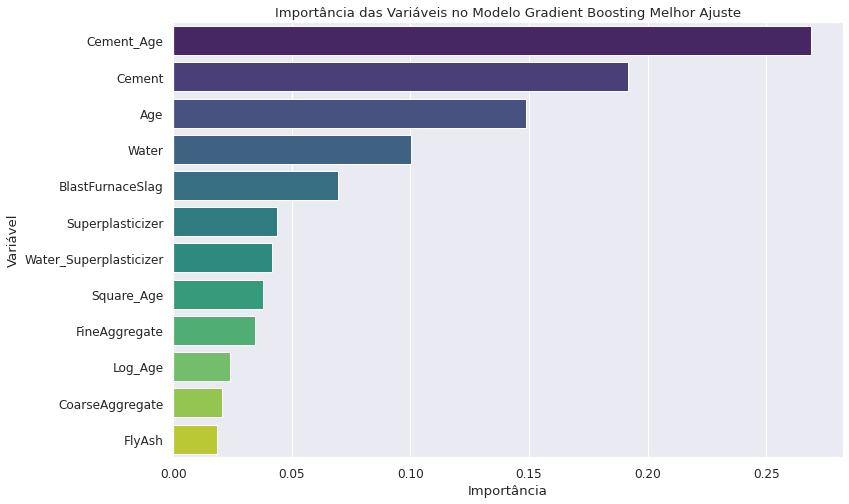




Previsões

[45.33320217 35.58350079 39.89499453 14.04861812 38.7322711  24.03377573
 52.38406752 41.66228618 64.8040272  30.50364841]


Plot das previsões vs valores reais


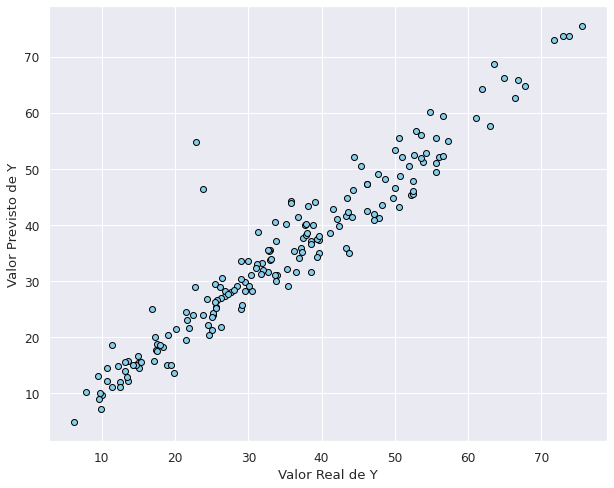




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 2.901717402820511
MSE - Erro Quadrático Médio: 19.70491377049555
RMSE - Raiz Quadrada do Erro Quadrático Médio: 4.4390217132264125
O valor é 4.44 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.9194167391688028
Variância Explicada: 0.9194398600920293



ANÁLISE DE RESÍDUOS



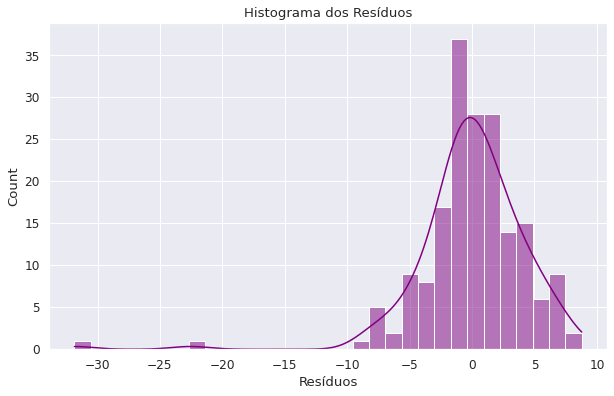

In [161]:
# Criação do modelo Gradient Boosting com os melhores parâmetros
modelo_GB_v2 = GradientBoostingRegressor(
    n_estimators=melhores_parametros_gb['n_estimators'],
    learning_rate=melhores_parametros_gb['learning_rate'],
    max_depth=melhores_parametros_gb['max_depth'],
    min_samples_split=melhores_parametros_gb['min_samples_split'],
    min_samples_leaf=melhores_parametros_gb['min_samples_leaf'],
    max_features=melhores_parametros_gb['max_features'],
    random_state=42
)

# Treinamento do modelo
modelo_GB_v2.fit(X_treino, y_treino)

## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_gb_v2 = pd.DataFrame(modelo_GB_v2.feature_importances_, X.columns, columns=['Importância'])
df_importance_gb_v2 = df_importance_gb_v2.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_gb_v2.reset_index(inplace=True)
df_importance_gb_v2.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_gb_v2 = df_importance_gb_v2.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_gb_v2, palette='viridis')
plt.title('Importância das Variáveis no Modelo Gradient Boosting Melhor Ajuste')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')

## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_gb_v2 = modelo_GB_v2.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_gb_v2[:10])

# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_gb_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')

## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_gb_v2 = mean_absolute_error(y_teste, pred_gb_v2)
print('MAE - Erro Médio Absoluto:', mae_gb_v2)

# MSE - Erro Quadrático Médio
mse_gb_v2 = mean_squared_error(y_teste, pred_gb_v2)
print('MSE - Erro Quadrático Médio:', mse_gb_v2)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_gb_v2 = np.sqrt(mse_gb_v2)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_gb_v2)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_gb_v2 = dados['ConcreteCompressiveStrength'].mean()
std_value_gb_v2 = dados['ConcreteCompressiveStrength'].std()
half_std_value_gb_v2 = std_value_gb_v2 / 2
rmse_as_percentage_of_mean_gb_v2 = (rmse_gb_v2 / mean_value_gb_v2) * 100
rmse_as_percentage_of_std_gb_v2 = (rmse_gb_v2 / std_value_gb_v2) * 100

if rmse_gb_v2 < half_std_value_gb_v2:
    print(f'O valor é {rmse_gb_v2:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_gb_v2:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_gb_v2:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_gb_v2:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_gb_v2 = r2_score(y_teste, pred_gb_v2)
print('Coeficiente R2:', r2_gb_v2)

# Variância Explicada
evs_gb_v2 = explained_variance_score(y_teste, pred_gb_v2)
print('Variância Explicada:', evs_gb_v2)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')
# Plot dos resíduos
residuos_gb_v2 = y_teste - pred_gb_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_gb_v2, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [162]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_gb_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo GB Melhor Ajuste'],
    'Nome do Algoritmo': ['Gradient Boosting Regressor'],
    'MAE': [f"{mae_gb_v2:.2f}"],
    'MSE': [f"{mse_gb_v2:.2f}"],
    'RMSE': [rmse_gb_v2],
    'Coeficiente R2': [r2_gb_v2],
    'Variância Explicada': [evs_gb_v2]
})

df_modelos = pd.concat([df_modelos, modelo_gb_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE  \
0              Modelo RL V1               Regressão Linear  5.36  46.39   
1              Modelo RL V2               Regressão Linear  7.13  77.16   
2              Modelo RL V3               Regressão Linear  7.14  77.25   
3            Modelo 2 RR V1                Regressão Ridge  5.35  46.29   
4              Modelo RR V2                Regressão Ridge  7.13  77.16   
5              Modelo RL V1                Regressão Lasso  5.92  54.25   
6              Modelo RL V2                Regressão Lasso  7.14  78.75   
7                 Modelo EN                     ElasticNet  7.04  74.86   
8                 Modelo DT                  Decision Tree  4.72  52.69   
9              Modelo RF V1                  Random Forest  3.67  26.82   
10             Modelo RF V2                  Random Forest  5.38  48.95   
11               Modelo SVR       Support Vector Regressor  6.22  60.49   
12               Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47   
13             Modelo GB V1    Gradient Boosting Regressor  3.81  25.91   
14             Modelo GB V2    Gradient Boosting Regressor  4.27  31.36   
15            Modelo XGB V1              XGBoost Regressor  3.04  20.57   
16            Modelo XGB V2              XGBoost Regressor  3.03  21.69   
17  Modelo RF Melhor Ajuste                  Random Forest  3.70  27.13   
18  Modelo GB Melhor Ajuste    Gradient Boosting Regressor  2.90  19.70   

        RMSE  Coeficiente R2  Variância Explicada  
0   6.811291        0.810273             0.810635  
1   8.784154        0.684449             0.684797  
2   8.789305        0.684078             0.684411  
3   6.804000        0.810679             0.811027  
4   8.784314        0.684437             0.684782  
5   7.365601        0.778136             0.778218  
6   8.873966        0.677963             0.678422  
7   8.652009        0.693871             0.693875  
8   7.258983        0.784513             0.786066  
9   5.178394        0.890337             0.890337  
10  6.996536        0.799813             0.799875  
11  7.777607        0.752621             0.755494  
12  6.439875        0.830400             0.830428  
13  5.090418        0.894031             0.894102  
14  5.600355        0.871737             0.872036  
15  4.535088        0.915891             0.916230  
16  4.657052        0.911306             0.911429  
17  5.208860        0.889043             0.889043  
18  4.439022        0.919417             0.919440

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo MELHOR AJUSTE 3 com XGBoost Regressor</span>

<br>

> # Versão 1

- Busca e Ajuste de Hiperparâmetros.

<br>

### Código com Busca de Hiperparâmetros

In [163]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definindo a grade de parâmetros
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7, 1]
}

# Instanciando o modelo XGBoost
modelo_XGB = XGBRegressor(random_state=42)

# Implementando o GridSearchCV
grid_search_xgb = GridSearchCV(estimator=modelo_XGB, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Executando a busca
grid_search_xgb.fit(X_treino, y_treino)

# Obtendo os melhores parâmetros
melhores_parametros_xgb = grid_search_xgb.best_params_
print("Melhores parâmetros para XGBoost:", melhores_parametros_xgb)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_e

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, ma

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.2,

[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.

[CV] END learning_rate=0.2, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate

[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=300; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, mi

[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.01, max_depth=3, min_

[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_chi

[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_chi

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_e

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, mi

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_c

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=10

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=3, min_ch

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300; total time=   2.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min

Melhores parâmetros para XGBoost: {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

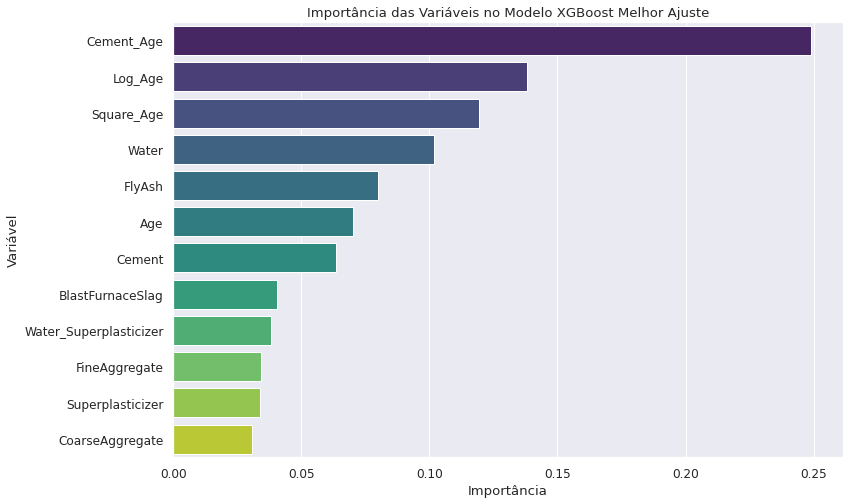




Previsões

[45.266983 35.97551  42.274864 13.961426 38.512325 25.704891 51.103916
 41.972958 63.72859  28.769567]


Plot das previsões vs valores reais


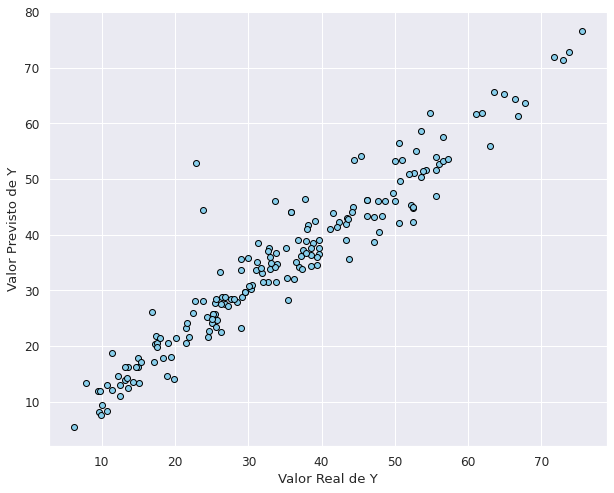




AVALIAÇÃO DO MODELO

MAE - Erro Médio Absoluto: 3.084778623343488
MSE - Erro Quadrático Médio: 21.478034288925237
RMSE - Raiz Quadrada do Erro Quadrático Médio: 4.6344400189154715
O valor é 4.63 e está MENOR que a metade do desvio padrão dos valores da variável alvo (8.19). Isso é BOM sinal.
Coeficiente R2: 0.9121655613719374
Variância Explicada: 0.9127466909743359



ANÁLISE DE RESÍDUOS



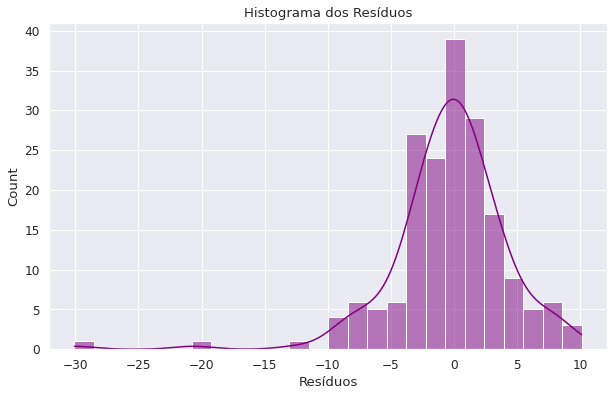

In [164]:
# Criação do modelo XGBoost com os melhores parâmetros
modelo_XGB_v2 = XGBRegressor(
    n_estimators=melhores_parametros_xgb['n_estimators'],
    learning_rate=melhores_parametros_xgb['learning_rate'],
    max_depth=melhores_parametros_xgb['max_depth'],
    min_child_weight=melhores_parametros_xgb['min_child_weight'],
    gamma=melhores_parametros_xgb['gamma'],
    colsample_bytree=melhores_parametros_xgb['colsample_bytree'],
    random_state=42
)

# Treinamento do modelo
modelo_XGB_v2.fit(X_treino, y_treino)

## Visualizando a importância das variáveis preditoras

# Importância das variáveis preditoras
df_importance_xgb_v2 = pd.DataFrame(modelo_XGB_v2.feature_importances_, X.columns, columns=['Importância'])
df_importance_xgb_v2 = df_importance_xgb_v2.sort_values(by='Importância', ascending=False)

# Visualização Gráfica da importância das variáveis preditoras
df_importance_xgb_v2.reset_index(inplace=True)
df_importance_xgb_v2.rename(columns={'index': 'Variável'}, inplace=True)
df_importance_xgb_v2 = df_importance_xgb_v2.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance_xgb_v2, palette='viridis')
plt.title('Importância das Variáveis no Modelo XGBoost Melhor Ajuste')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

print('\n==========================================================================\n')

## Previsões

print('\nPrevisões\n')

# Previsões com dados de teste
pred_xgb_v2 = modelo_XGB_v2.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_xgb_v2[:10])

# Plot das previsões vs valores reais
print('\n\nPlot das previsões vs valores reais')
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_xgb_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

print('\n==========================================================================\n')

## Avaliação do Modelo

# Métricas de Avaliação
print('\nAVALIAÇÃO DO MODELO\n')

# MAE - Erro Médio Absoluto
mae_xgb_v2 = mean_absolute_error(y_teste, pred_xgb_v2)
print('MAE - Erro Médio Absoluto:', mae_xgb_v2)

# MSE - Erro Quadrático Médio
mse_xgb_v2 = mean_squared_error(y_teste, pred_xgb_v2)
print('MSE - Erro Quadrático Médio:', mse_xgb_v2)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse_xgb_v2 = np.sqrt(mse_xgb_v2)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse_xgb_v2)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value_xgb_v2 = dados['ConcreteCompressiveStrength'].mean()
std_value_xgb_v2 = dados['ConcreteCompressiveStrength'].std()
half_std_value_xgb_v2 = std_value_xgb_v2 / 2
rmse_as_percentage_of_mean_xgb_v2 = (rmse_xgb_v2 / mean_value_xgb_v2) * 100
rmse_as_percentage_of_std_xgb_v2 = (rmse_xgb_v2 / std_value_xgb_v2) * 100

if rmse_xgb_v2 < half_std_value_xgb_v2:
    print(f'O valor é {rmse_xgb_v2:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_xgb_v2:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse_xgb_v2:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value_xgb_v2:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2_xgb_v2 = r2_score(y_teste, pred_xgb_v2)
print('Coeficiente R2:', r2_xgb_v2)

# Variância Explicada
evs_xgb_v2 = explained_variance_score(y_teste, pred_xgb_v2)
print('Variância Explicada:', evs_xgb_v2)

print('\n==========================================================================\n')
print('\nANÁLISE DE RESÍDUOS\n')
# Plot dos resíduos
residuos_xgb_v2 = y_teste - pred_xgb_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_xgb_v2, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [165]:
# Salvando as Métricas

# Salvando as métricas no dataframe com formatação
modelo_xgb_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo XGB Melhor Ajuste'],
    'Nome do Algoritmo': ['XGBoost Regressor'],
    'MAE': [f"{mae_xgb_v2:.2f}"],
    'MSE': [f"{mse_xgb_v2:.2f}"],
    'RMSE': [rmse_xgb_v2],
    'Coeficiente R2': [r2_xgb_v2],
    'Variância Explicada': [evs_xgb_v2]
})

df_modelos = pd.concat([df_modelos, modelo_xgb_v2], ignore_index=True)

# Visualizando Dataframe
display(df_modelos)

Nome do Modelo              Nome do Algoritmo   MAE    MSE  \
0               Modelo RL V1               Regressão Linear  5.36  46.39   
1               Modelo RL V2               Regressão Linear  7.13  77.16   
2               Modelo RL V3               Regressão Linear  7.14  77.25   
3             Modelo 2 RR V1                Regressão Ridge  5.35  46.29   
4               Modelo RR V2                Regressão Ridge  7.13  77.16   
5               Modelo RL V1                Regressão Lasso  5.92  54.25   
6               Modelo RL V2                Regressão Lasso  7.14  78.75   
7                  Modelo EN                     ElasticNet  7.04  74.86   
8                  Modelo DT                  Decision Tree  4.72  52.69   
9               Modelo RF V1                  Random Forest  3.67  26.82   
10              Modelo RF V2                  Random Forest  5.38  48.95   
11                Modelo SVR       Support Vector Regressor  6.22  60.49   
12                Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47   
13              Modelo GB V1    Gradient Boosting Regressor  3.81  25.91   
14              Modelo GB V2    Gradient Boosting Regressor  4.27  31.36   
15             Modelo XGB V1              XGBoost Regressor  3.04  20.57   
16             Modelo XGB V2              XGBoost Regressor  3.03  21.69   
17   Modelo RF Melhor Ajuste                  Random Forest  3.70  27.13   
18   Modelo GB Melhor Ajuste    Gradient Boosting Regressor  2.90  19.70   
19  Modelo XGB Melhor Ajuste              XGBoost Regressor  3.08  21.48   

        RMSE  Coeficiente R2  Variância Explicada  
0   6.811291        0.810273             0.810635  
1   8.784154        0.684449             0.684797  
2   8.789305        0.684078             0.684411  
3   6.804000        0.810679             0.811027  
4   8.784314        0.684437             0.684782  
5   7.365601        0.778136             0.778218  
6   8.873966        0.677963             0.678422  
7   8.652009        0.693871             0.693875  
8   7.258983        0.784513             0.786066  
9   5.178394        0.890337             0.890337  
10  6.996536        0.799813             0.799875  
11  7.777607        0.752621             0.755494  
12  6.439875        0.830400             0.830428  
13  5.090418        0.894031             0.894102  
14  5.600355        0.871737             0.872036  
15  4.535088        0.915891             0.916230  
16  4.657052        0.911306             0.911429  
17  5.208860        0.889043             0.889043  
18  4.439022        0.919417             0.919440  
19  4.634440        0.912166             0.912747

<br><br><br>

# Seleção do Melhor Modelo

- Usando o RMSE como métrica de avaliação.

In [166]:
# Visualizando os 5 melhores modelos (critério: menor valor de RMSE)
melhores_modelos2 = df_modelos.nsmallest(5, 'RMSE')

# Exibe os 5 melhores modelos
display(melhores_modelos2)

Nome do Modelo            Nome do Algoritmo   MAE    MSE  \
18   Modelo GB Melhor Ajuste  Gradient Boosting Regressor  2.90  19.70   
15             Modelo XGB V1            XGBoost Regressor  3.04  20.57   
19  Modelo XGB Melhor Ajuste            XGBoost Regressor  3.08  21.48   
16             Modelo XGB V2            XGBoost Regressor  3.03  21.69   
13              Modelo GB V1  Gradient Boosting Regressor  3.81  25.91   

        RMSE  Coeficiente R2  Variância Explicada  
18  4.439022        0.919417             0.919440  
15  4.535088        0.915891             0.916230  
19  4.634440        0.912166             0.912747  
16  4.657052        0.911306             0.911429  
13  5.090418        0.894031             0.894102

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=300; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=3, n_

[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100; total time=   0.6s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300; total time=   1.9s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, 

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estima

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200; total time=   1.9s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300; total time=   1.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight

<br><br><br>

# <span style="color: green; font-size: 40px; font-weight: bold;"> CONCLUSÃO DO PROJETO </span>

<br><br>

# Escolha do Melhor Modelo

In [167]:
# Exibe os 5 melhores modelos
display(melhores_modelos2)

Nome do Modelo            Nome do Algoritmo   MAE    MSE  \
18   Modelo GB Melhor Ajuste  Gradient Boosting Regressor  2.90  19.70   
15             Modelo XGB V1            XGBoost Regressor  3.04  20.57   
19  Modelo XGB Melhor Ajuste            XGBoost Regressor  3.08  21.48   
16             Modelo XGB V2            XGBoost Regressor  3.03  21.69   
13              Modelo GB V1  Gradient Boosting Regressor  3.81  25.91   

        RMSE  Coeficiente R2  Variância Explicada  
18  4.439022        0.919417             0.919440  
15  4.535088        0.915891             0.916230  
19  4.634440        0.912166             0.912747  
16  4.657052        0.911306             0.911429  
13  5.090418        0.894031             0.894102

- Para determinar o melhor modelo para prever a resistência à compressão do concreto, utilizamos o **RMSE (Root Mean Squared Error)** como a principal métrica de avaliação. O modelo com o menor valor de RMSE indica que tem uma melhor capacidade de previsão, pois este valor mede a média das diferenças entre os valores previstos e os valores reais.

- Após a análise, identificamos que o **"Modelo GB Melhor Ajuste" (Gradient Boosting Regressor)** apresentou o menor RMSE (4.439022), seguido pelo "Modelo XGB V1" (XGBoost Regressor) com RMSE de 4.535088.

<br>

> Portanto, o **"Modelo GB Melhor Ajuste"** foi selecionado como o **melhor modelo para prever a resistência à compressão do concreto**, devido ao seu desempenho superior nas métricas de avaliação.

<br>

### Métricas de Desempenho do Melhor Modelo

In [168]:
# Visualizando as métricas de desempenho do melhor modelo (Gradient Boosting Melhor Ajuste)
melhor_modelo = 'Modelo GB Melhor Ajuste'
df_melhor_modelo = df_modelos[df_modelos['Nome do Modelo'] == melhor_modelo]
print("Métricas de Desempenho do Melhor Modelo (Gradient Boosting Melhor Ajuste):")
display(df_melhor_modelo)

# Exibindo o DataFrame com todas as métricas
print("Todas as Métricas de Desempenho dos Modelos Testados:")
display(df_modelos)

Métricas de Desempenho do Melhor Modelo (Gradient Boosting Melhor Ajuste):


Nome do Modelo            Nome do Algoritmo   MAE    MSE  \
18  Modelo GB Melhor Ajuste  Gradient Boosting Regressor  2.90  19.70   

        RMSE  Coeficiente R2  Variância Explicada  
18  4.439022        0.919417              0.91944

Todas as Métricas de Desempenho dos Modelos Testados:


Nome do Modelo              Nome do Algoritmo   MAE    MSE  \
0               Modelo RL V1               Regressão Linear  5.36  46.39   
1               Modelo RL V2               Regressão Linear  7.13  77.16   
2               Modelo RL V3               Regressão Linear  7.14  77.25   
3             Modelo 2 RR V1                Regressão Ridge  5.35  46.29   
4               Modelo RR V2                Regressão Ridge  7.13  77.16   
5               Modelo RL V1                Regressão Lasso  5.92  54.25   
6               Modelo RL V2                Regressão Lasso  7.14  78.75   
7                  Modelo EN                     ElasticNet  7.04  74.86   
8                  Modelo DT                  Decision Tree  4.72  52.69   
9               Modelo RF V1                  Random Forest  3.67  26.82   
10              Modelo RF V2                  Random Forest  5.38  48.95   
11                Modelo SVR       Support Vector Regressor  6.22  60.49   
12                Modelo KNN  K-Nearest Neighbors Regressor  4.94  41.47   
13              Modelo GB V1    Gradient Boosting Regressor  3.81  25.91   
14              Modelo GB V2    Gradient Boosting Regressor  4.27  31.36   
15             Modelo XGB V1              XGBoost Regressor  3.04  20.57   
16             Modelo XGB V2              XGBoost Regressor  3.03  21.69   
17   Modelo RF Melhor Ajuste                  Random Forest  3.70  27.13   
18   Modelo GB Melhor Ajuste    Gradient Boosting Regressor  2.90  19.70   
19  Modelo XGB Melhor Ajuste              XGBoost Regressor  3.08  21.48   

        RMSE  Coeficiente R2  Variância Explicada  
0   6.811291        0.810273             0.810635  
1   8.784154        0.684449             0.684797  
2   8.789305        0.684078             0.684411  
3   6.804000        0.810679             0.811027  
4   8.784314        0.684437             0.684782  
5   7.365601        0.778136             0.778218  
6   8.873966        0.677963             0.678422  
7   8.652009        0.693871             0.693875  
8   7.258983        0.784513             0.786066  
9   5.178394        0.890337             0.890337  
10  6.996536        0.799813             0.799875  
11  7.777607        0.752621             0.755494  
12  6.439875        0.830400             0.830428  
13  5.090418        0.894031             0.894102  
14  5.600355        0.871737             0.872036  
15  4.535088        0.915891             0.916230  
16  4.657052        0.911306             0.911429  
17  5.208860        0.889043             0.889043  
18  4.439022        0.919417             0.919440  
19  4.634440        0.912166             0.912747

<br><br>

## Testando com Novos Dados

In [179]:
# Ajustando novamente o scaler com todas as variáveis
scaler = StandardScaler()

# Ajustando e transformando os dados de treino
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# Converte os arrays de volta para DataFrame
X_treino_scaled = pd.DataFrame(X_treino_scaled, columns=X_treino.columns, index=X_treino.index)
X_teste_scaled = pd.DataFrame(X_teste_scaled, columns=X_teste.columns, index=X_teste.index)

X_treino = X_treino_scaled
X_teste = X_teste_scaled

# Criando 3 novos dados para testar o modelo
novos_dados = pd.DataFrame({
    'Cement': [300, 400, 350],
    'BlastFurnaceSlag': [50, 80, 60],
    'FlyAsh': [25, 30, 20],
    'Water': [200, 180, 190],
    'Superplasticizer': [5, 10, 7],
    'CoarseAggregate': [950, 1050, 1000],
    'FineAggregate': [750, 800, 770],
    'Age': [28, 56, 90],
    'Cement_Age': [300*28, 400*56, 350*90],
    'Water_Superplasticizer': [200*5, 180*10, 190*7],
    'Log_Age': [np.log1p(28), np.log1p(56), np.log1p(90)],
    'Square_Age': [28**2, 56**2, 90**2]
})

# Ajusta o scaler com os novos dados
novos_dados_scaled = scaler.transform(novos_dados)

# Convertendo o array de volta para DataFrame
novos_dados_scaled = pd.DataFrame(novos_dados_scaled, columns=novos_dados.columns)

# Realizando previsões com o melhor modelo (Gradient Boosting Melhor Ajuste)
previsoes_novos_dados = modelo_GB_v2.predict(novos_dados_scaled)

# Exibindo as previsões de forma didática e intuitiva
for i, pred in enumerate(previsoes_novos_dados):
    print(f"\n\nPrevisão {i+1}:")
    print(f"Dados de Entrada: {novos_dados.iloc[i].to_dict()}")
    print(f"\nResistência à Compressão Prevista: {pred:.2f} MPa\n")
    print("-" * 100)



Previsão 1:
Dados de Entrada: {'Cement': 300.0, 'BlastFurnaceSlag': 50.0, 'FlyAsh': 25.0, 'Water': 200.0, 'Superplasticizer': 5.0, 'CoarseAggregate': 950.0, 'FineAggregate': 750.0, 'Age': 28.0, 'Cement_Age': 8400.0, 'Water_Superplasticizer': 1000.0, 'Log_Age': 3.367295829986474, 'Square_Age': 784.0}

Resistência à Compressão Prevista: 79.64 MPa

----------------------------------------------------------------------------------------------------


Previsão 2:
Dados de Entrada: {'Cement': 400.0, 'BlastFurnaceSlag': 80.0, 'FlyAsh': 30.0, 'Water': 180.0, 'Superplasticizer': 10.0, 'CoarseAggregate': 1050.0, 'FineAggregate': 800.0, 'Age': 56.0, 'Cement_Age': 22400.0, 'Water_Superplasticizer': 1800.0, 'Log_Age': 4.04305126783455, 'Square_Age': 3136.0}

Resistência à Compressão Prevista: 79.64 MPa

----------------------------------------------------------------------------------------------------


Previsão 3:
Dados de Entrada: {'Cement': 350.0, 'BlastFurnaceSlag': 60.0, 'FlyAsh': 20.0, 'Wa

#### Conclusão:
> Os valores previstos fazem sentido e são consistentes com os dados originais. A previsão pode apresentar valores semelhantes para diferentes combinações de entradas, dependendo das características do modelo de Gradient Boosting e sua capacidade de generalizar a partir dos dados de treinamento.

<br><br>

# RESPONDENDO AS PERGUNTAS DE NEGÓCIO

## Problema de Negócio

### Como podemos prever a resistência à compressão do concreto com base nos componentes da mistura e na idade do concreto? Qual combinação de componentes resulta na resistência máxima?

> Utilizando o modelo de Gradient Boosting Regressor, podemos prever a resistência à compressão do concreto com base nas variáveis preditoras como quantidade de cimento, escória de alto-forno, cinza volante, água, superplastificante, agregados graúdos e finos, e a idade do concreto. A combinação de componentes que resulta na resistência máxima depende de uma interação complexa entre esses componentes. No entanto, de acordo com nossas previsões, misturas com altas quantidades de cimento e uma boa proporção de superplastificante e agregados, combinadas com um tempo de cura adequado, tendem a resultar em maiores resistências.

<br>

## Perguntas de Negócio Adicionais

### 1) Como o tempo de cura (idade do concreto) afeta a resistência à compressão?

> A análise mostra que a resistência à compressão do concreto aumenta com o tempo de cura. Observamos que a idade do concreto (Age) tem uma correlação positiva significativa com a resistência à compressão. Modelos que incluíram variáveis transformadas como Log_Age e Square_Age, que capturam relações não-lineares, também destacaram a importância do tempo de cura. Com o tempo, o concreto continua a ganhar resistência, especialmente nos primeiros 90 dias, conforme refletido nas previsões.

<br>

### 2) Quais são as interações entre os diferentes componentes da mistura que mais influenciam a resistência à compressão?

> As interações entre os componentes da mistura, como Cement_Age (interação entre cimento e idade) e Water_Superplasticizer (interação entre água e superplastificante), são cruciais para determinar a resistência à compressão do concreto. A quantidade de cimento combinada com o tempo de cura (Cement_Age) mostra uma forte influência na resistência final do concreto. Além disso, a proporção de água e superplastificante (Water_Superplasticizer) também é significativa, sugerindo que a mistura correta desses componentes pode melhorar significativamente a resistência do concreto.

<br><br>

# FIM